# Extensive Algorithm comparison for SNR = X
This notebook contains the algorithm comparison for the measurements done with the following parameters (specifically):

# SNR = X
noise amp grc = 10m gaussian
# N_FRAMES =  comparison is based on different aspects, such as:
* Dataset lenght
* complexity: different for each algorithm, made by playing around with the parameters that it has available
* Pre- and post- feature scaling

Please refer to the other notebooks to see the results of the comparison for different measurement parameters.


In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import setup_dataset

In [4]:
data, labels = setup_dataset.setup_iterables("noise_0_03_nframes_50")

In [5]:
X_train, X_test, y_train, y_test = setup_dataset.slice_data(data, labels)

In [6]:
# Setting up various complexities for the different algorithms.
# Number of neighbors
knn_c = (2, 4, 10, 50)
# Maximum depth in a decision tree
dtc_c = (2, 5, 10, 50)
# complexities for the rbf kernel
svc_c = (1, 1000, 1000000)
# Number of estimators in the random forest classifier
rfc_c = (1, 10, 100, 1000, 10000, 100000)
# Number of parallel jobs (CPU)
rfc_jobs = (3, -2)
gpc_jobs = (3, -2)
# Number of iteration in the Gaussian Process Classifier
gpc_c = (20, 50, 100)

In [7]:
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
X_train_scaled, X_test_scaled = setup_dataset.scale_sliced_data(X_train, X_test, StandardScaler())

In [8]:
knn_accs, knn_pred, knn_pred_times, knn_fit_times = \
setup_dataset.run_knn(X_train, X_test, y_train, y_test, knn_c)

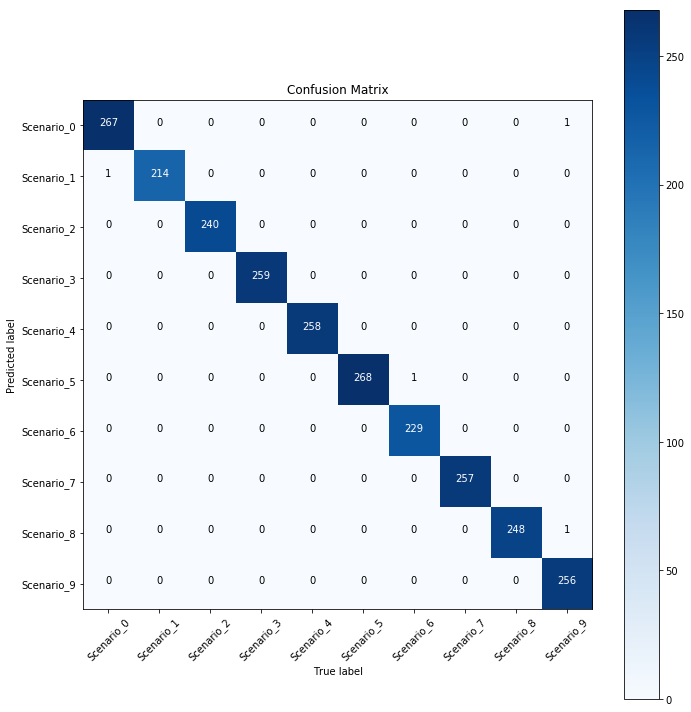

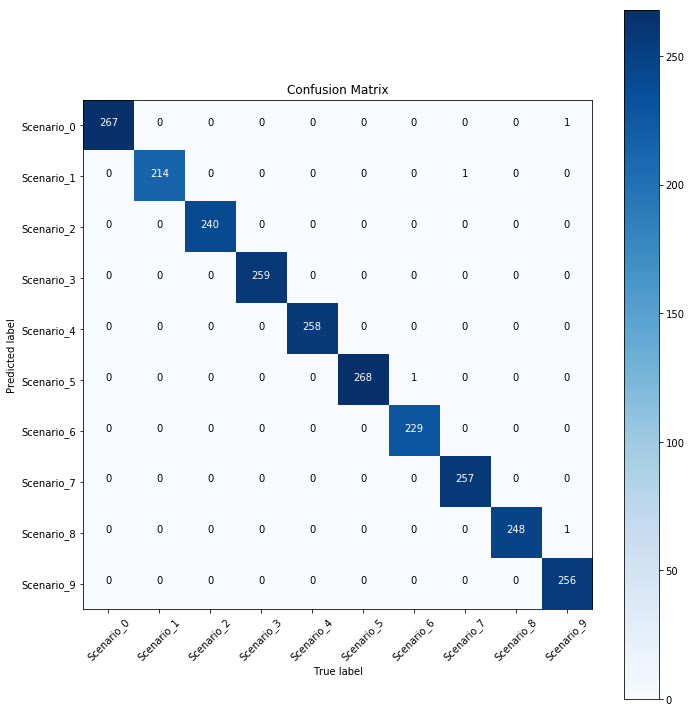

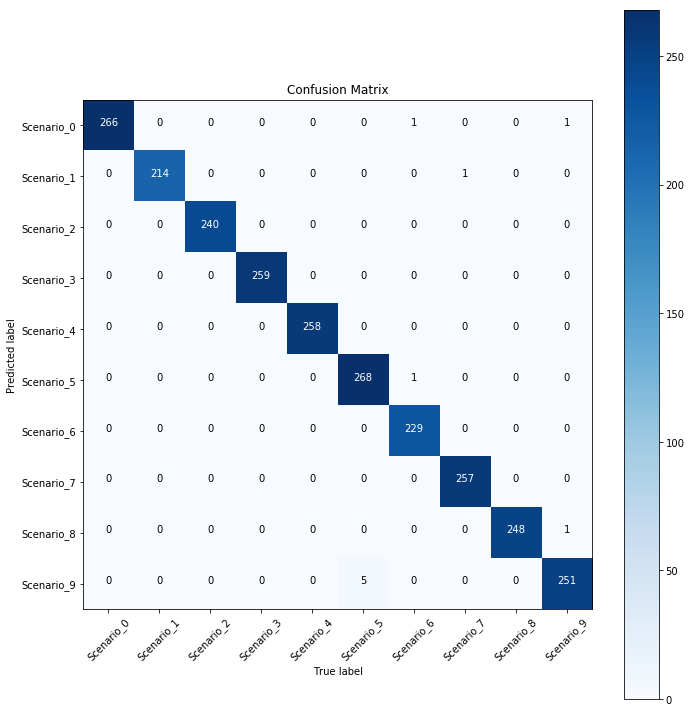

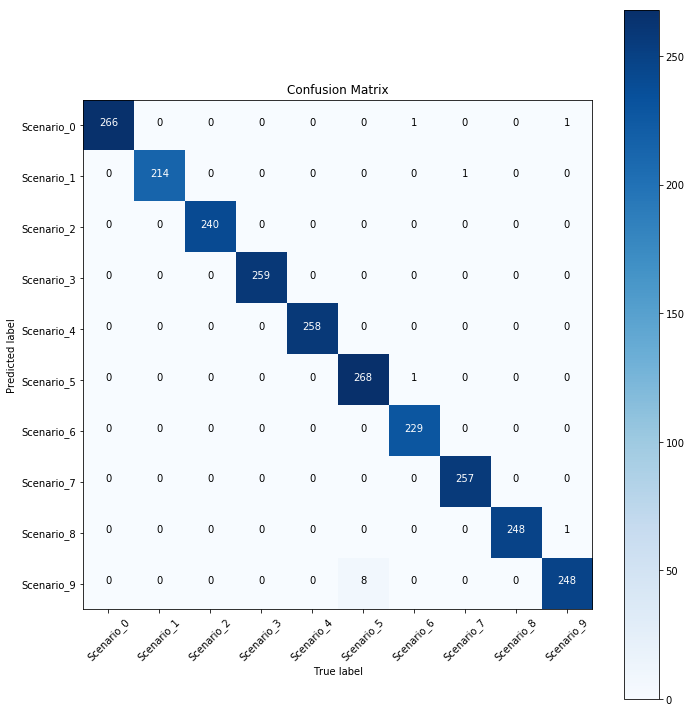

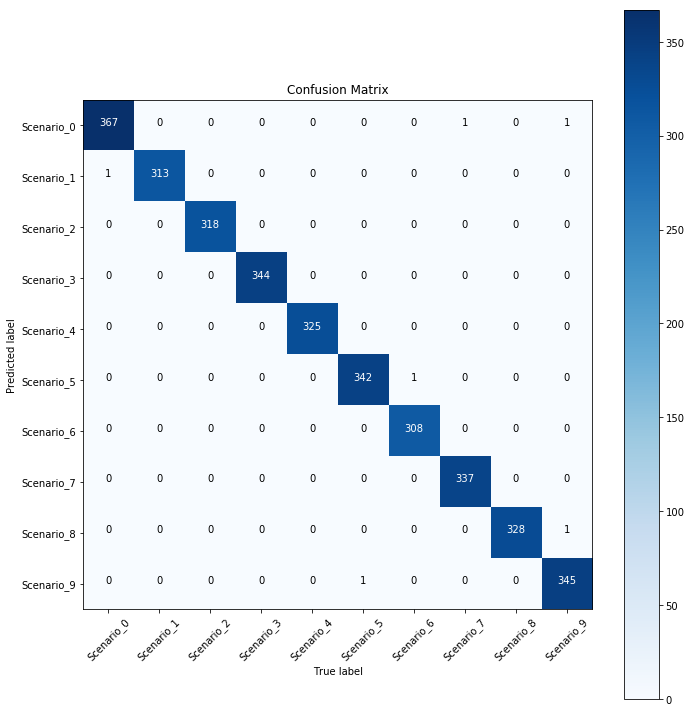

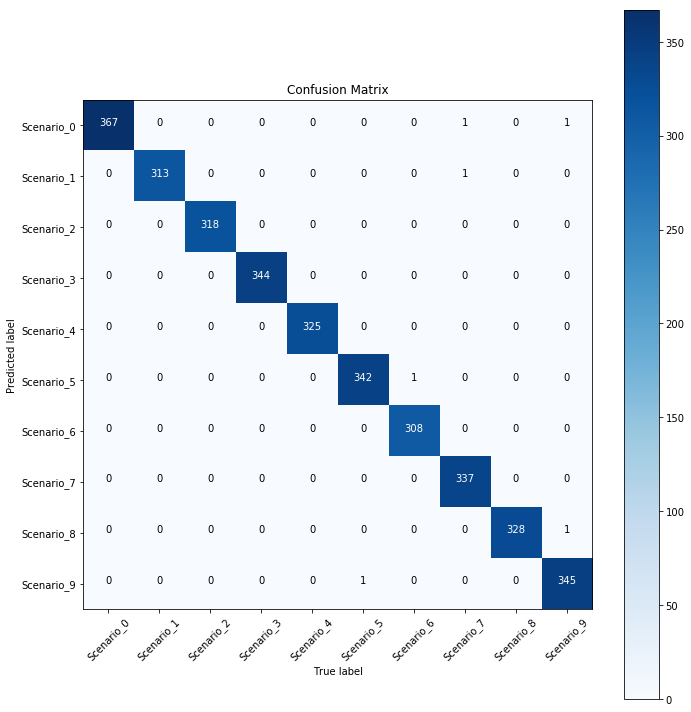

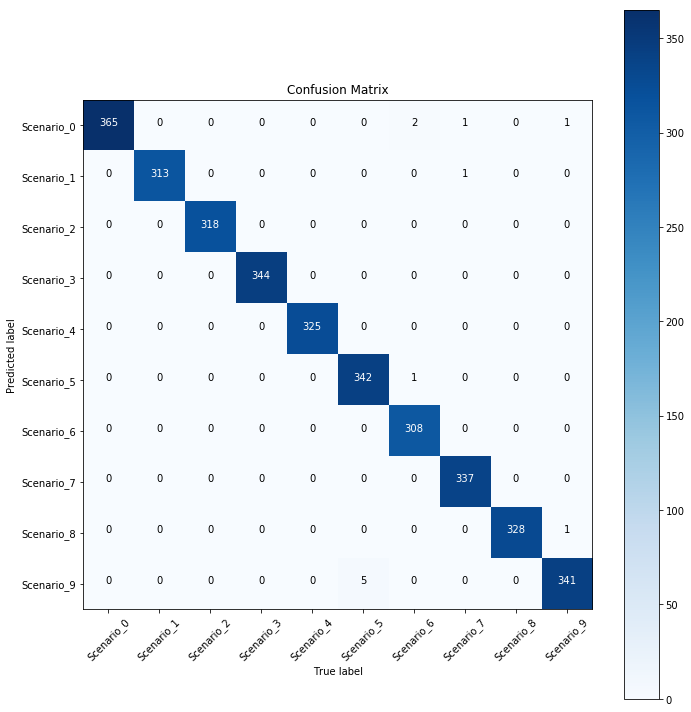

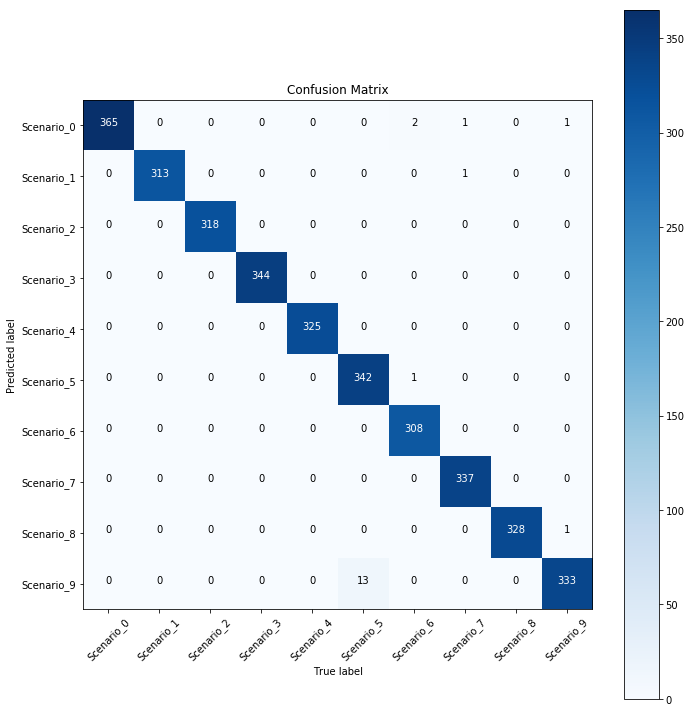

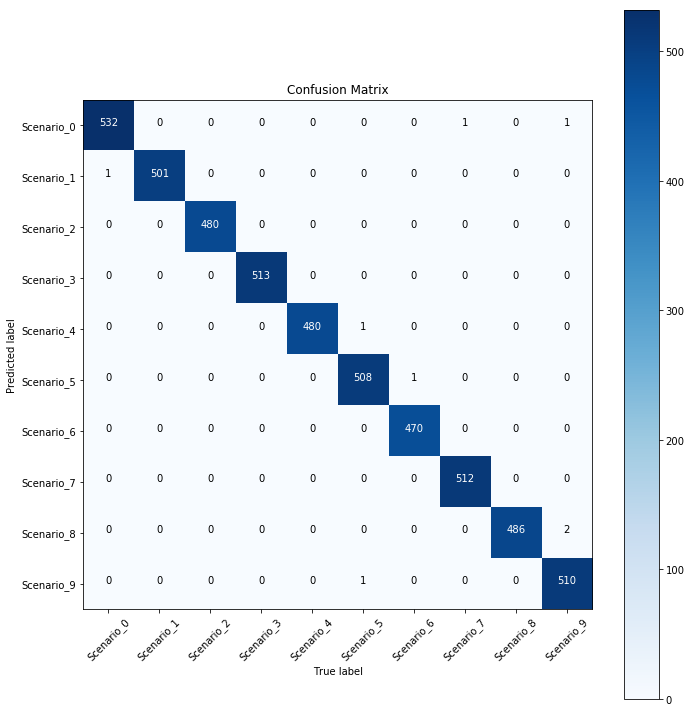

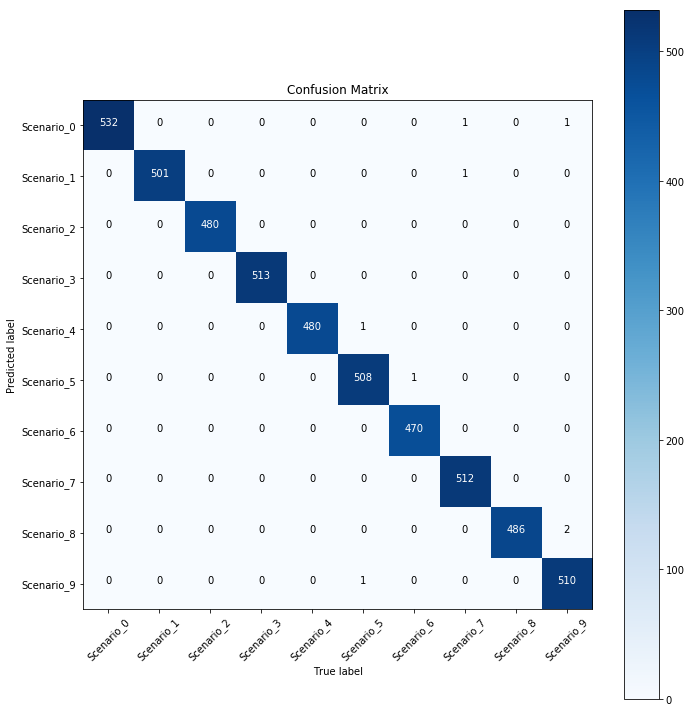

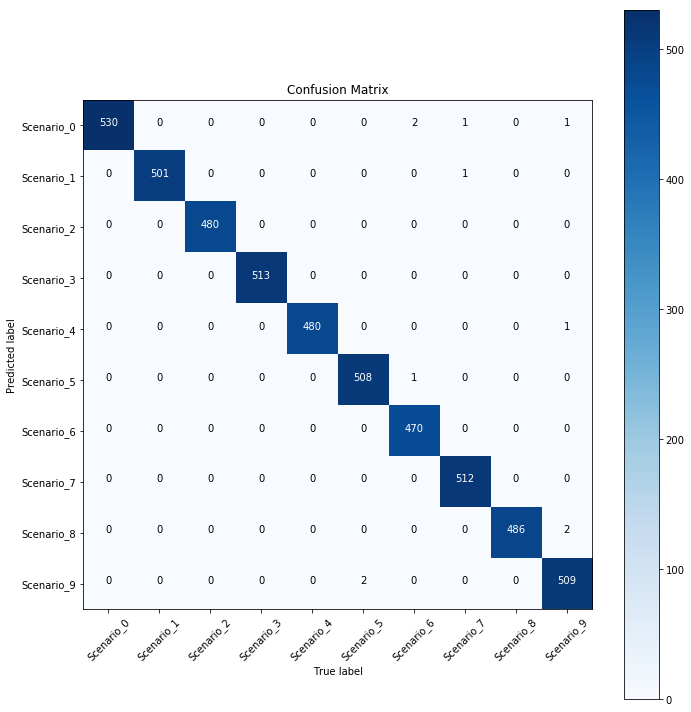

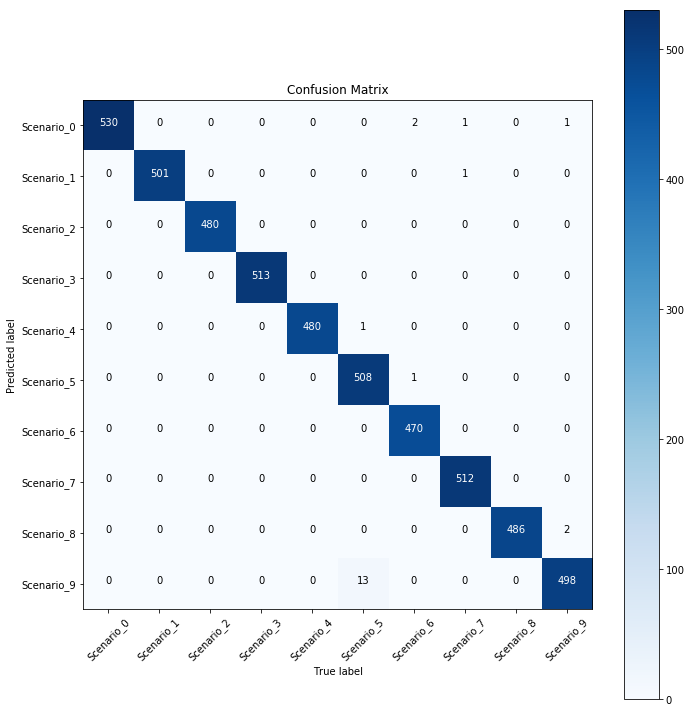

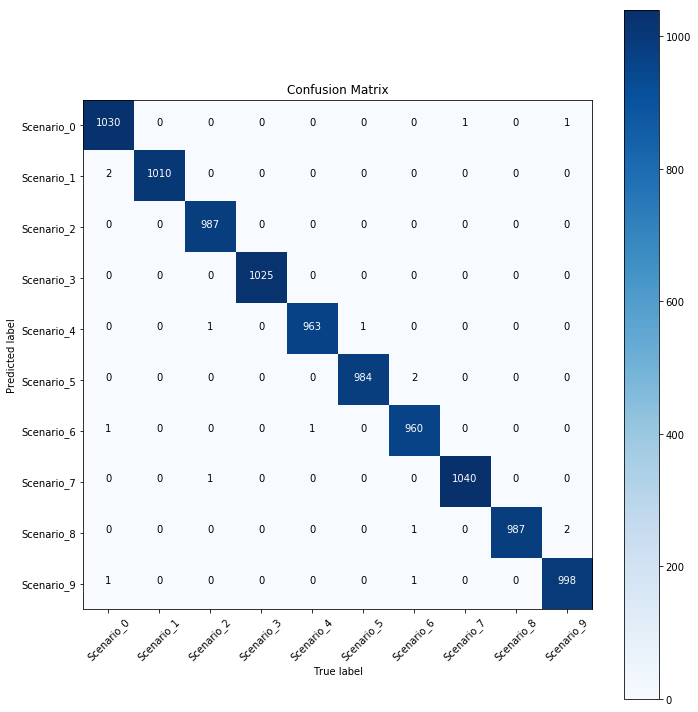

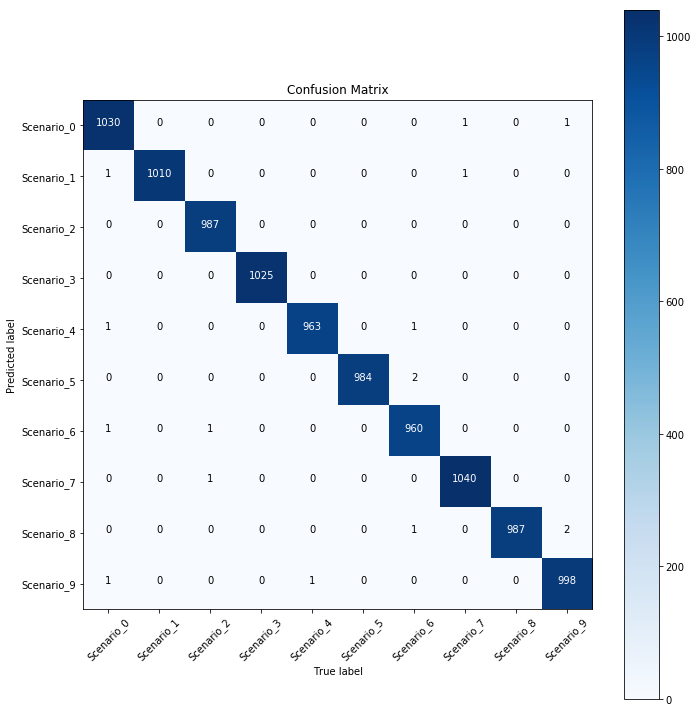

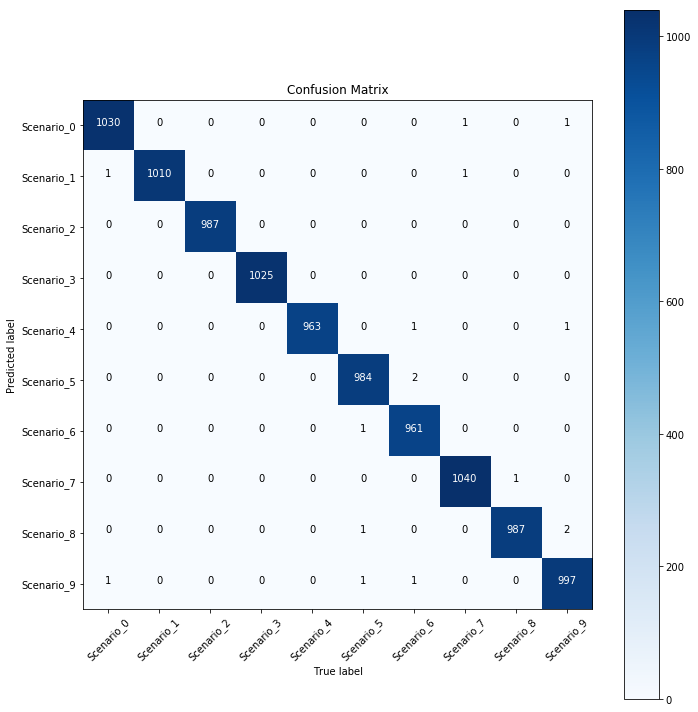

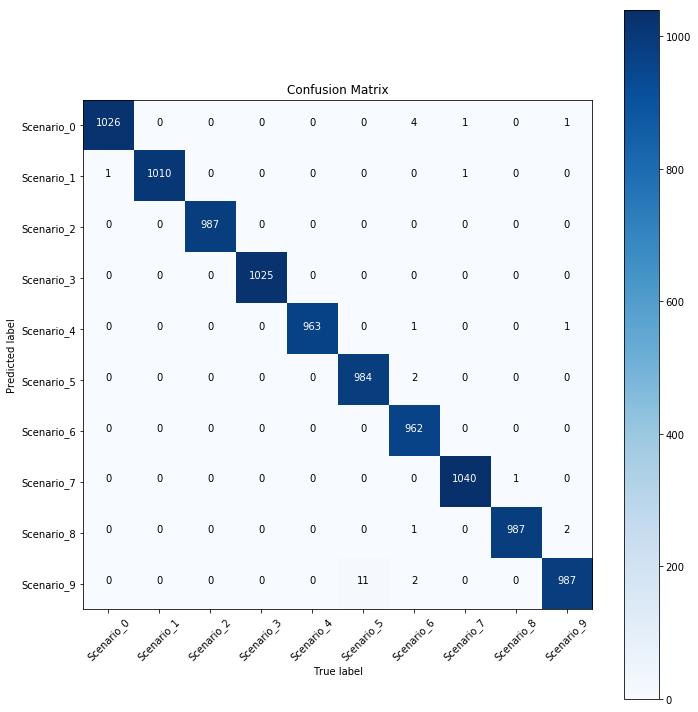

In [9]:
setup_dataset.compute_cm(y_test, knn_pred, knn_c)

In [10]:
knn_accs_scaled, knn_pred_scaled, knn_pred_times_scaled, knn_fit_times_scaled =\
setup_dataset.run_knn(X_train_scaled, X_test_scaled, y_train, y_test, knn_c)

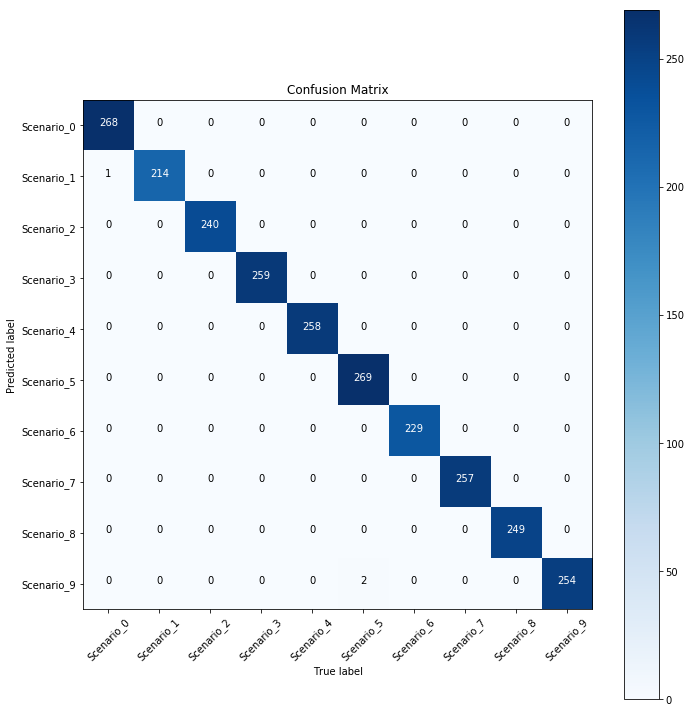

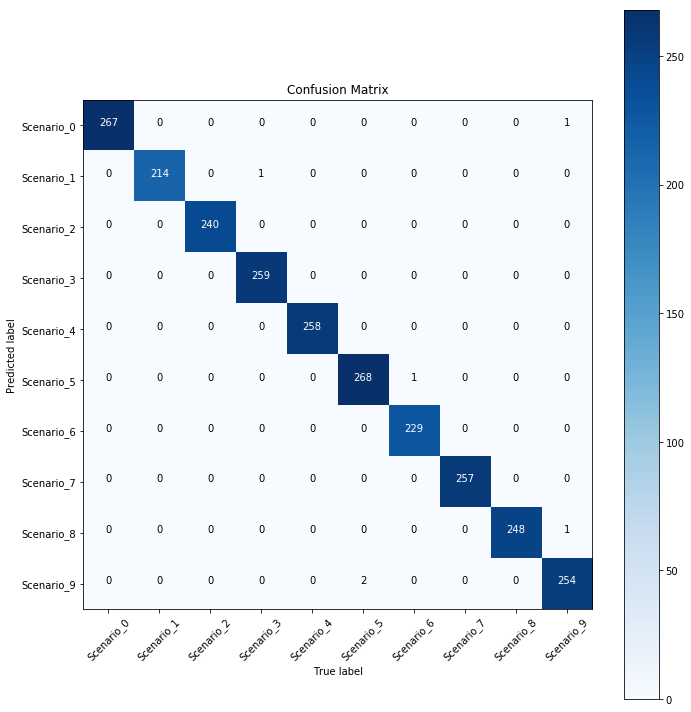

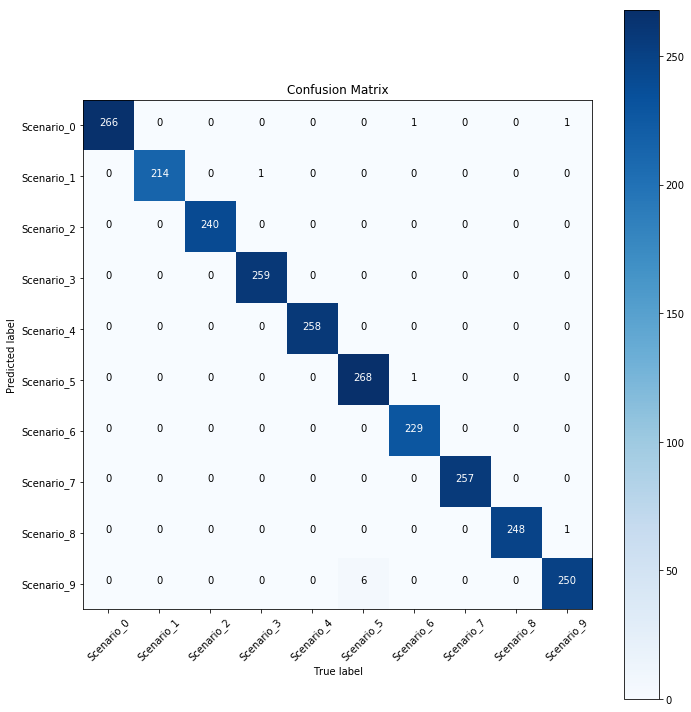

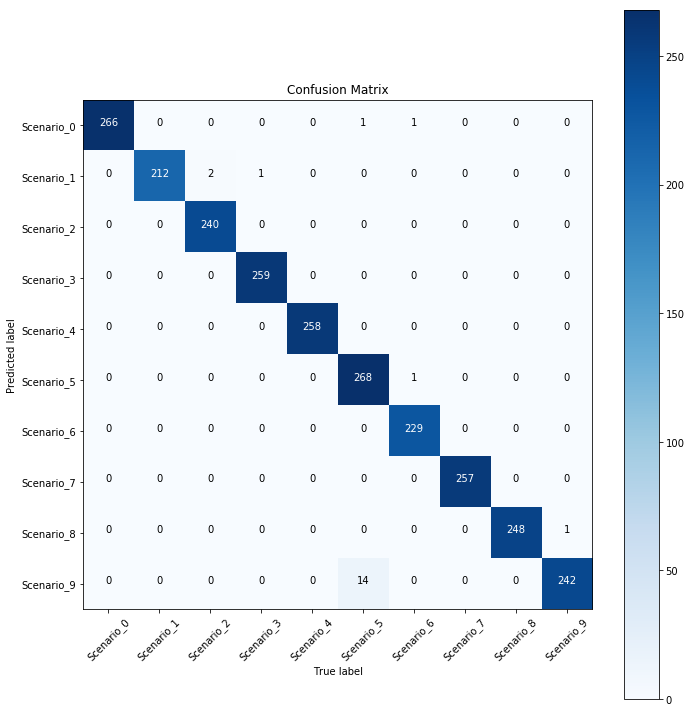

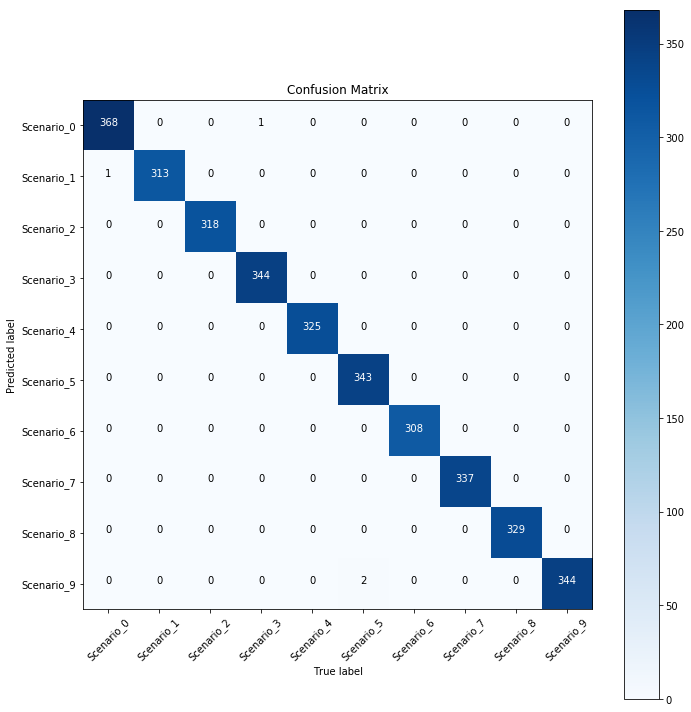

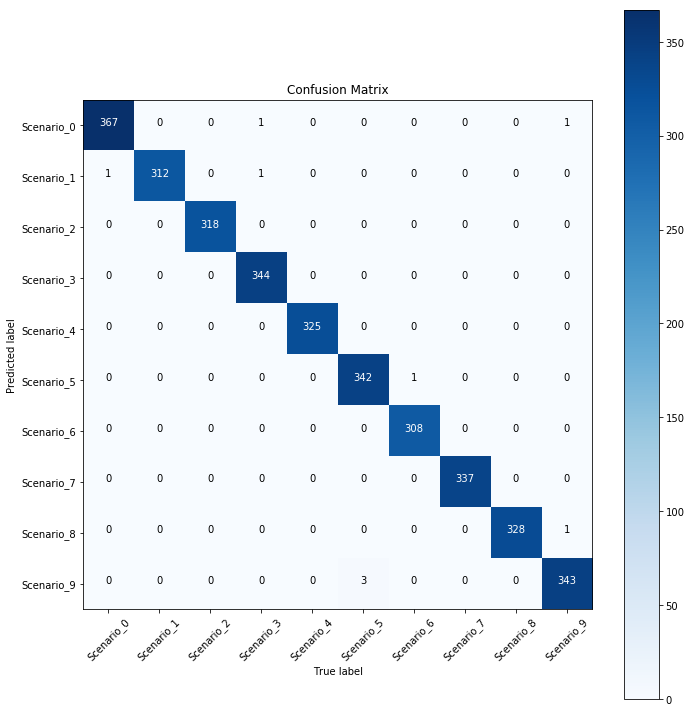

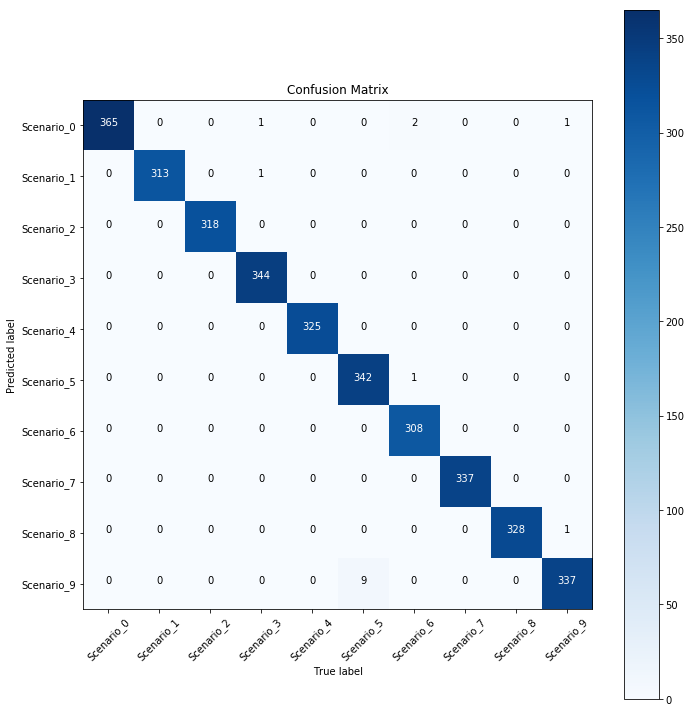

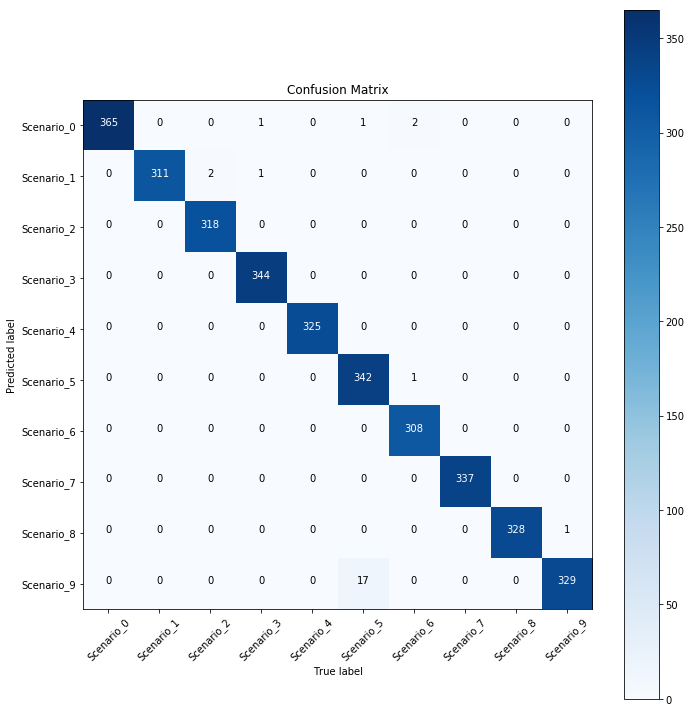

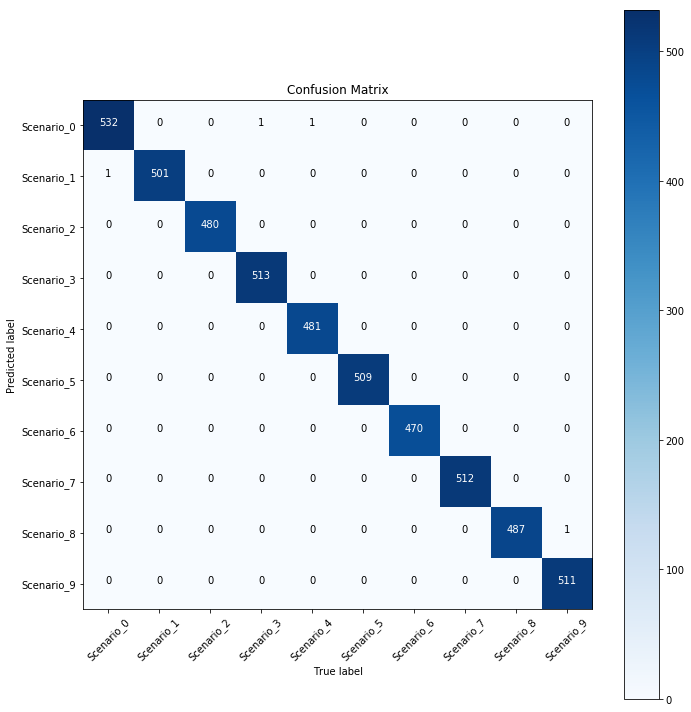

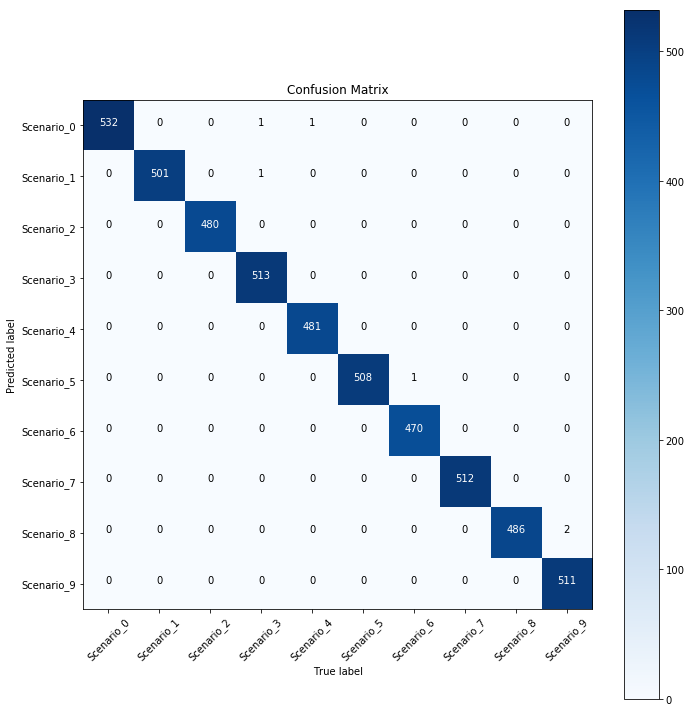

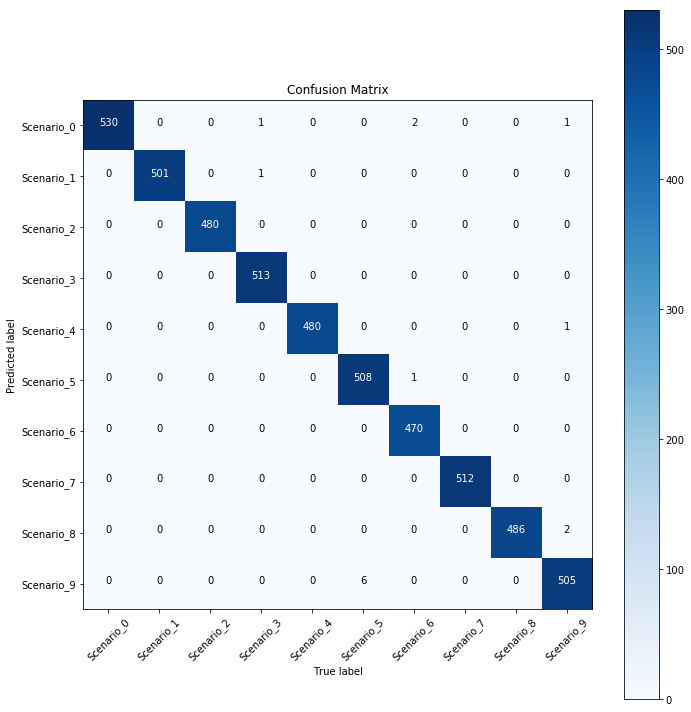

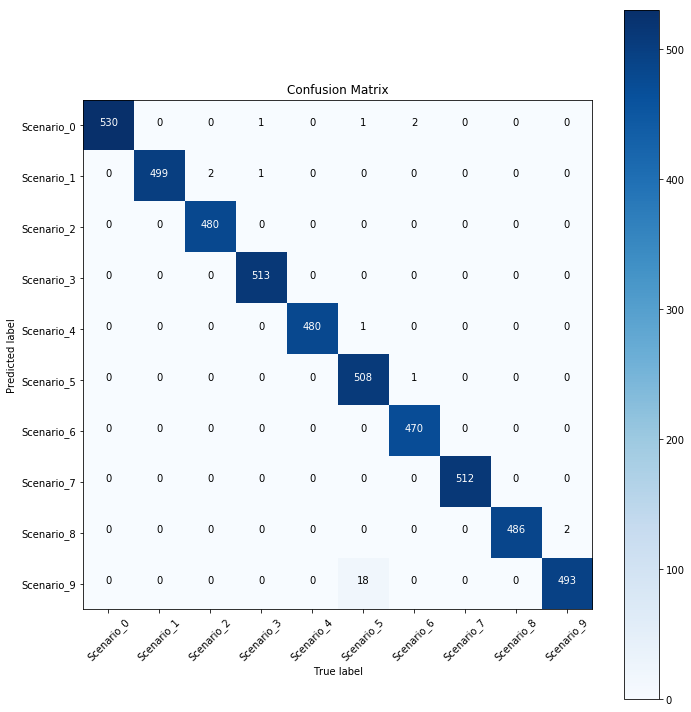

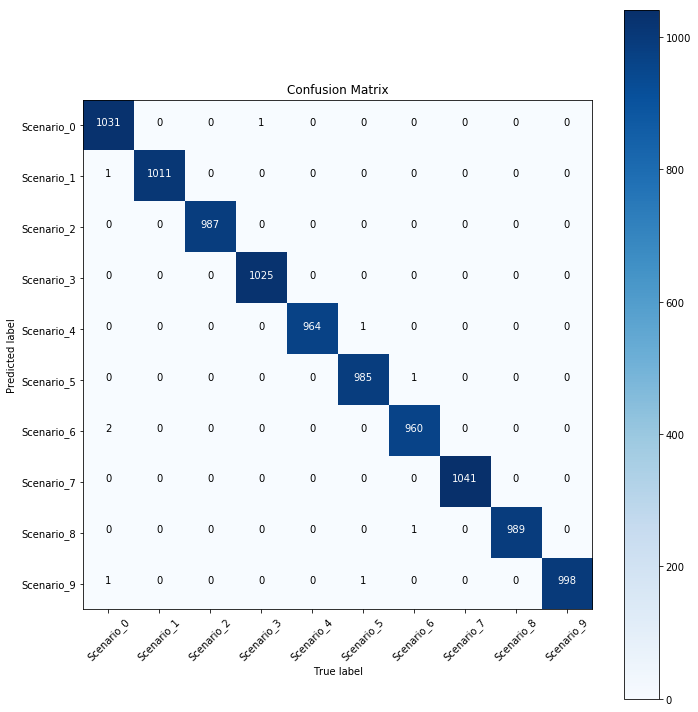

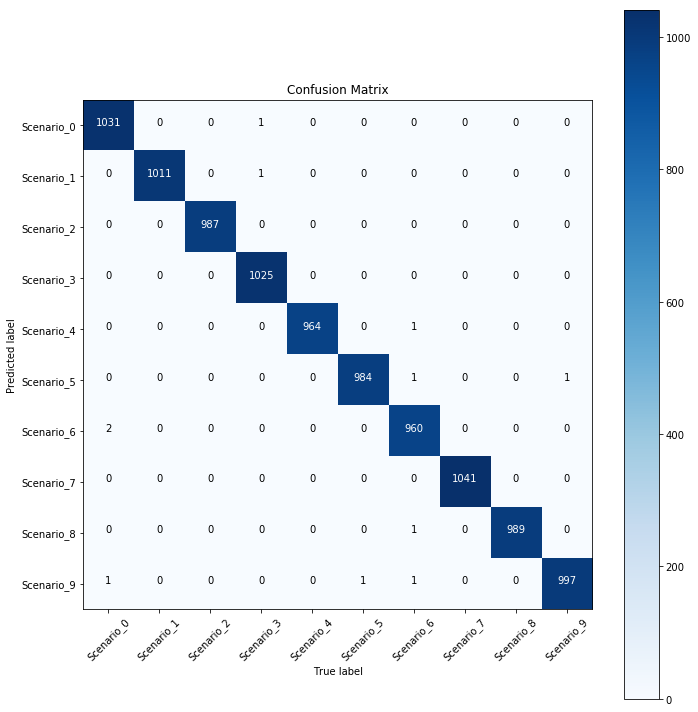

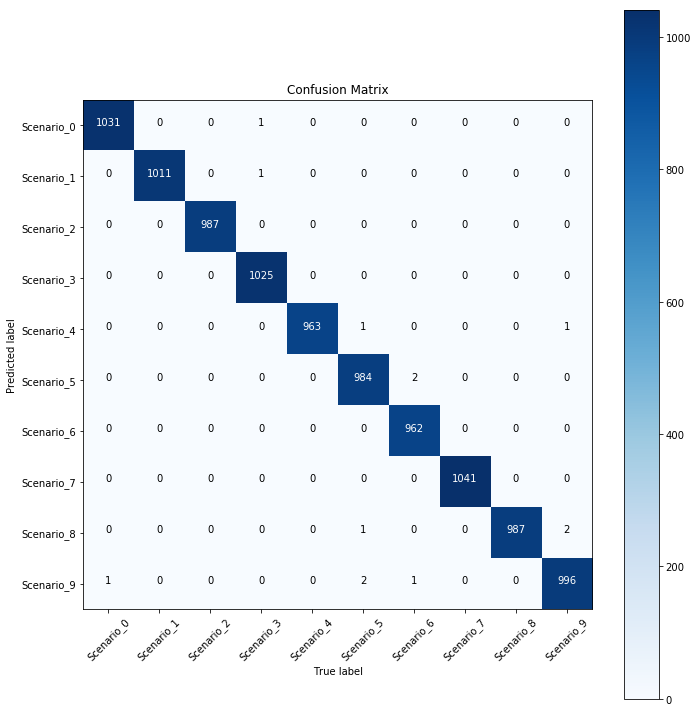

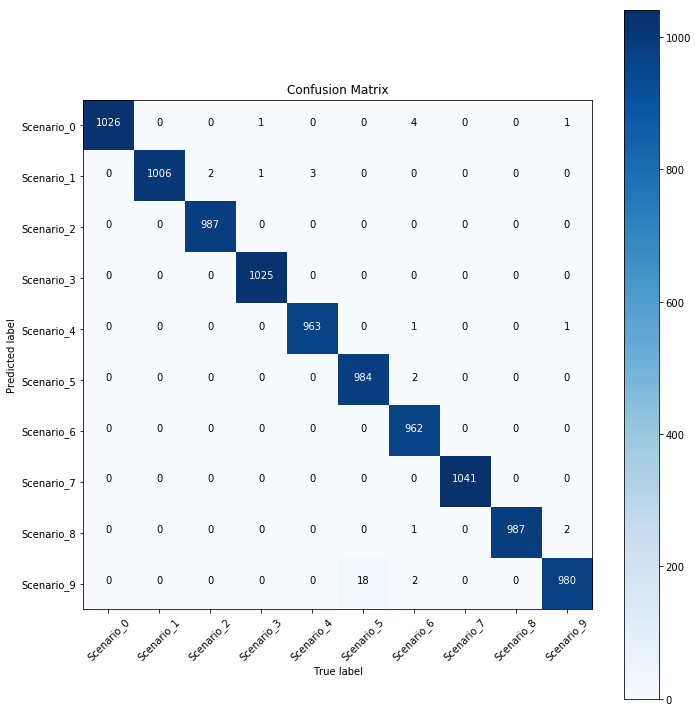

In [11]:
setup_dataset.compute_cm(y_test, knn_pred_scaled, knn_c)

In [12]:
for line in knn_accs :
    print(line)
print("====================") 
for line in knn_accs_scaled:
    print(line)

[0.99839999999999995, 0.99839999999999995, 0.996, 0.99480000000000002]
[0.99819981998199825, 0.99819981998199825, 0.99639963996399639, 0.99399939993999398]
[0.99839999999999995, 0.99839999999999995, 0.99780000000000002, 0.99560000000000004]
[0.99839999999999995, 0.99839999999999995, 0.99839999999999995, 0.99709999999999999]
[0.99880000000000002, 0.99760000000000004, 0.99560000000000004, 0.99160000000000004]
[0.9987998799879988, 0.99729972997299732, 0.99519951995199518, 0.99219921992199223]
[0.99919999999999998, 0.99880000000000002, 0.997, 0.99419999999999997]
[0.99909999999999999, 0.99890000000000001, 0.99870000000000003, 0.99609999999999999]


In [13]:
dtc_accs, dtc_pred, dtc_pred_times, dtc_fit_times = \
setup_dataset.run_decision_tree(X_train, X_test, y_train, y_test, dtc_c)

In [14]:
dtc_accs, dtc_pred, dtc_pred_times, dtc_fit_times = \
setup_dataset.run_decision_tree(X_train, X_test, y_train, y_test, dtc_c)

In [15]:
dtc_accs_scaled, dtc_pred_scaled, dtc_pred_times_scaled, dtc_fit_times_scaled = \
setup_dataset.run_decision_tree(X_train_scaled, X_test_scaled, y_train, y_test, dtc_c)

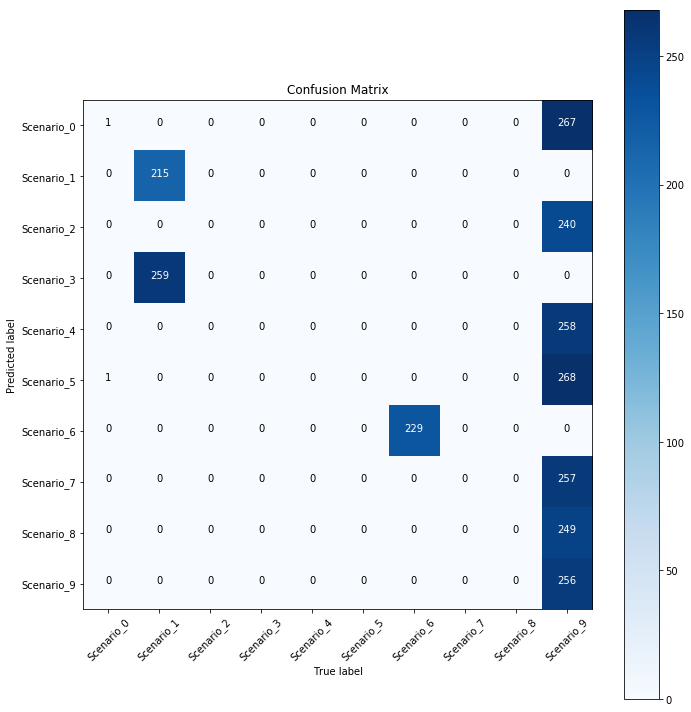

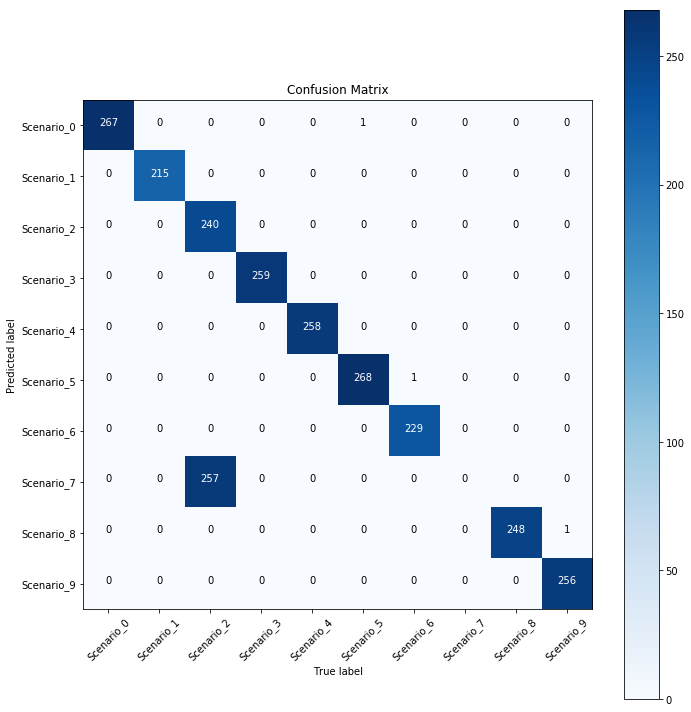

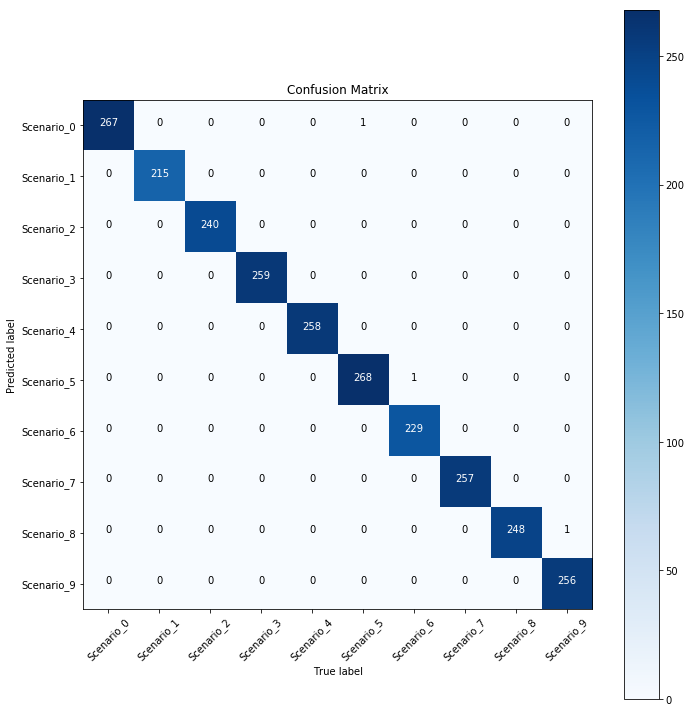

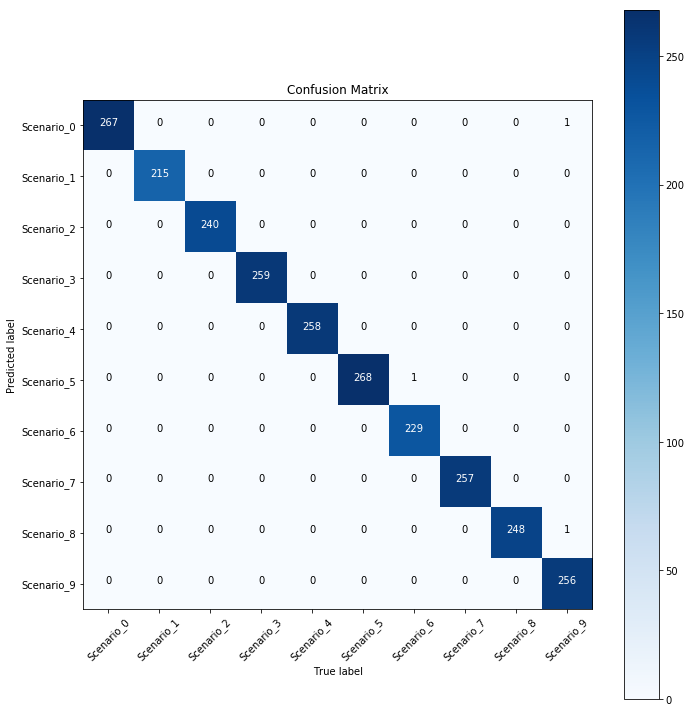

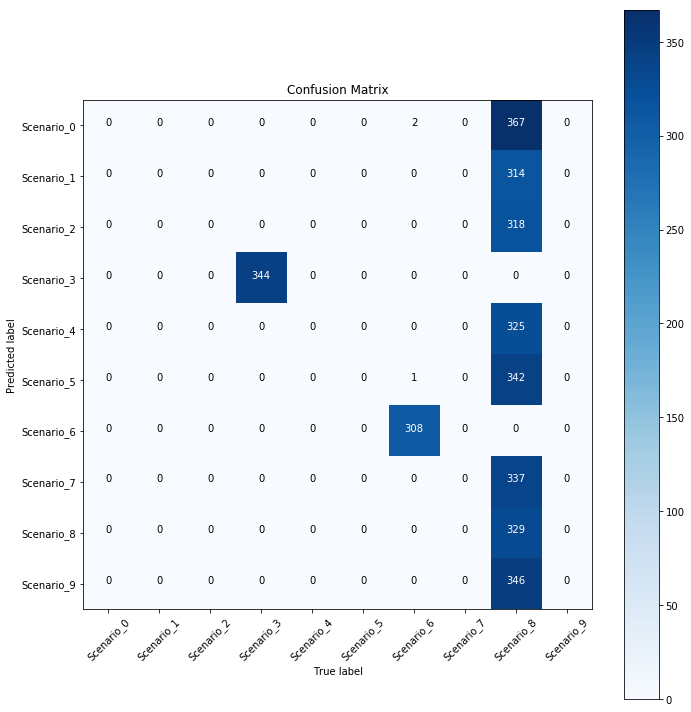

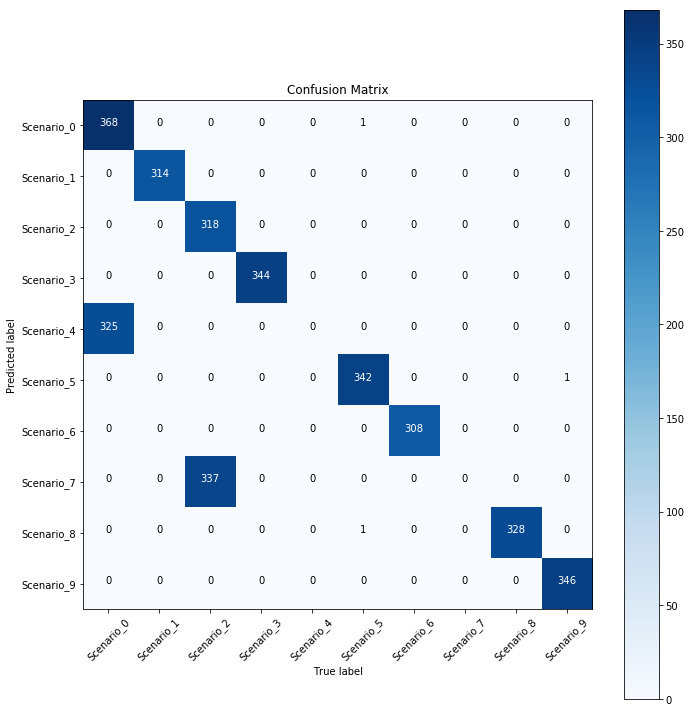

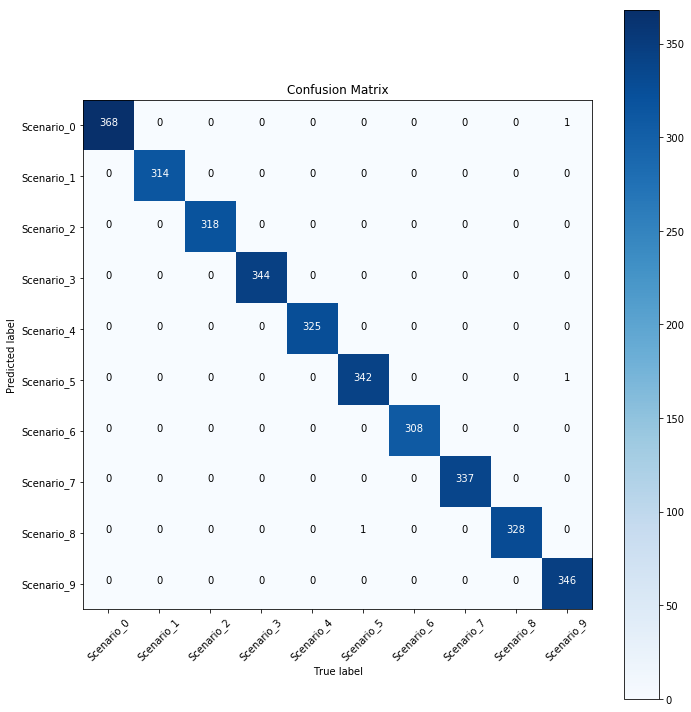

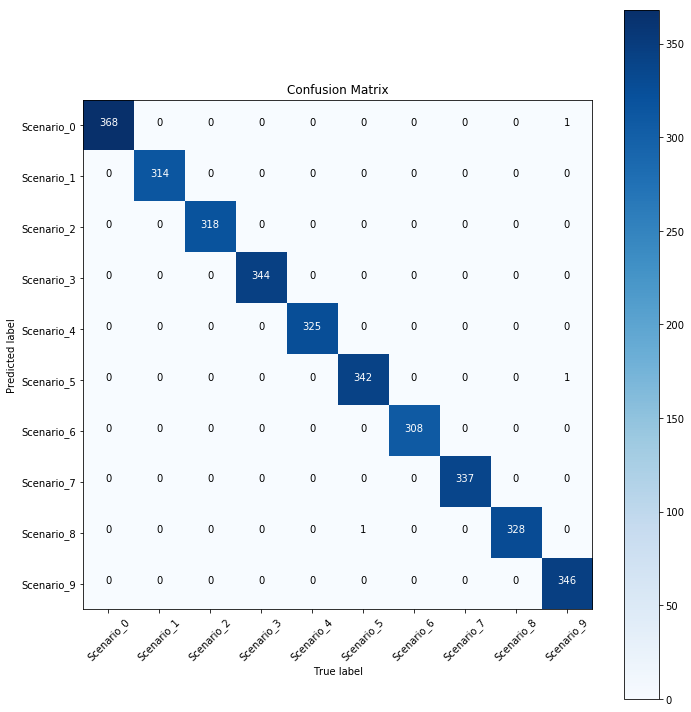

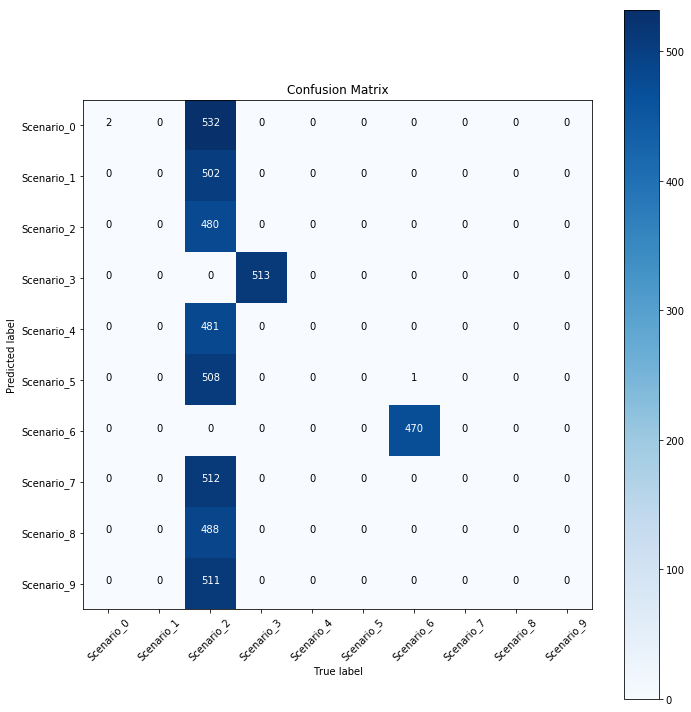

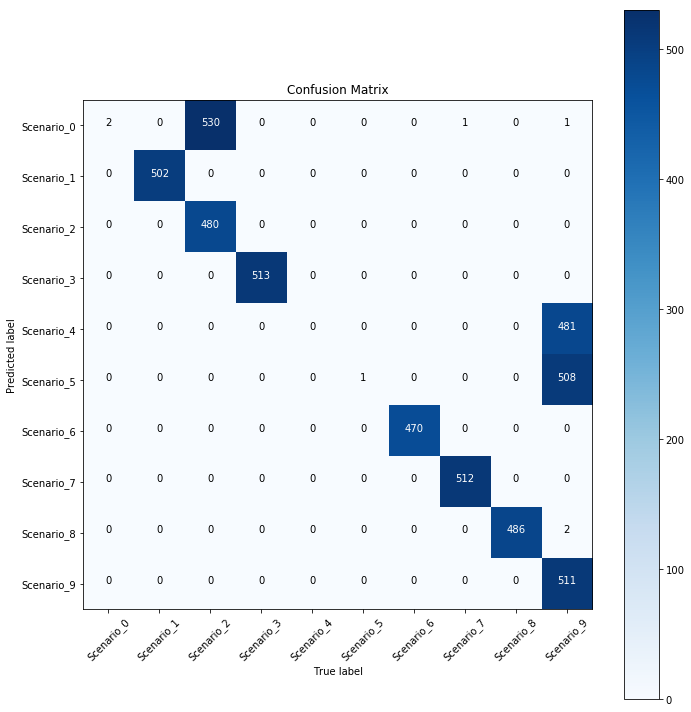

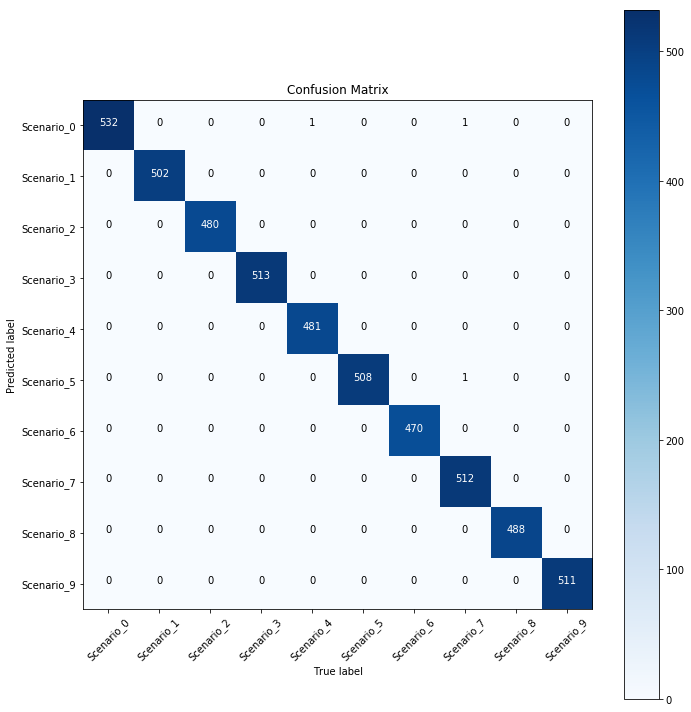

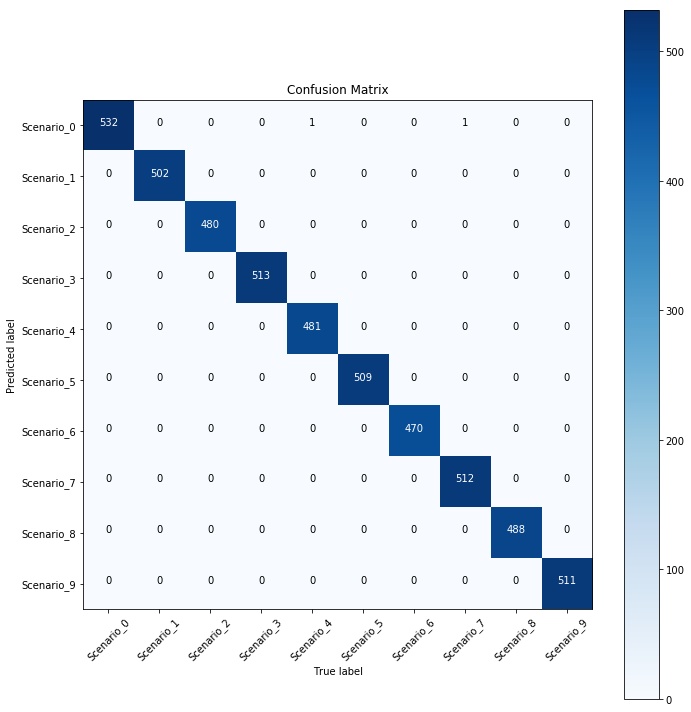

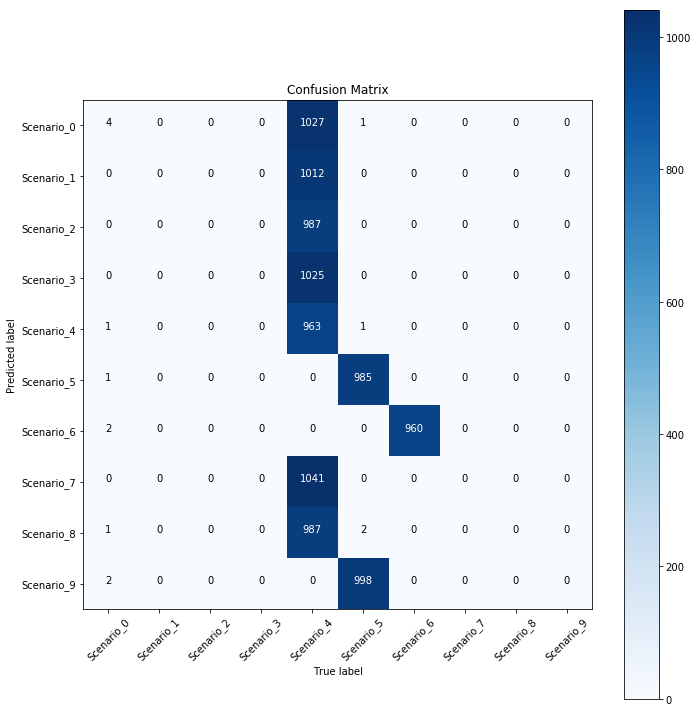

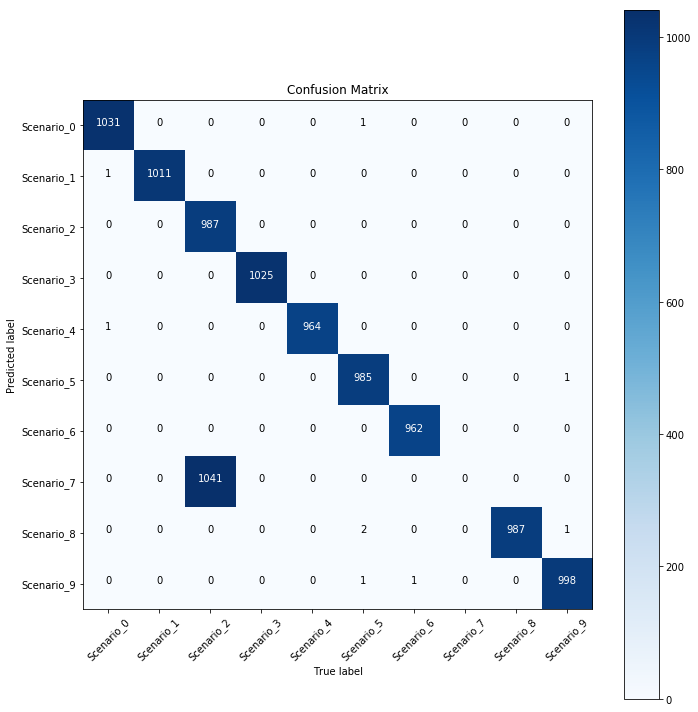

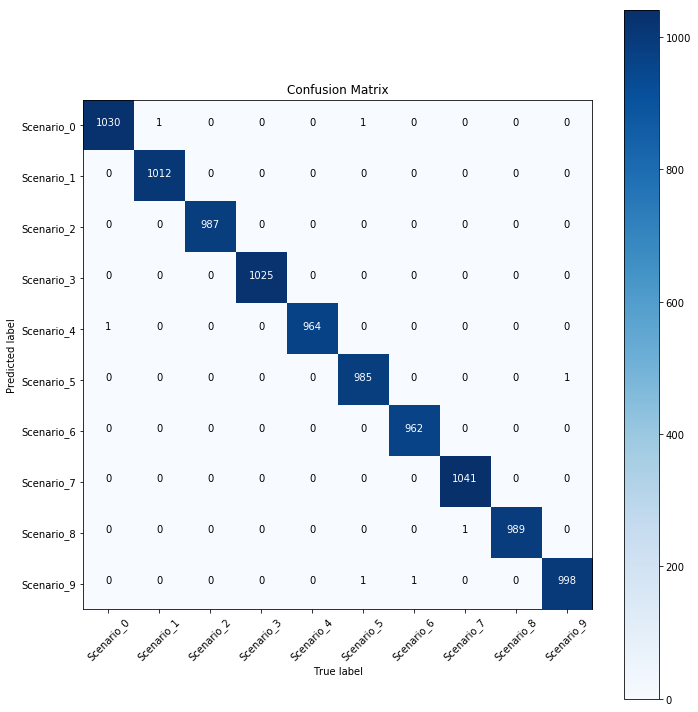

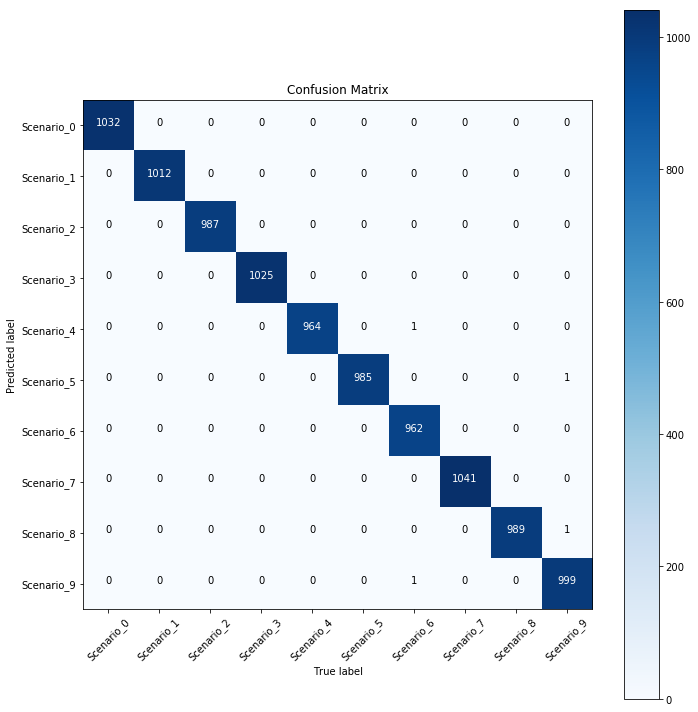

In [16]:
setup_dataset.compute_cm(y_test, dtc_pred, dtc_c)

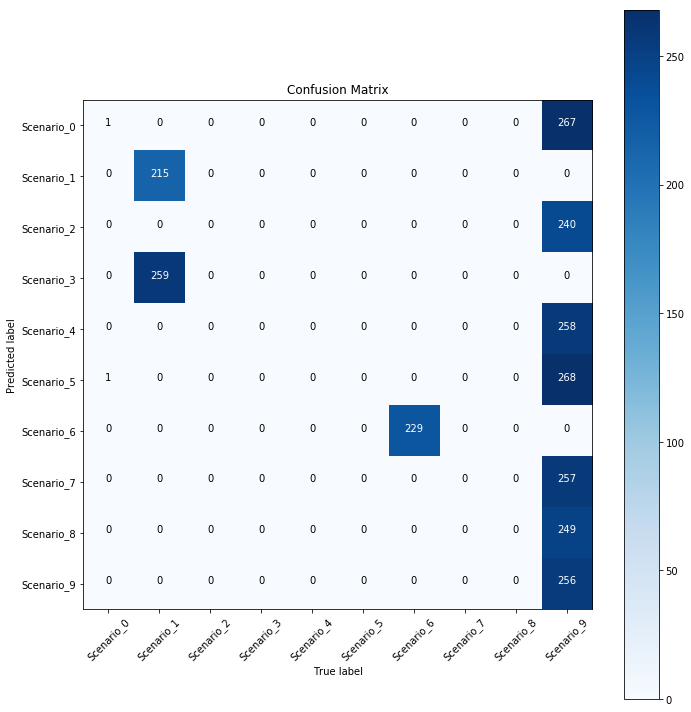

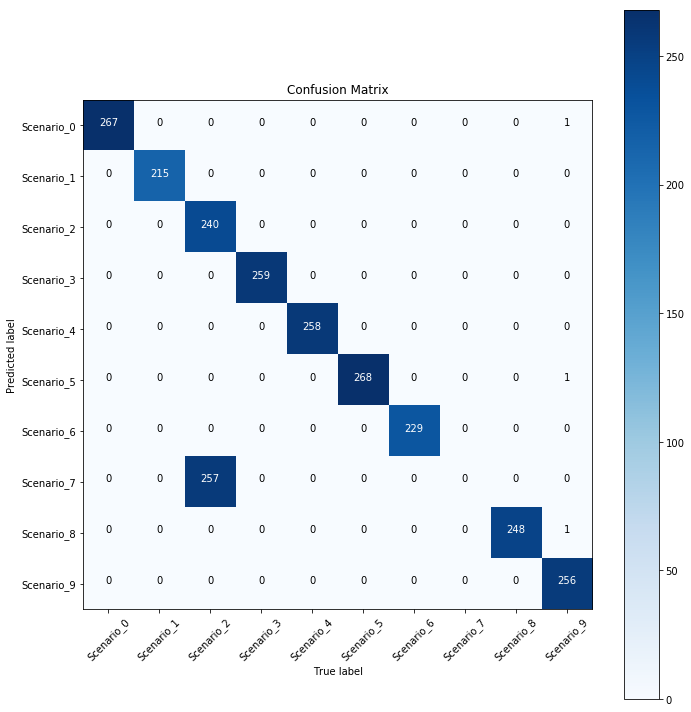

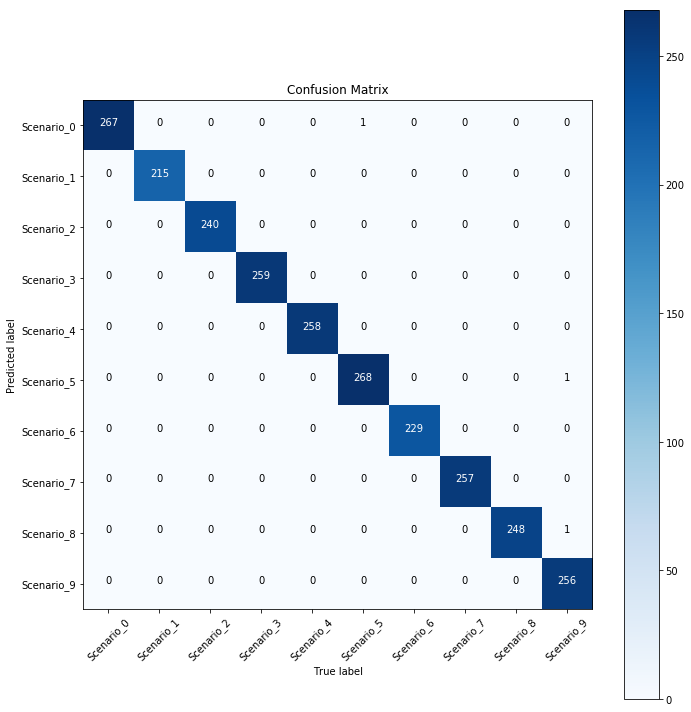

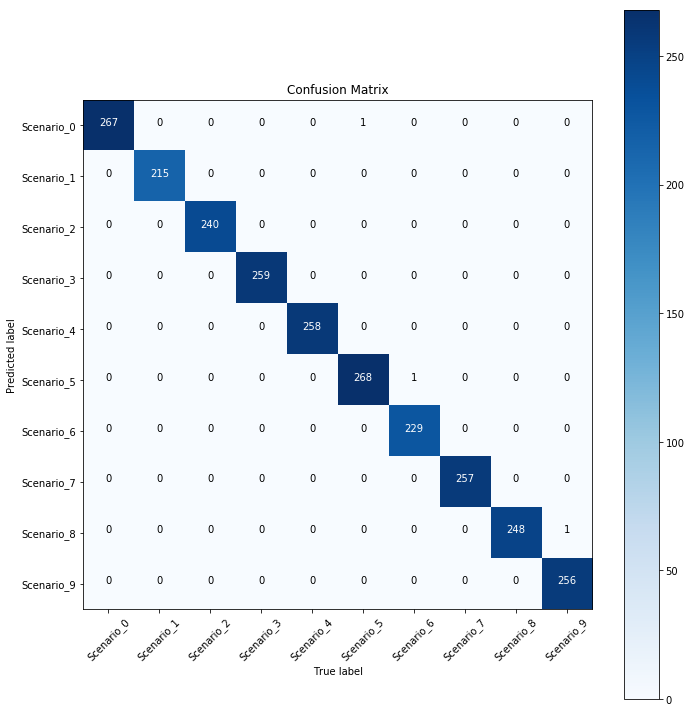

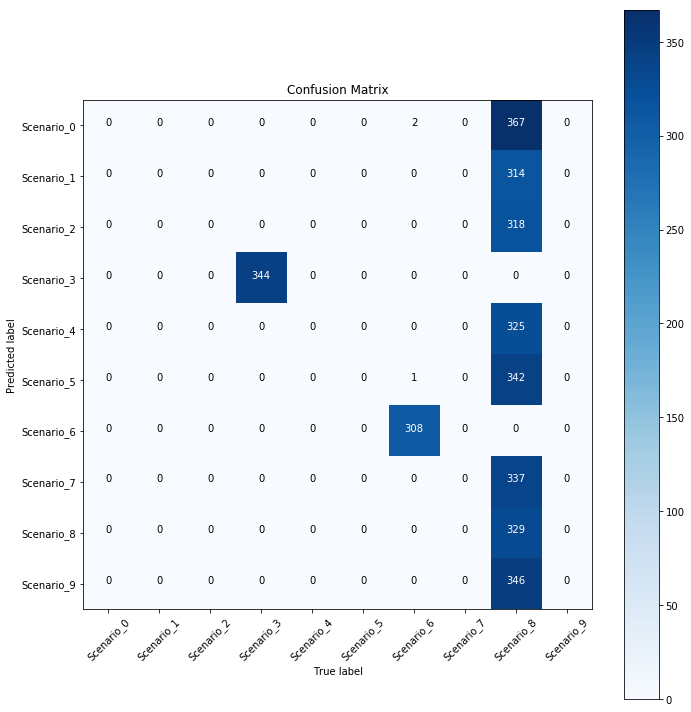

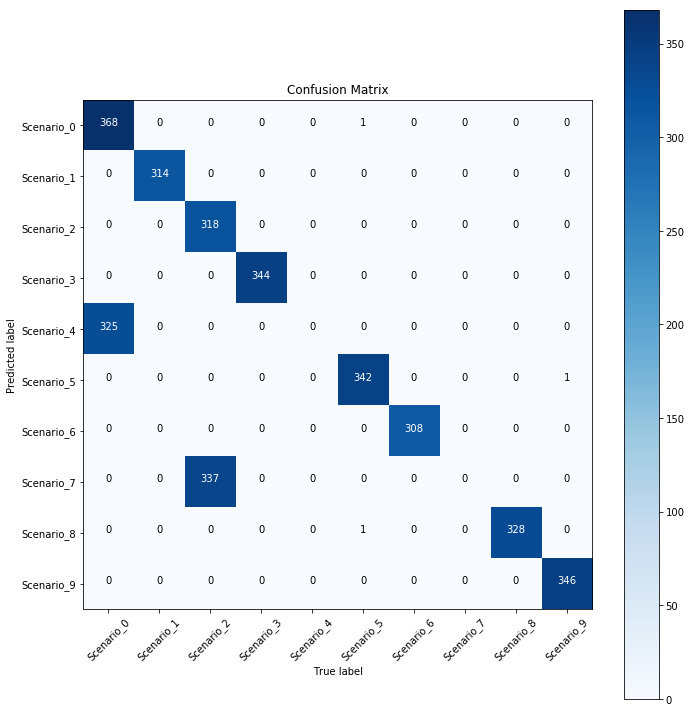

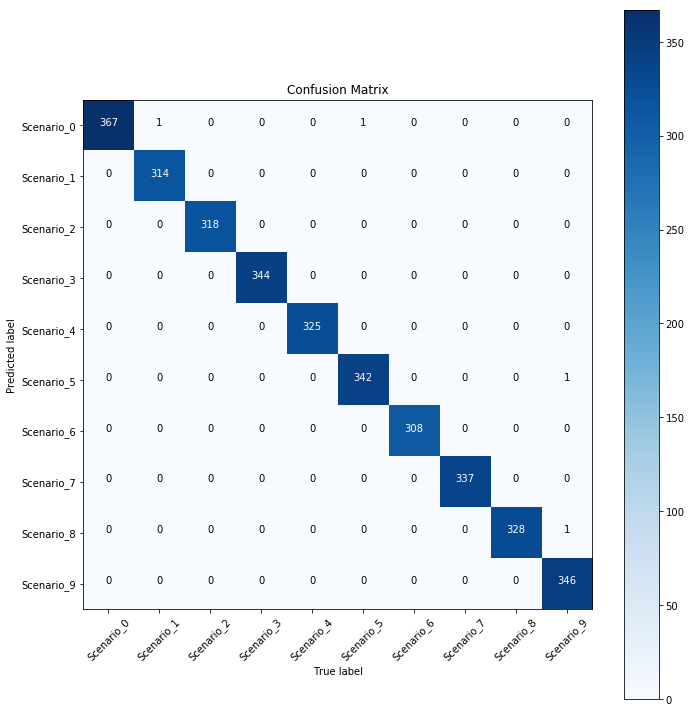

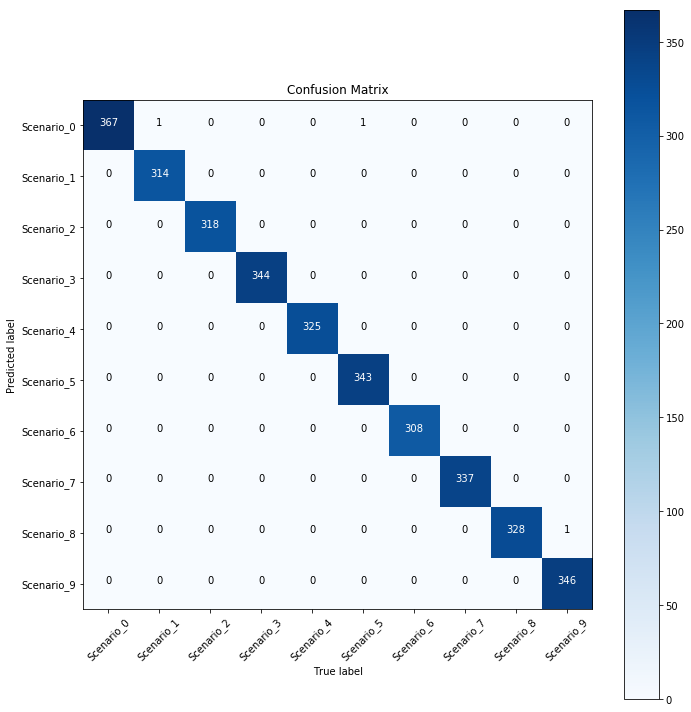

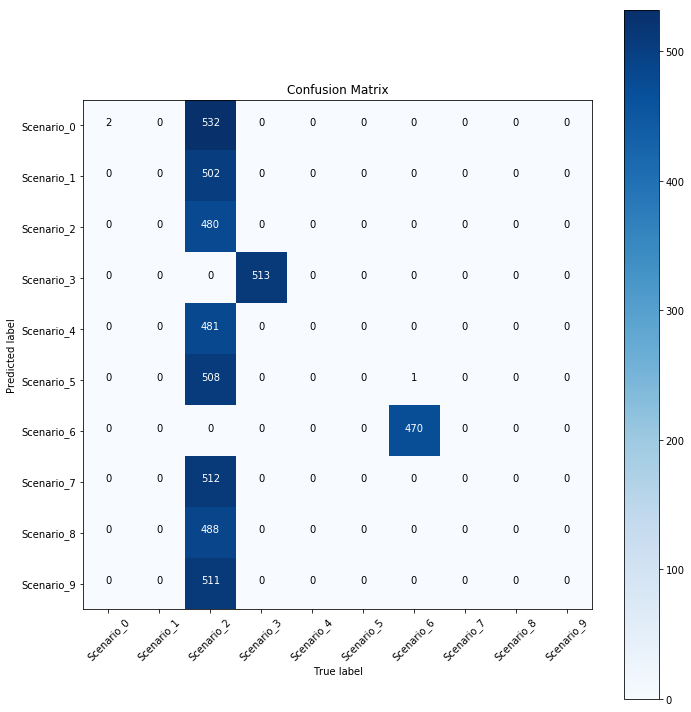

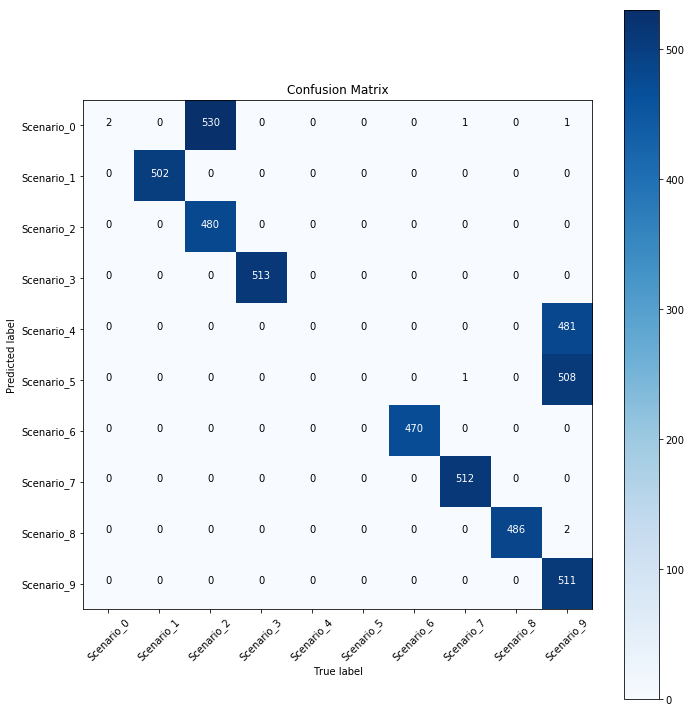

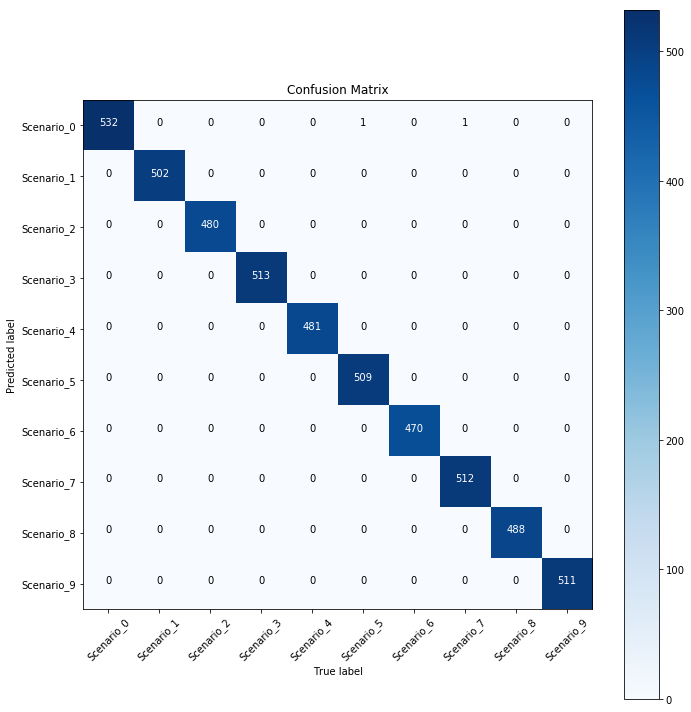

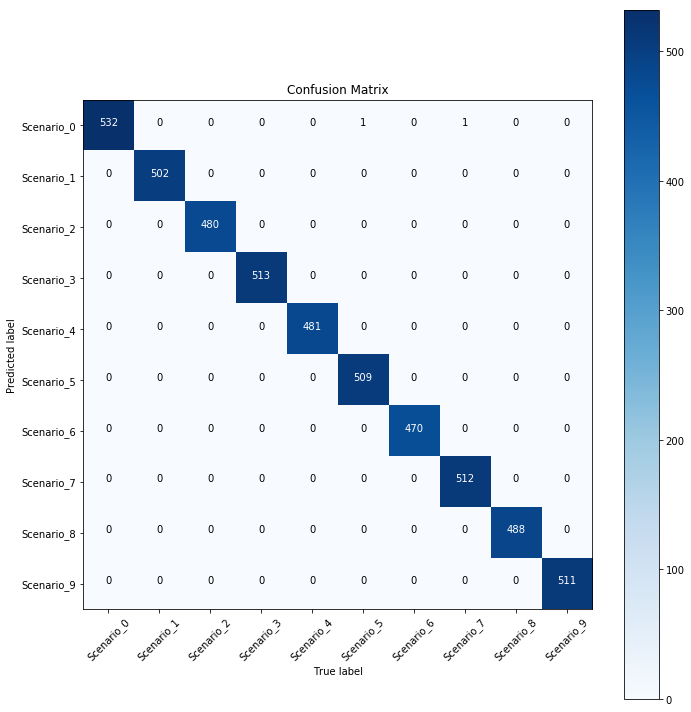

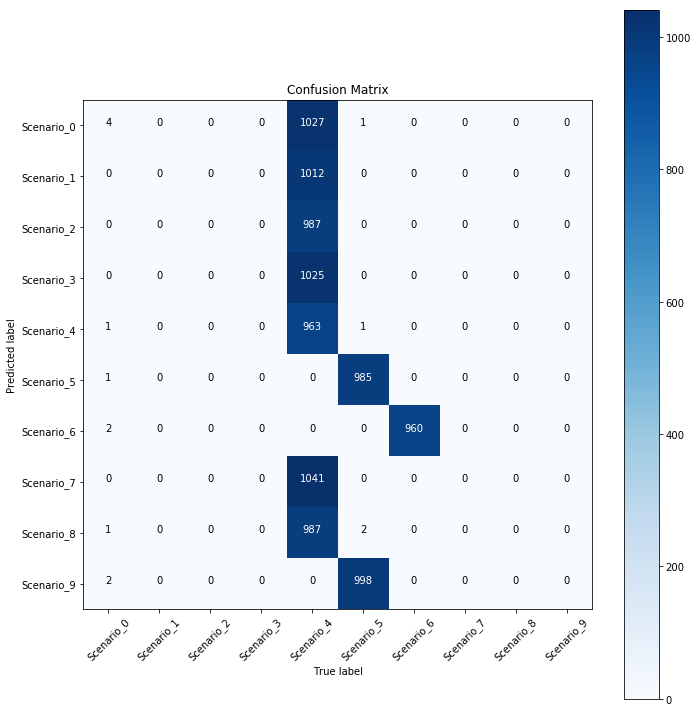

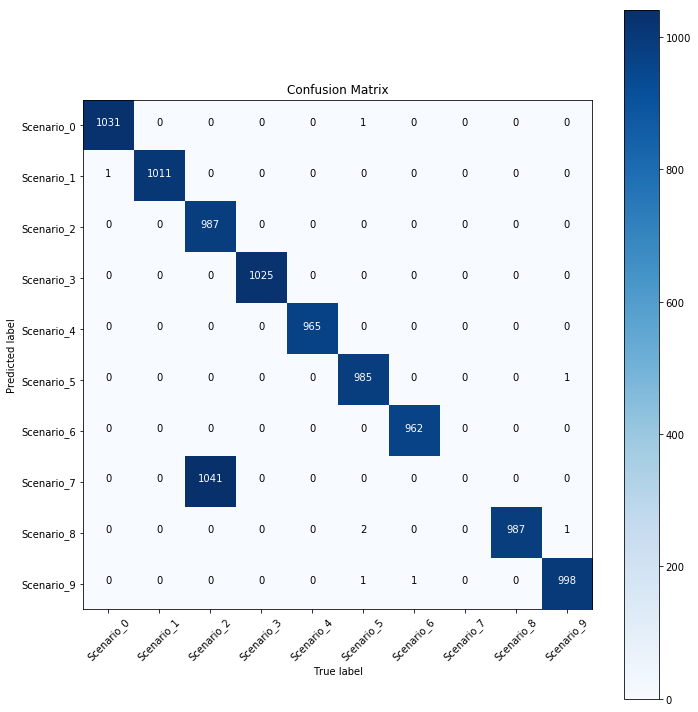

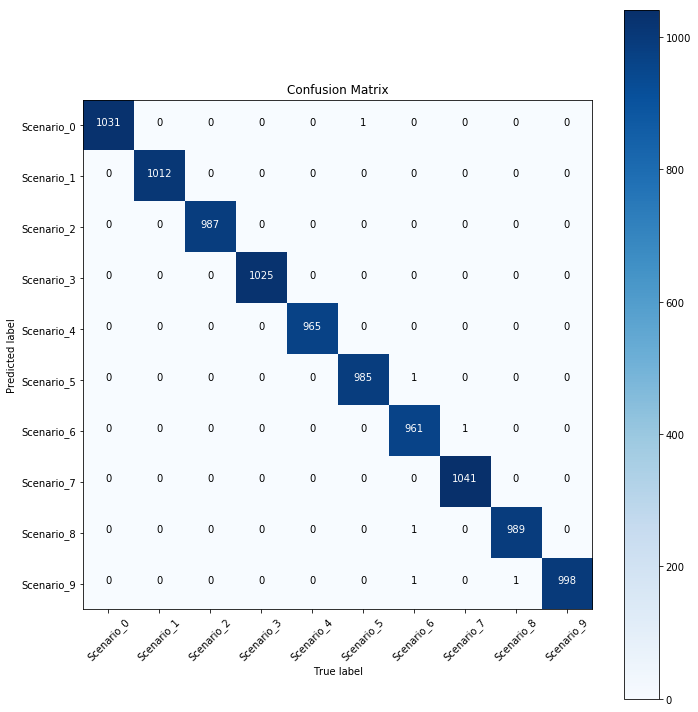

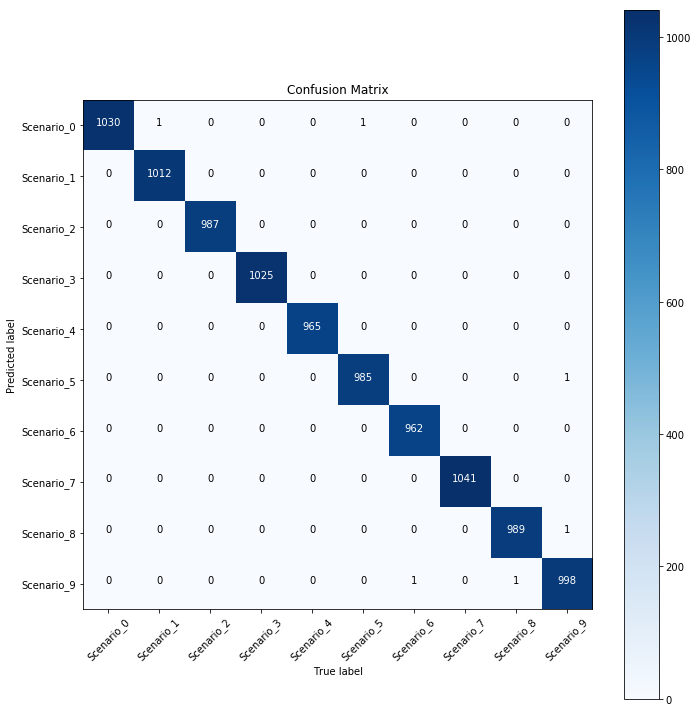

In [17]:
setup_dataset.compute_cm(y_test, dtc_pred_scaled, dtc_c)

In [18]:
nbc_accs, nbc_pred, nbc_pred_times, nbc_fit_times = \
setup_dataset.run_naive_bayes(X_train, X_test, y_train, y_test, (1,))

In [19]:
nbc_accs_scaled, nbc_pred_scaled, nbc_pred_times_scaled, nbc_fit_times_scaled = \
setup_dataset.run_naive_bayes(X_train_scaled, X_test_scaled, y_train, y_test, (1,))

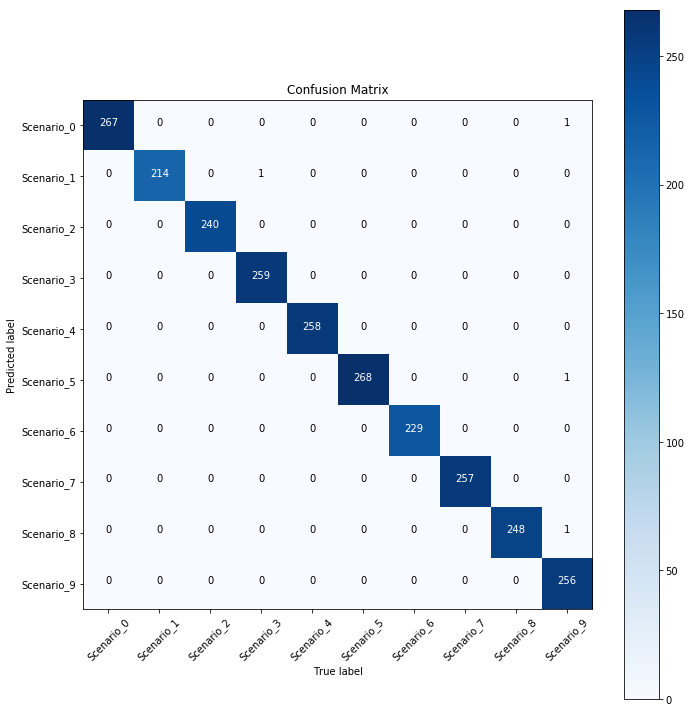

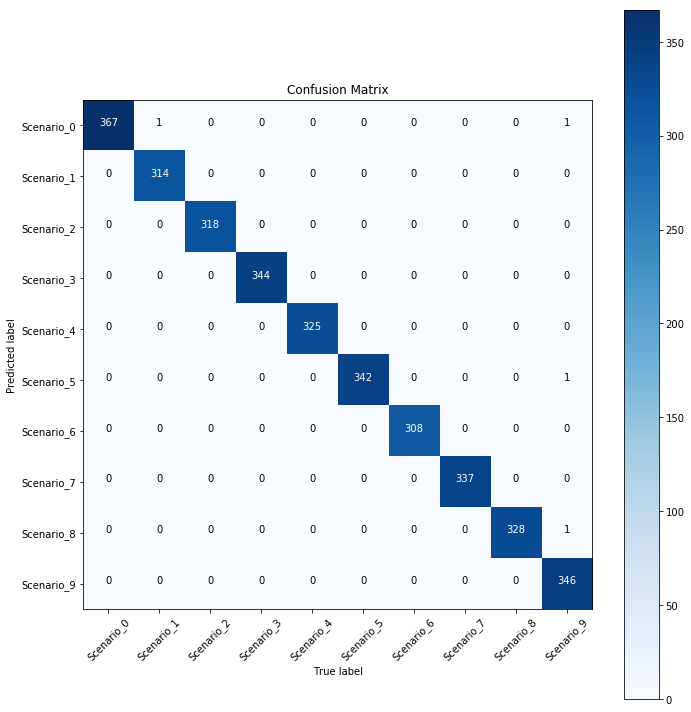

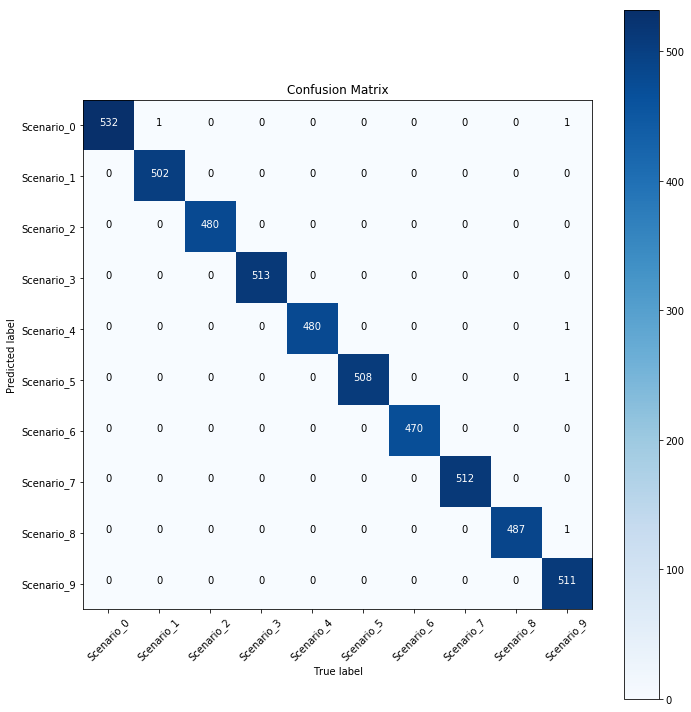

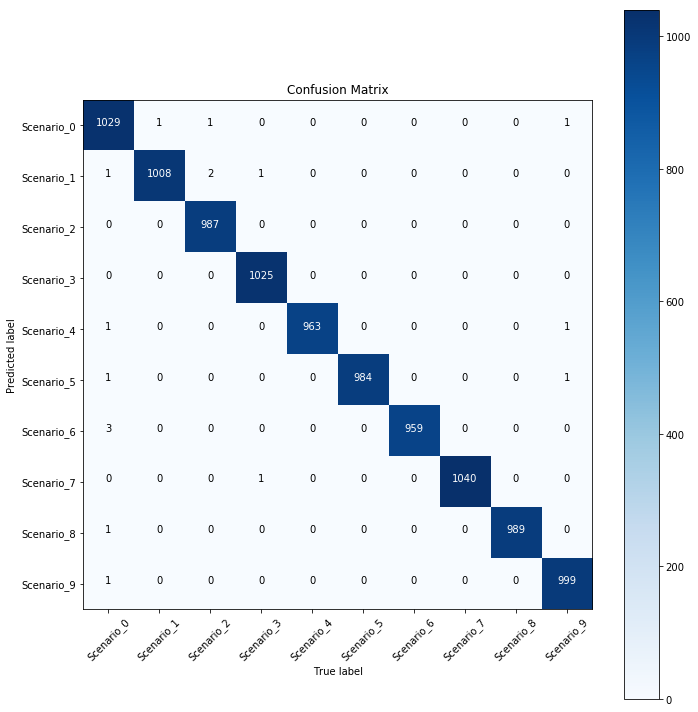

In [20]:
setup_dataset.compute_cm(y_test, nbc_pred, [1])

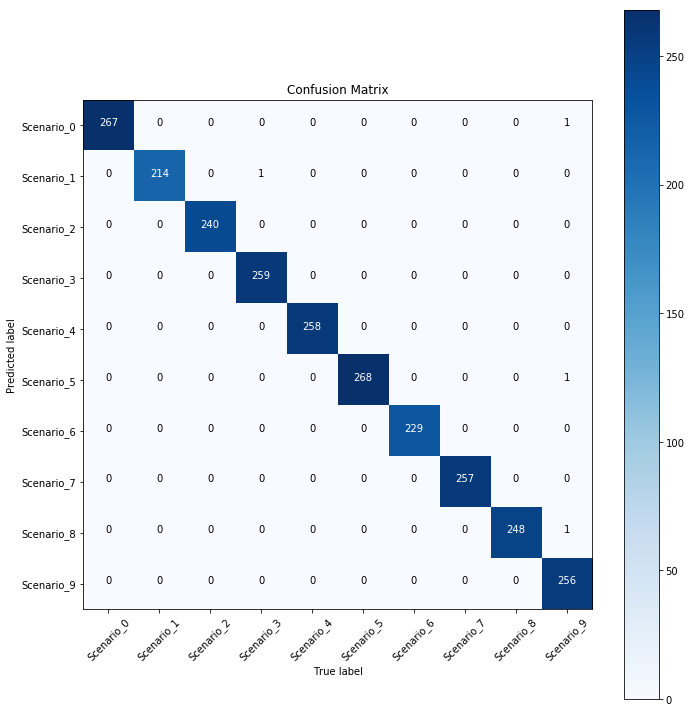

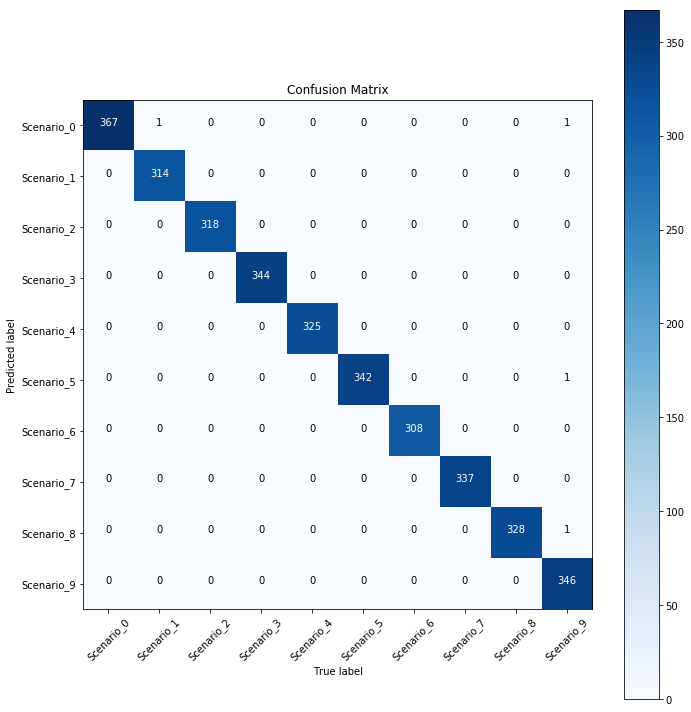

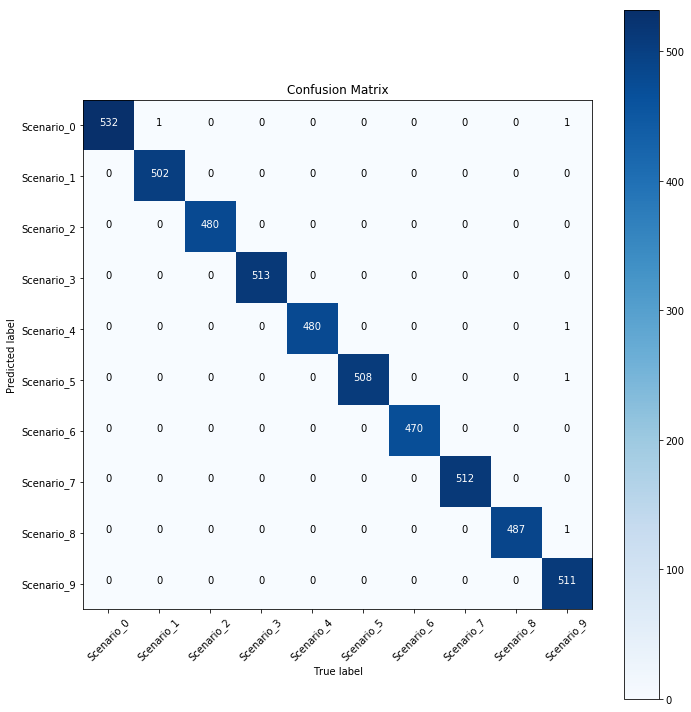

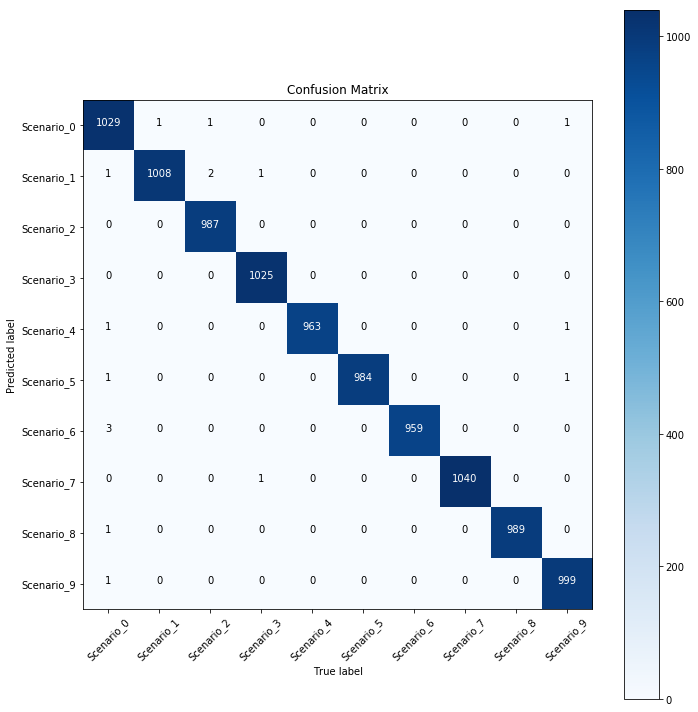

In [21]:
setup_dataset.compute_cm(y_test, nbc_pred_scaled, [1])

In [22]:
abc_accs, abc_pred, abc_pred_times, abc_fit_times = \
setup_dataset.run_adaboost(X_train, X_test, y_train, y_test, (1,))

In [23]:
abc_accs_scaled, abc_pred_scaled, abc_pred_times_scaled, abc_fit_times_scaled = \
setup_dataset.run_adaboost(X_train_scaled, X_test_scaled, y_train, y_test, (1,))

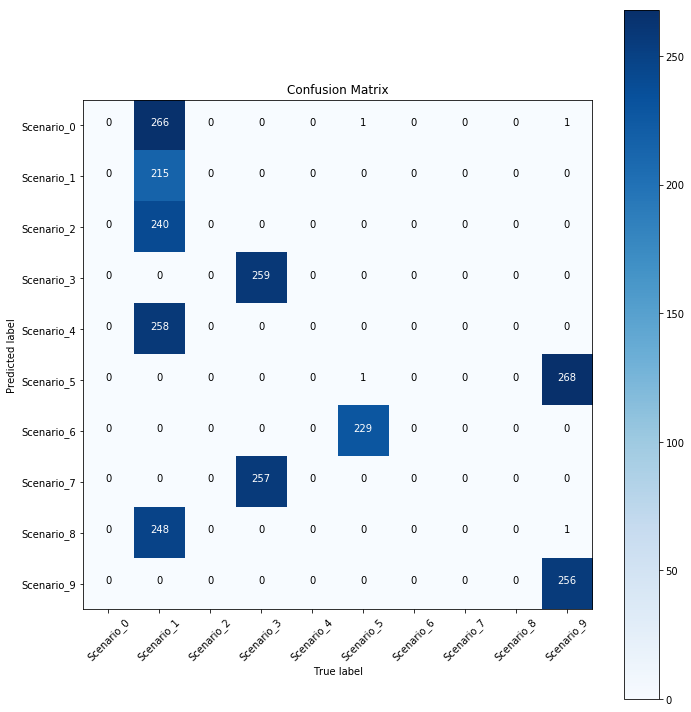

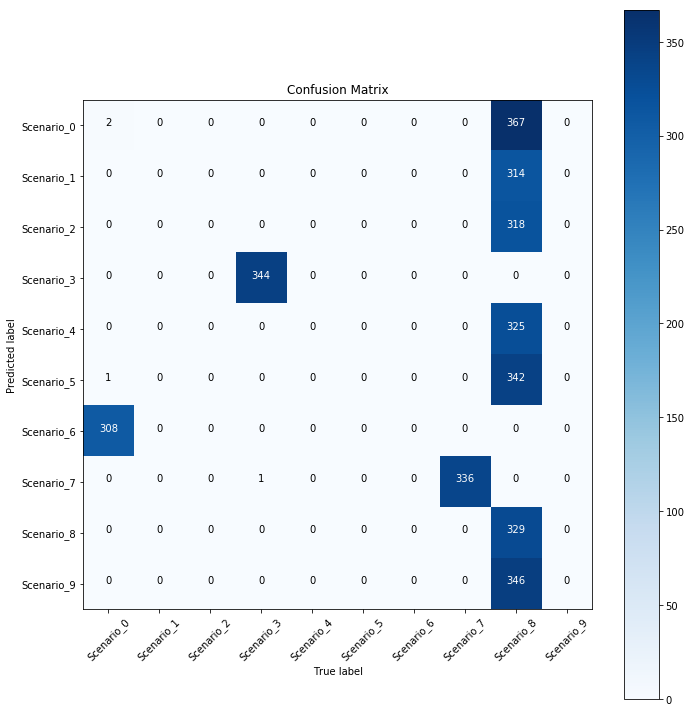

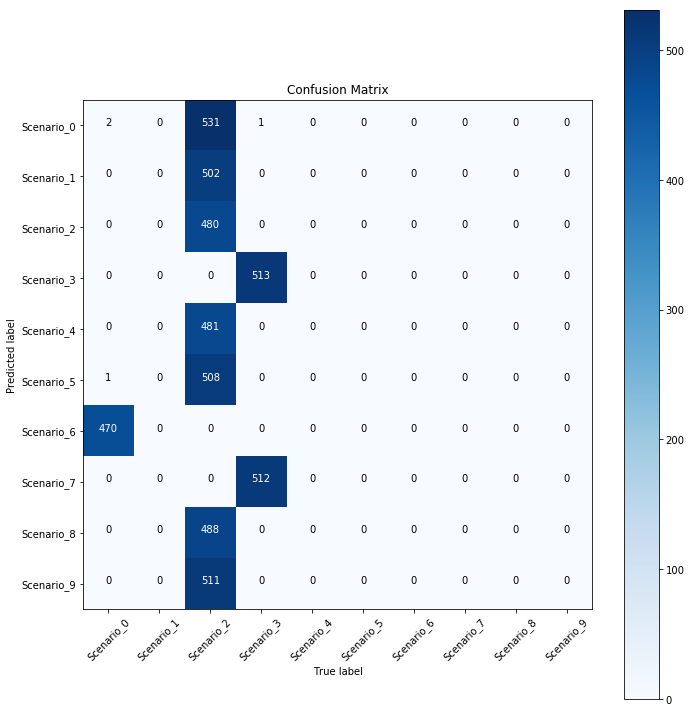

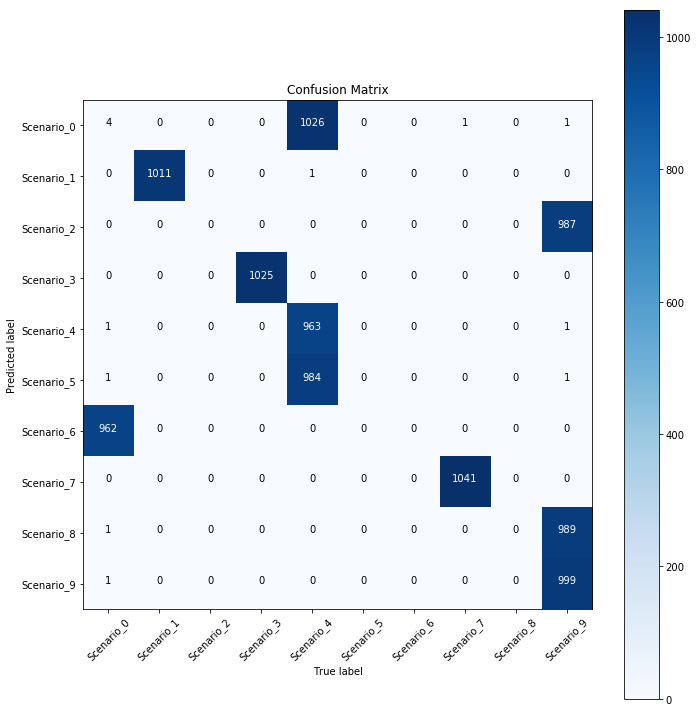

In [24]:
setup_dataset.compute_cm(y_test, abc_pred, [1])

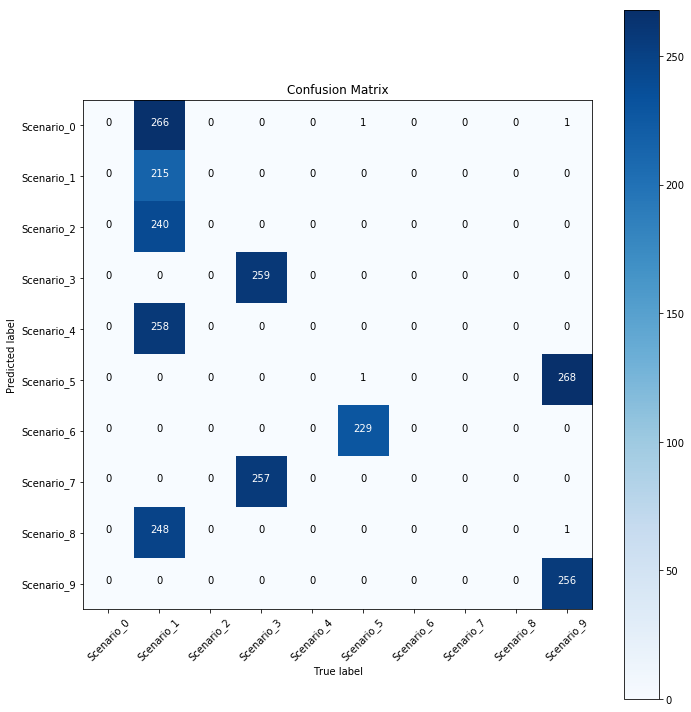

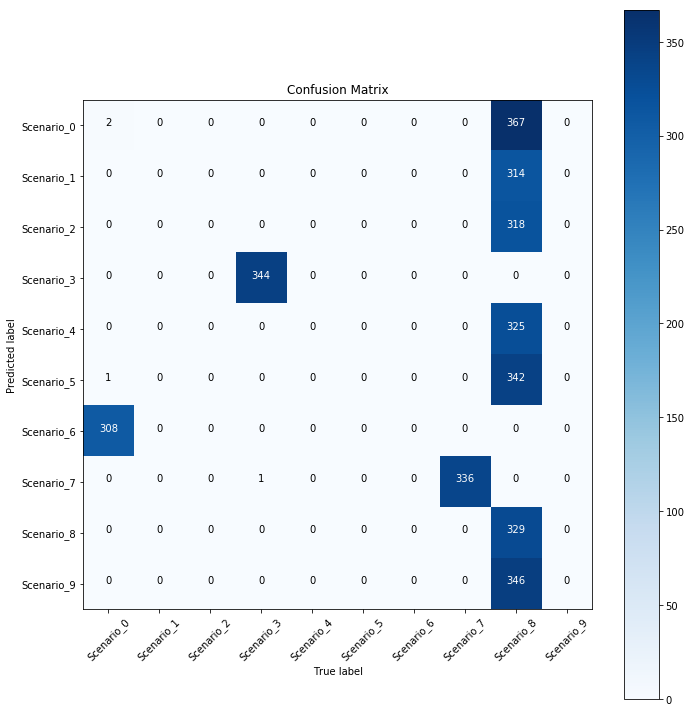

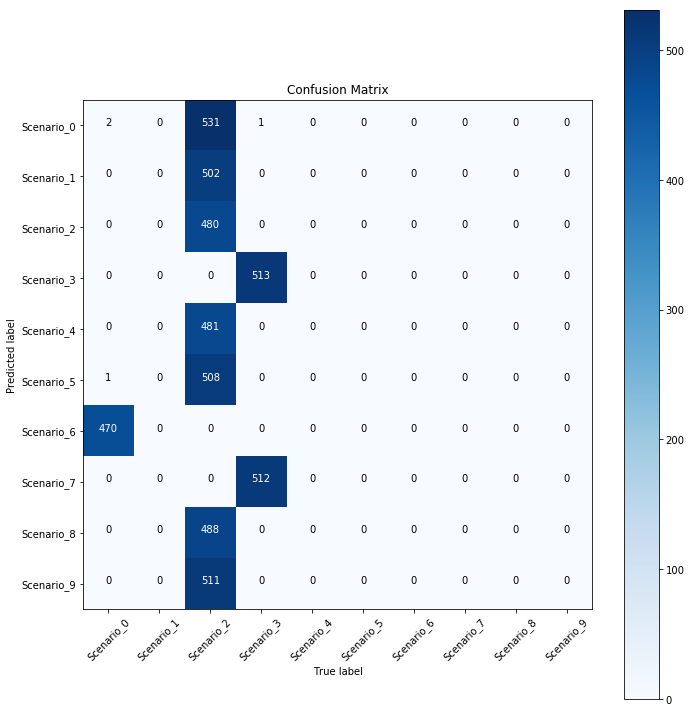

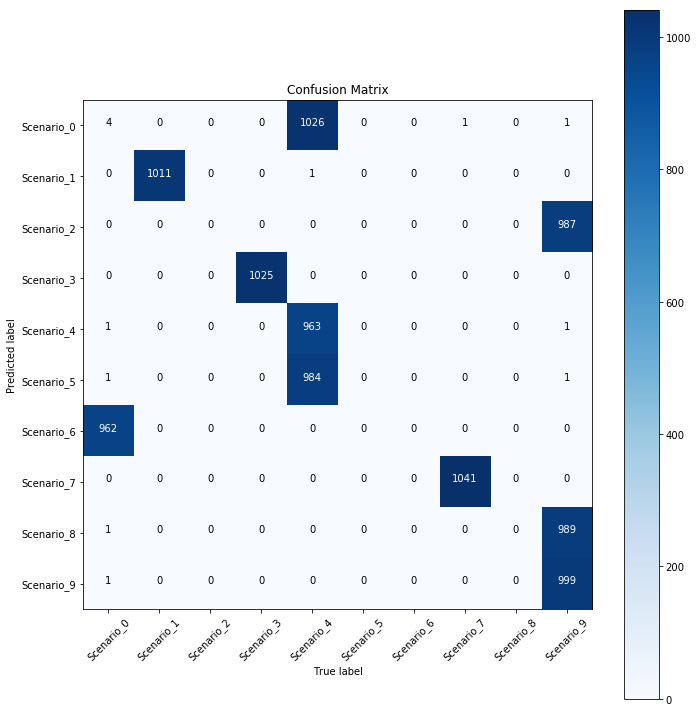

In [25]:
setup_dataset.compute_cm(y_test, abc_pred_scaled, [1])

In [26]:
qda_accs, qda_pred, qda_pred_times, qda_fit_times = \
setup_dataset.run_quadratic(X_train, X_test, y_train, y_test, (1,))

/home/cuervo/anaconda3/envs/thesis/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:695: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/cuervo/anaconda3/envs/thesis/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:720: RuntimeWarning: overflow encountered in square
  norm2.append(np.sum(X2 ** 2, 1))
/home/cuervo/anaconda3/envs/thesis/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:719: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/home/cuervo/anaconda3/envs/thesis/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:722: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])


In [27]:
qda_accs_scaled, qda_pred_scaled, qda_pred_times_scaled, qda_fit_times_scaled = \
setup_dataset.run_quadratic(X_train_scaled, X_test_scaled, y_train, y_test, (1,))

/home/cuervo/anaconda3/envs/thesis/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:695: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


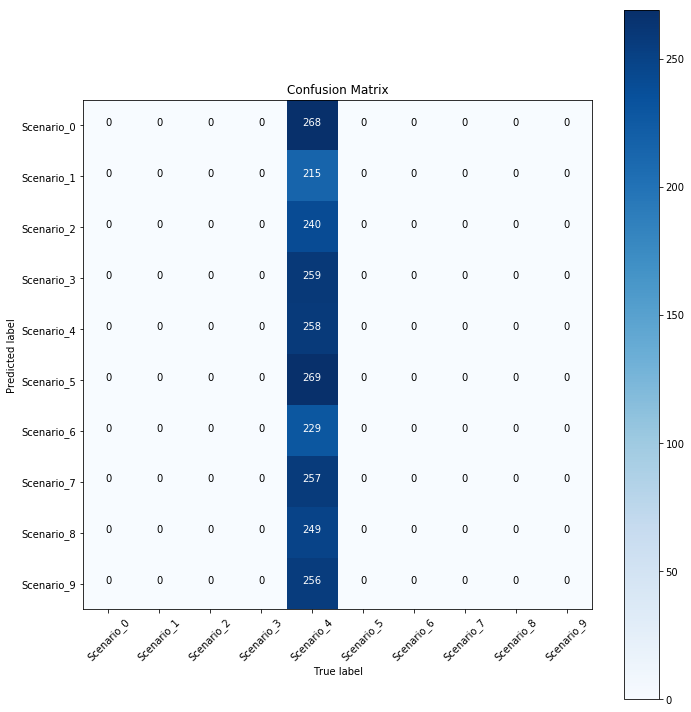

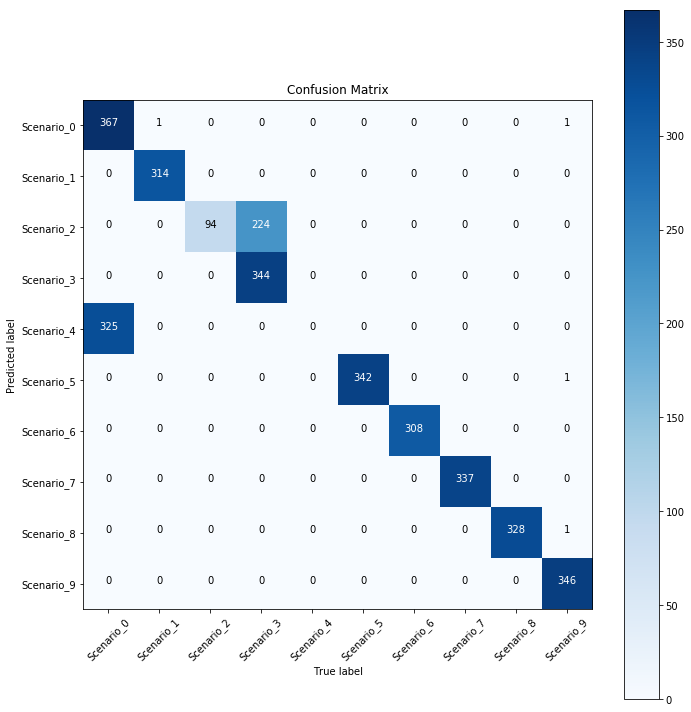

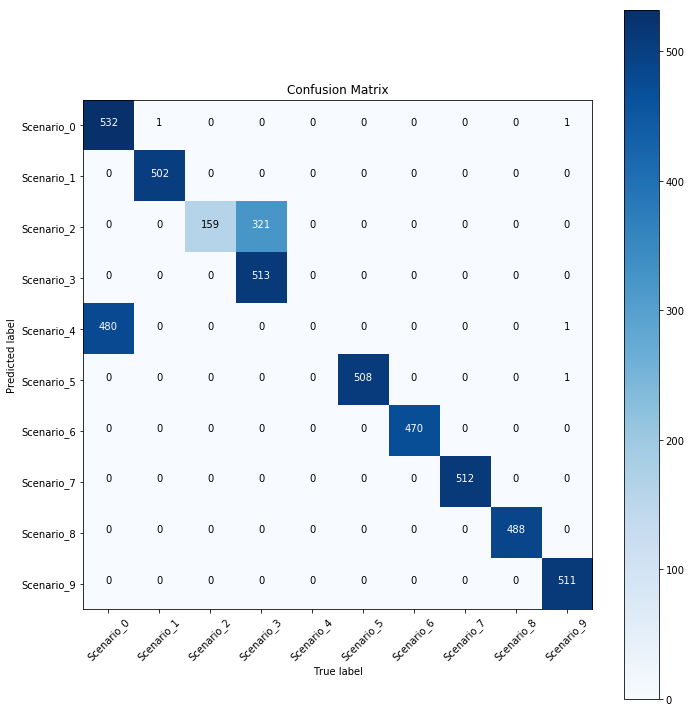

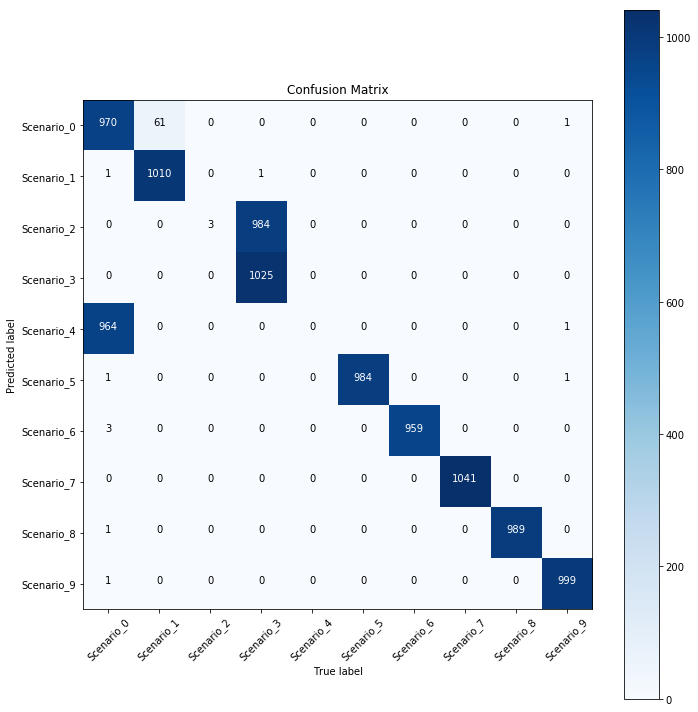

In [28]:
setup_dataset.compute_cm(y_test, qda_pred, [1])

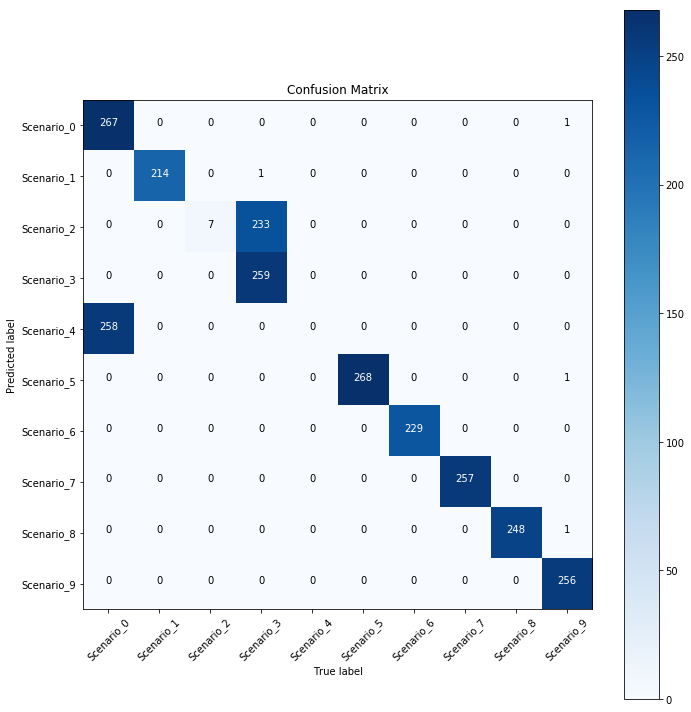

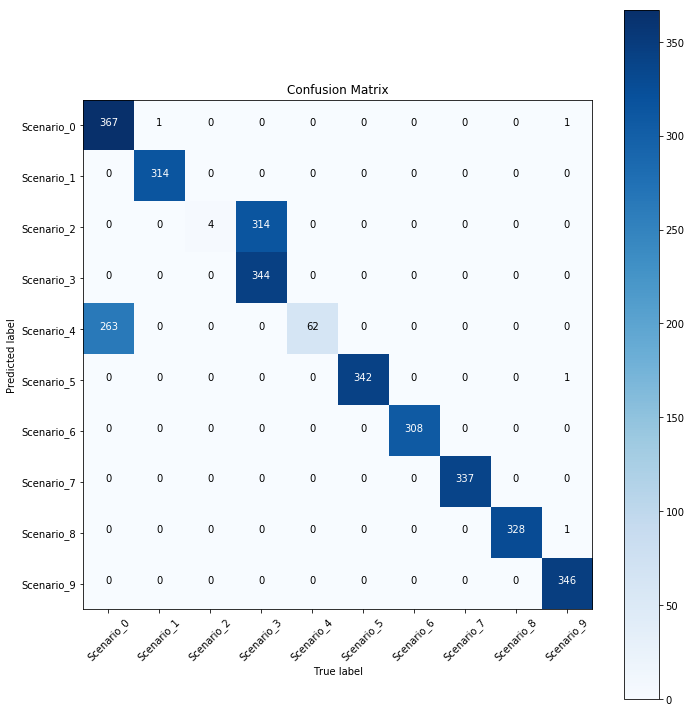

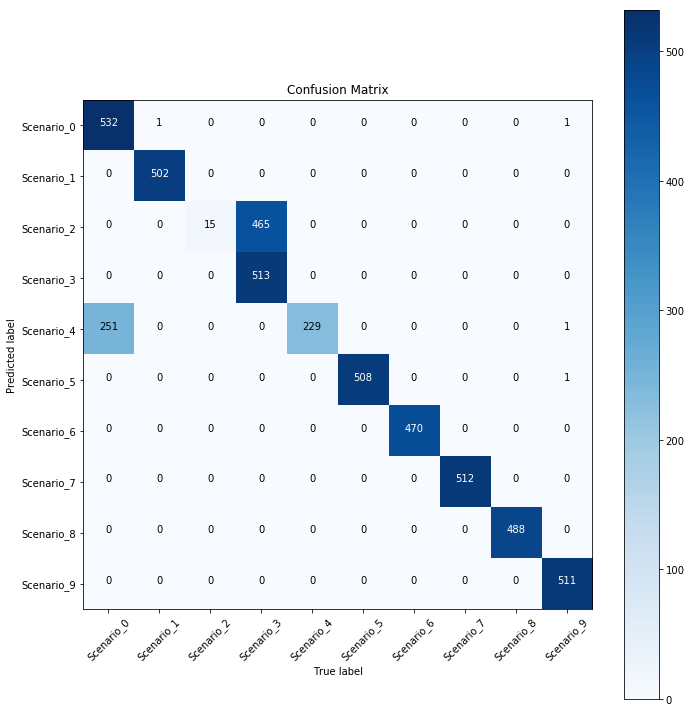

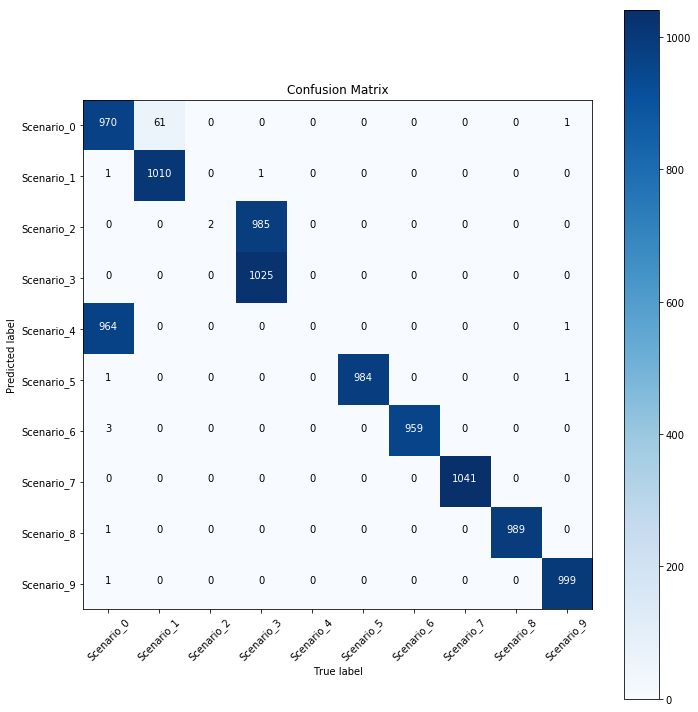

In [29]:
setup_dataset.compute_cm(y_test, qda_pred_scaled, [1])

In [30]:
dtc_accs, dtc_pred, dtc_pred_times, dtc_fit_times = \
setup_dataset.run_decision_tree(X_train, X_test, y_train, y_test, dtc_c)

In [31]:
dtc_accs_scaled, dtc_pred_scaled, dtc_pred_times_scaled, dtc_fit_times_scaled = \
setup_dataset.run_decision_tree(X_train_scaled, X_test_scaled, y_train, y_test, dtc_c)

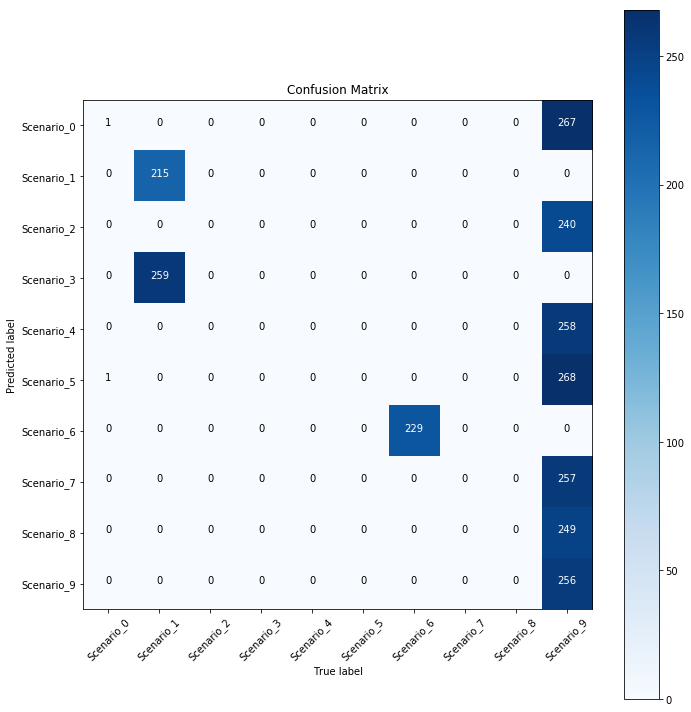

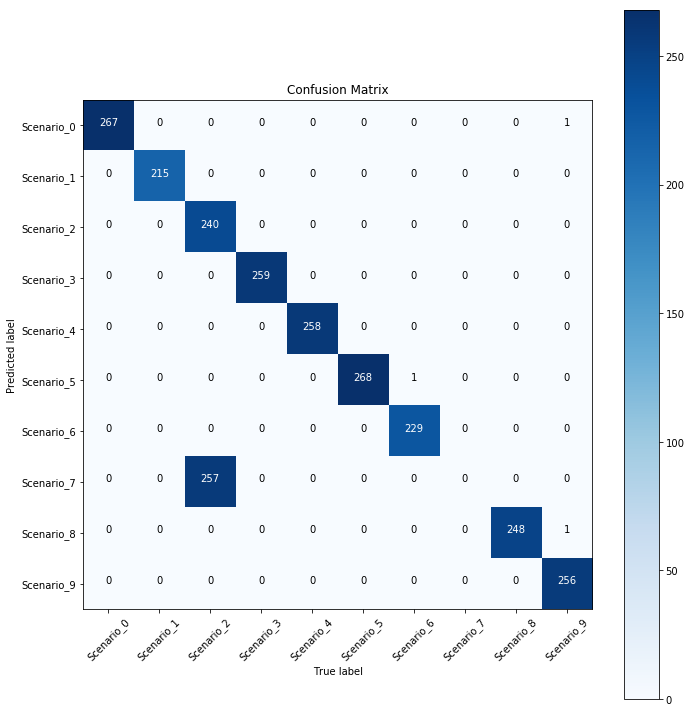

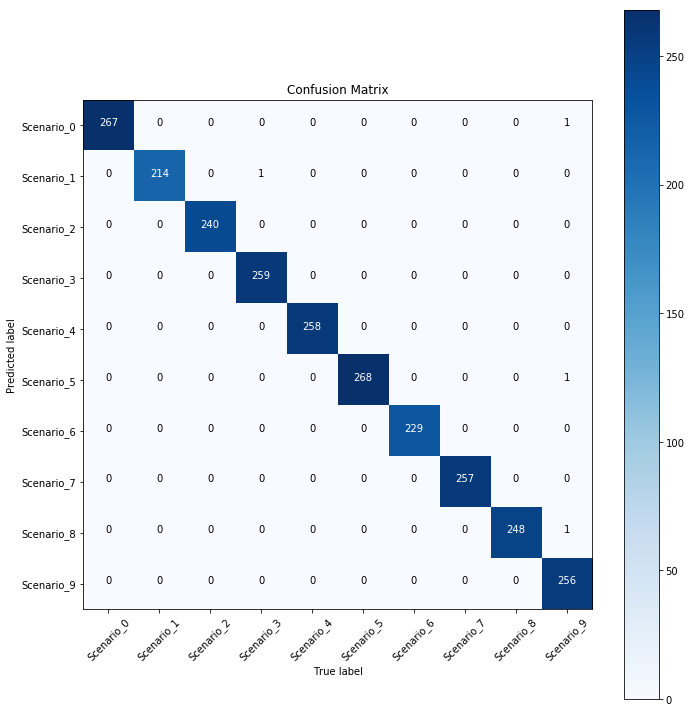

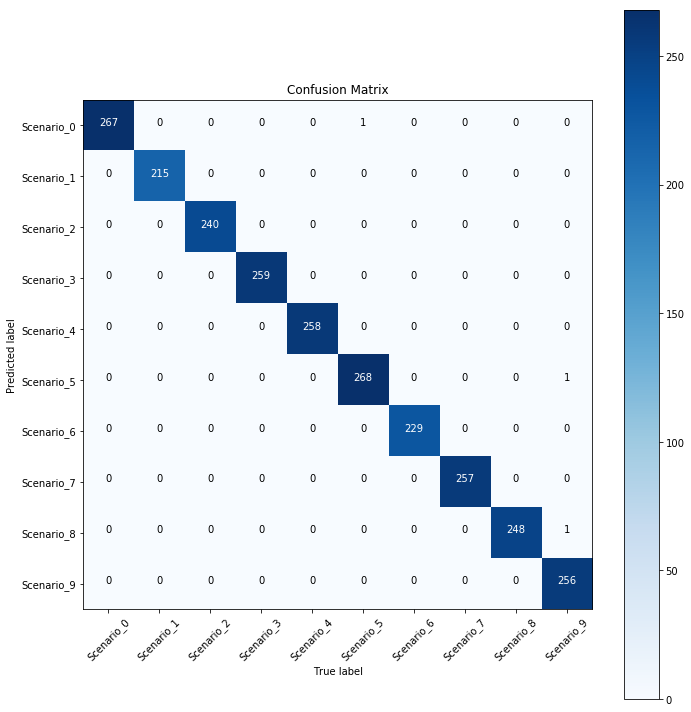

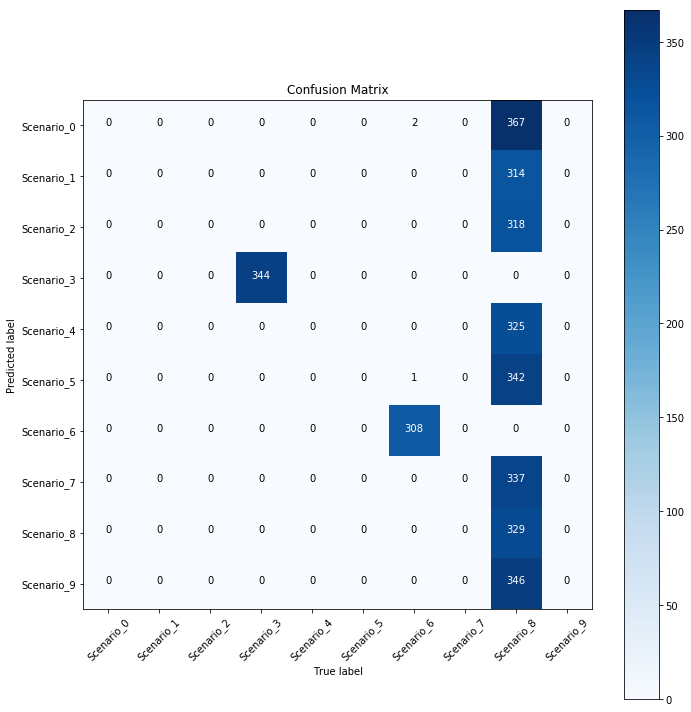

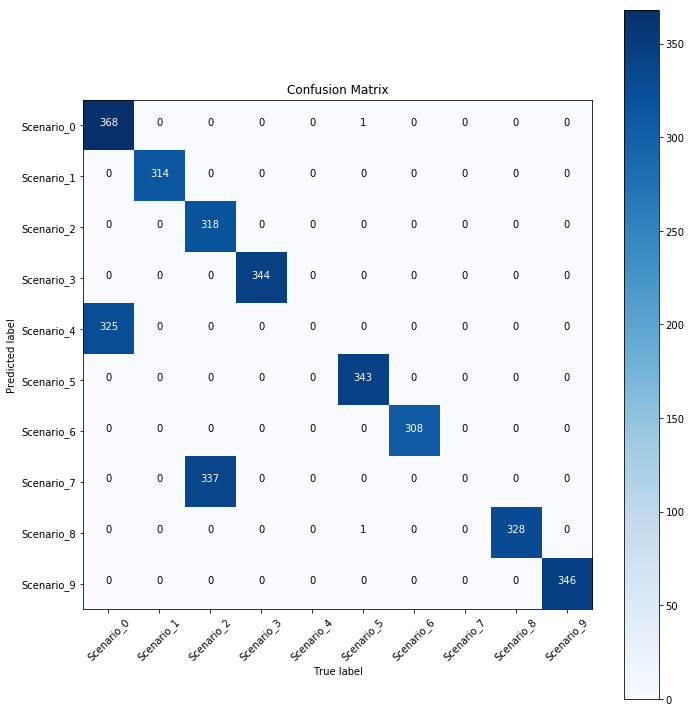

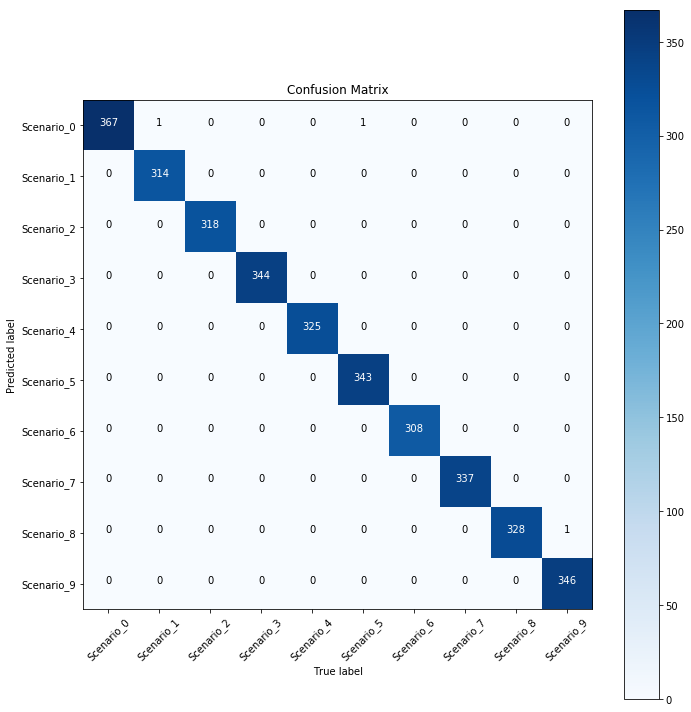

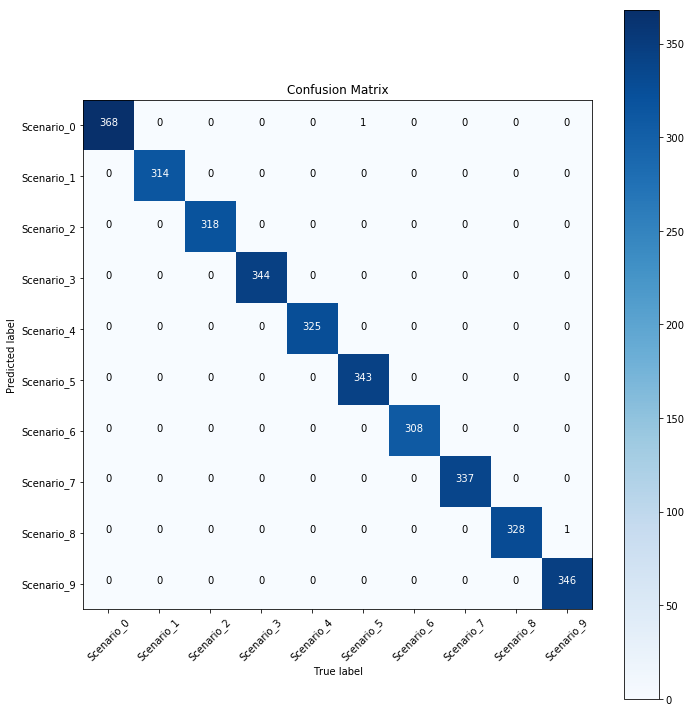

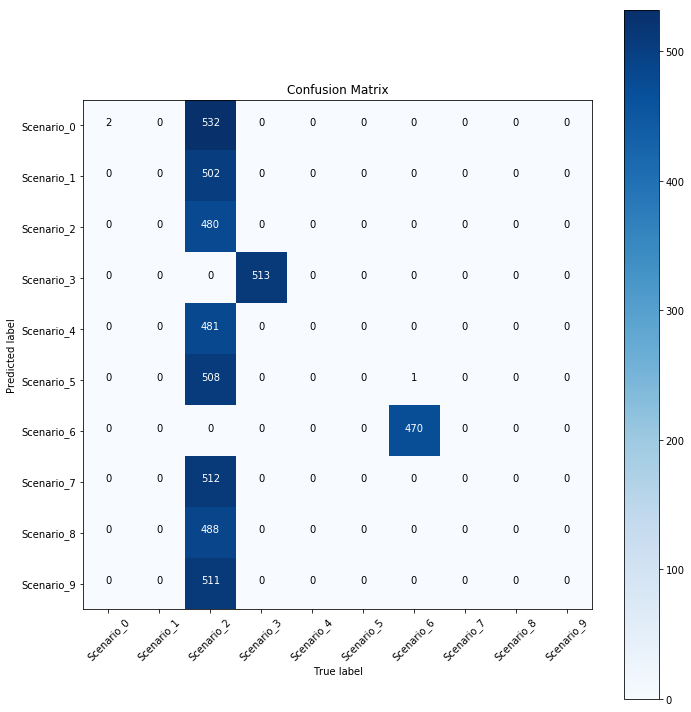

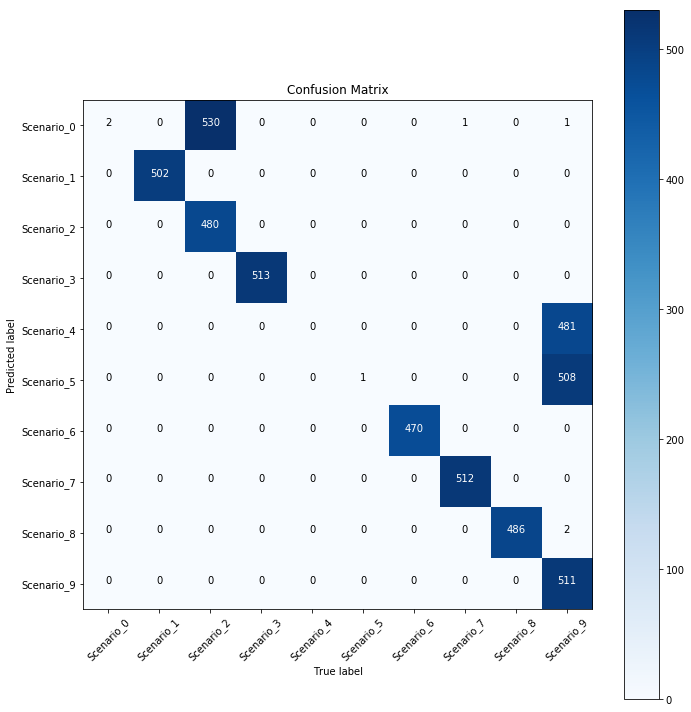

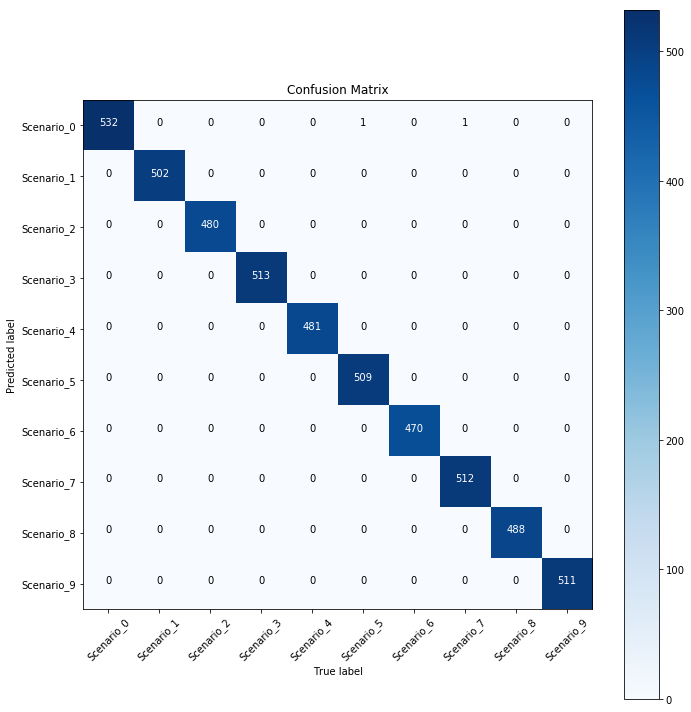

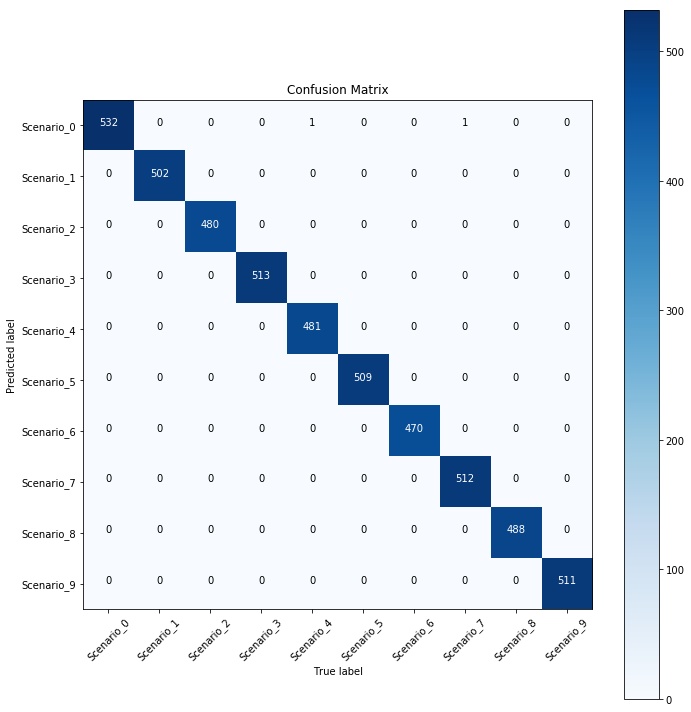

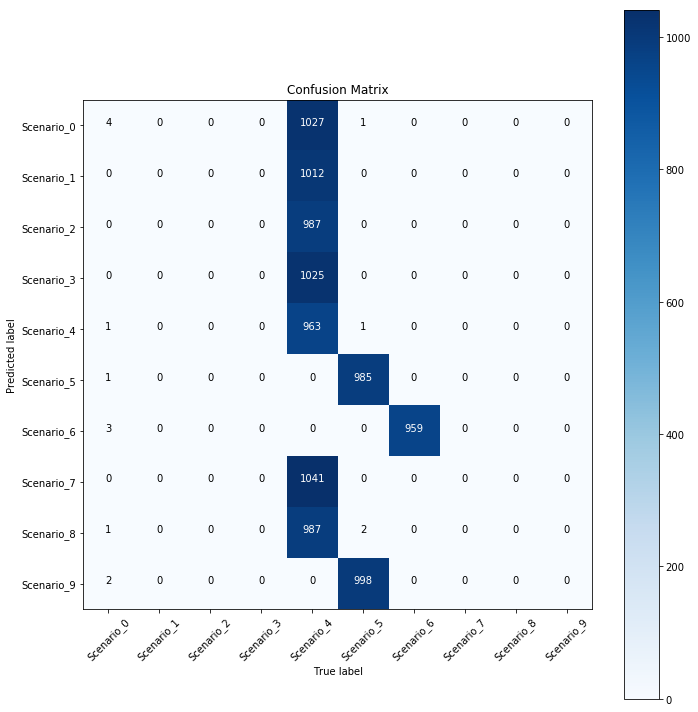

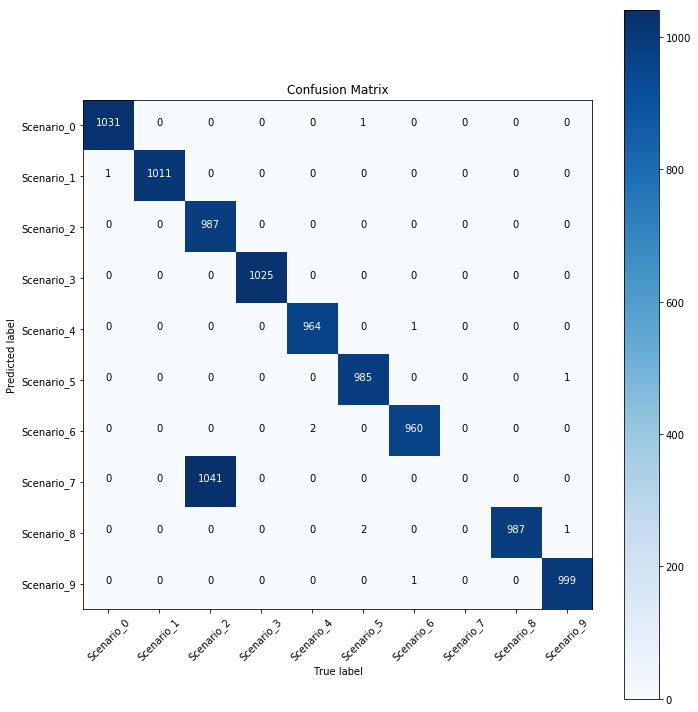

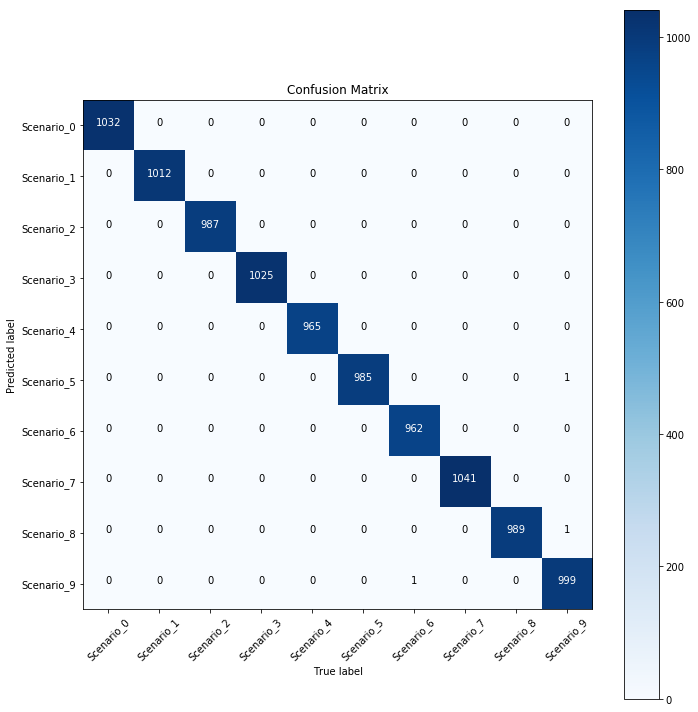

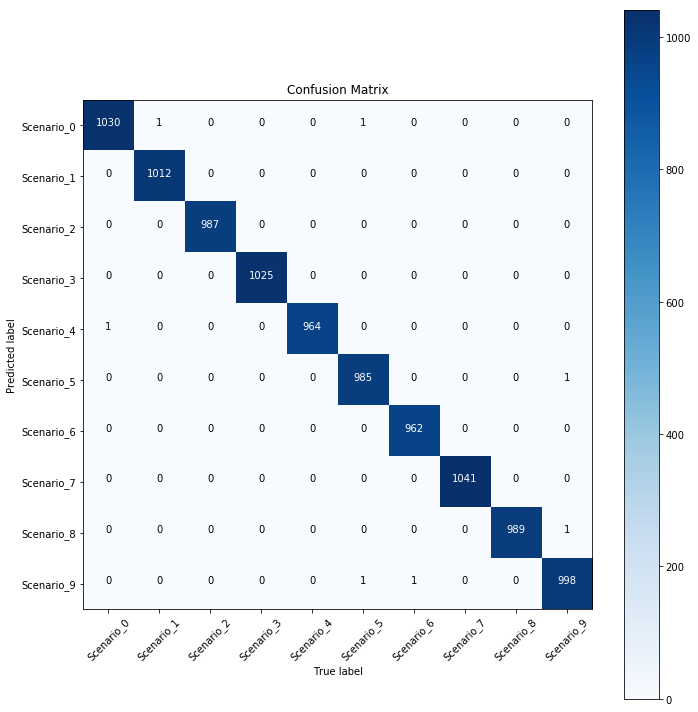

In [32]:
setup_dataset.compute_cm(y_test, dtc_pred, dtc_c)

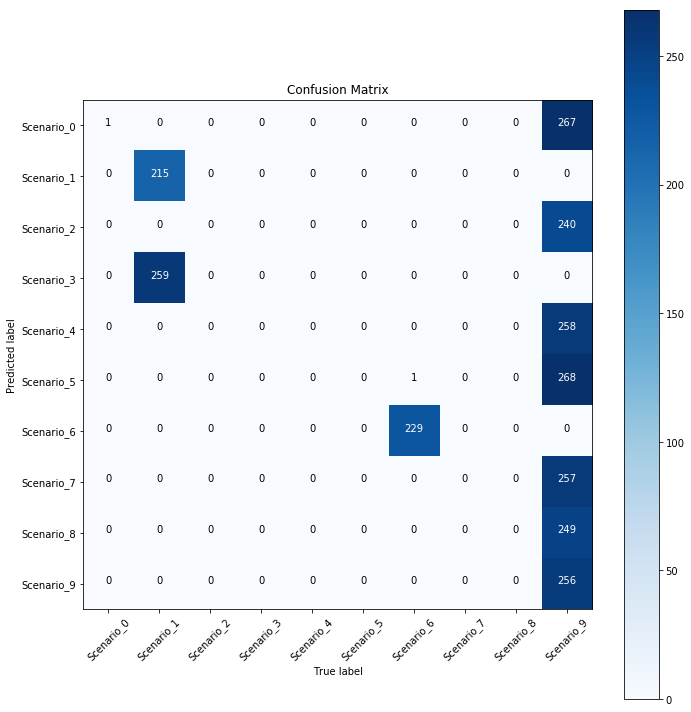

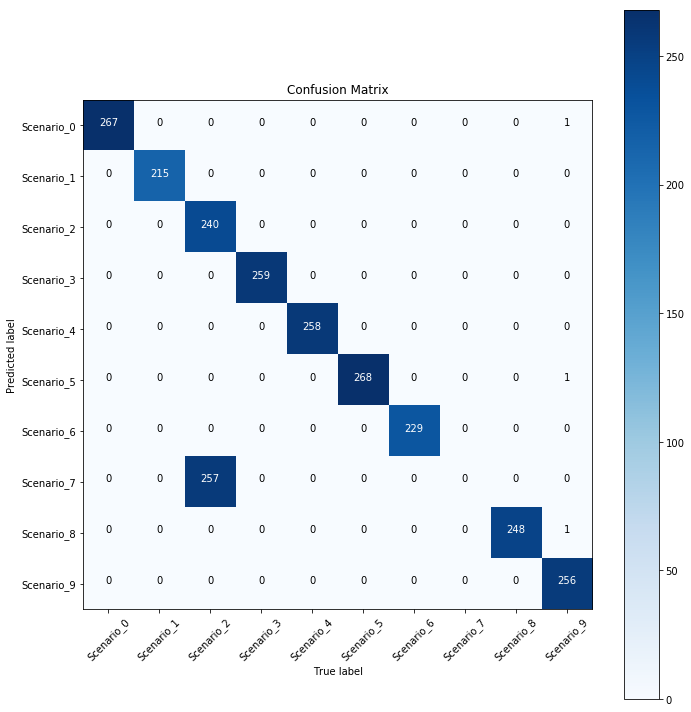

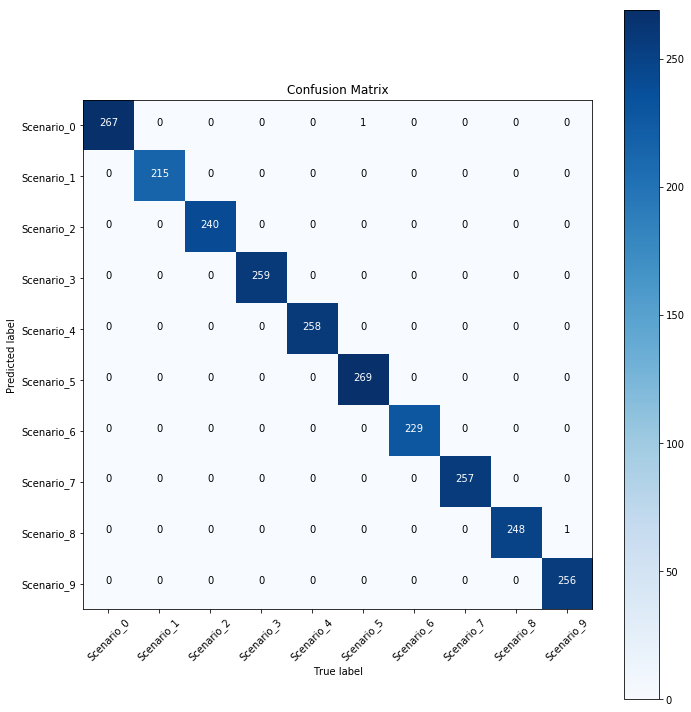

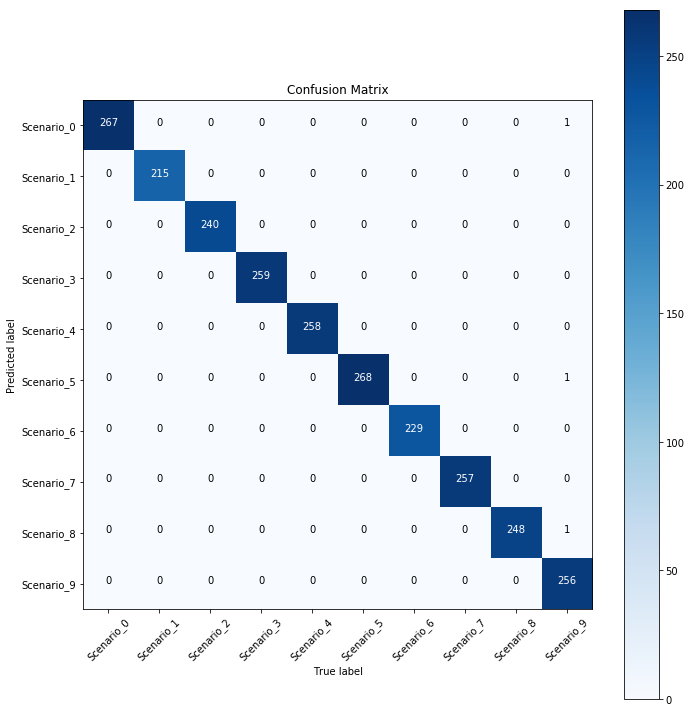

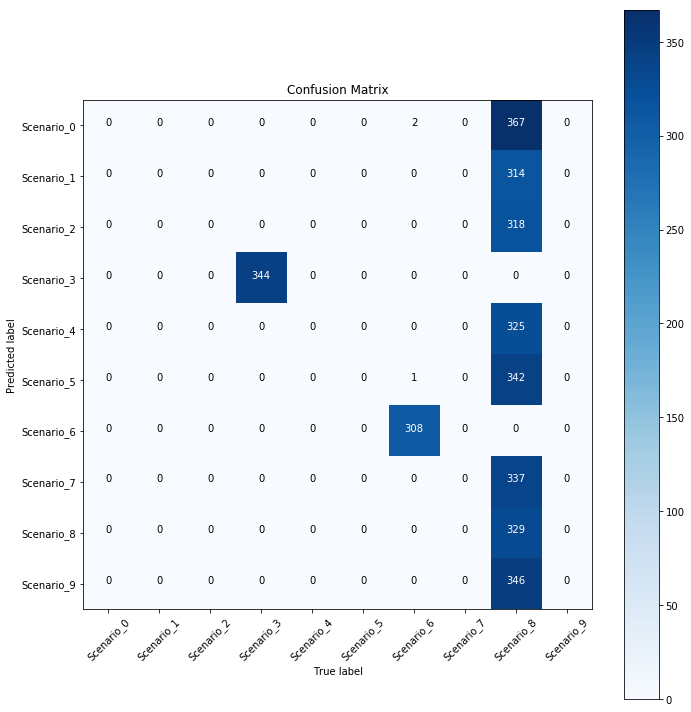

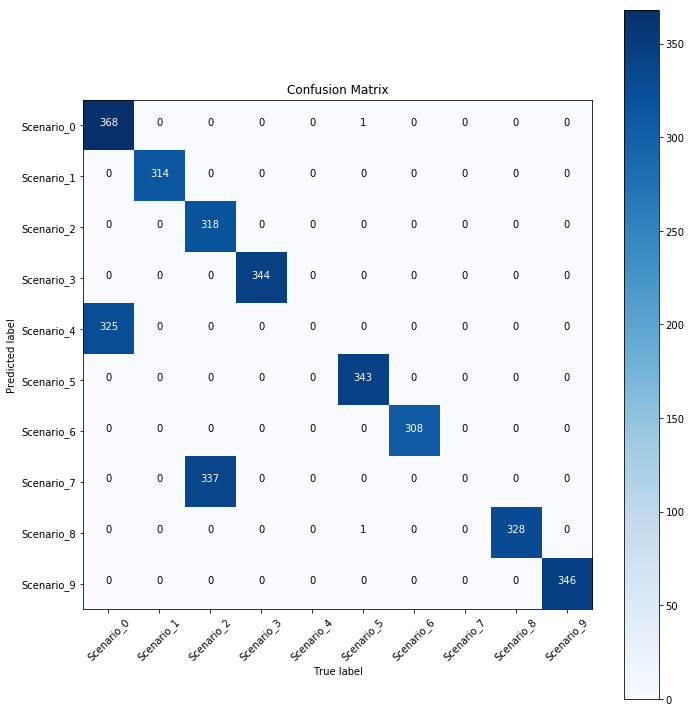

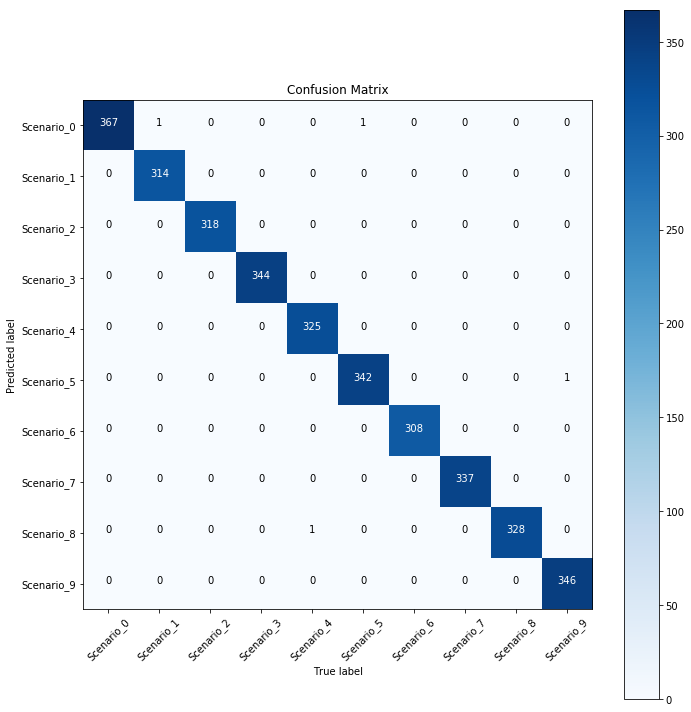

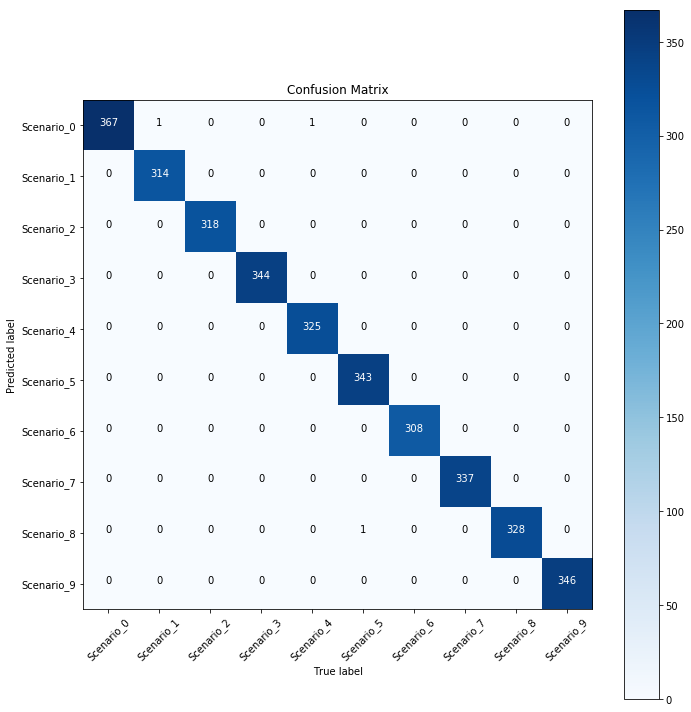

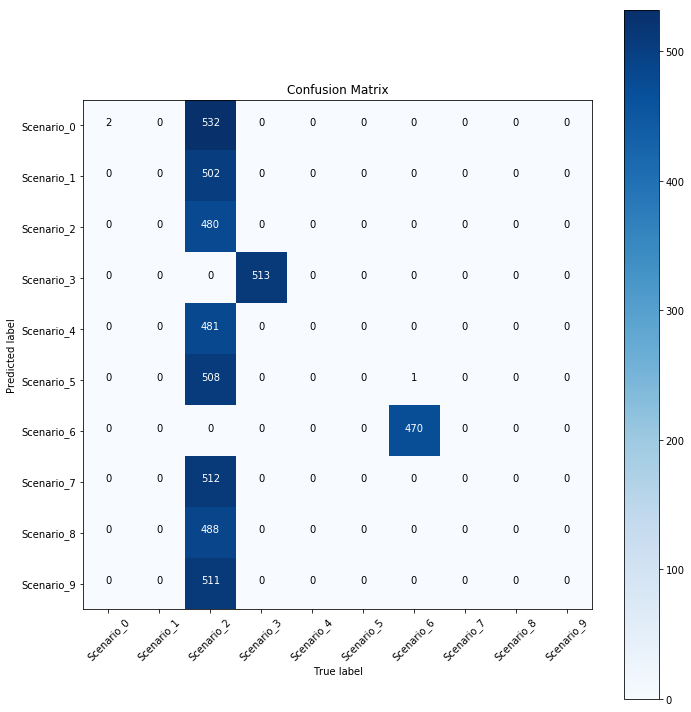

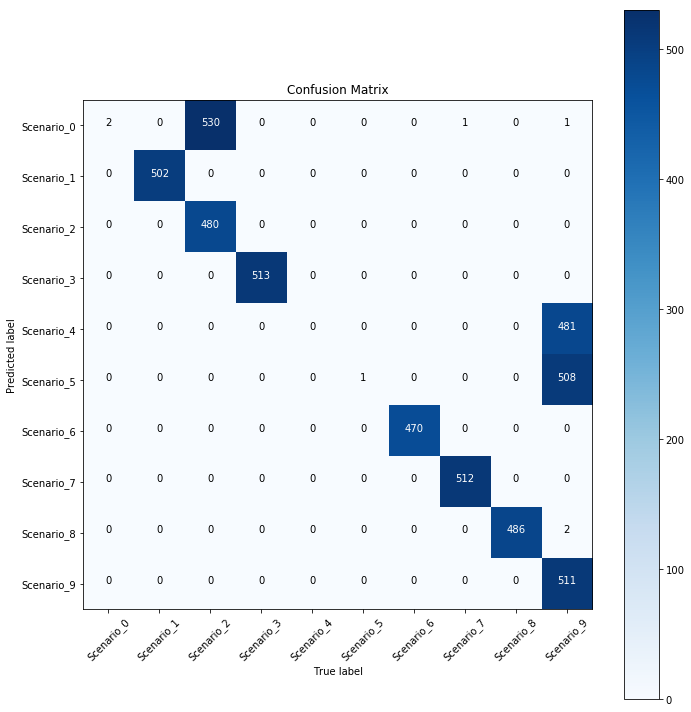

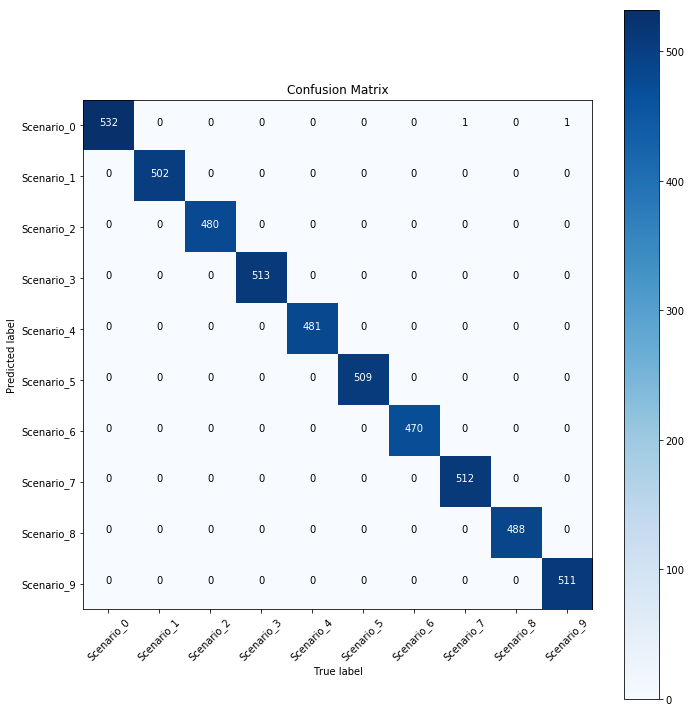

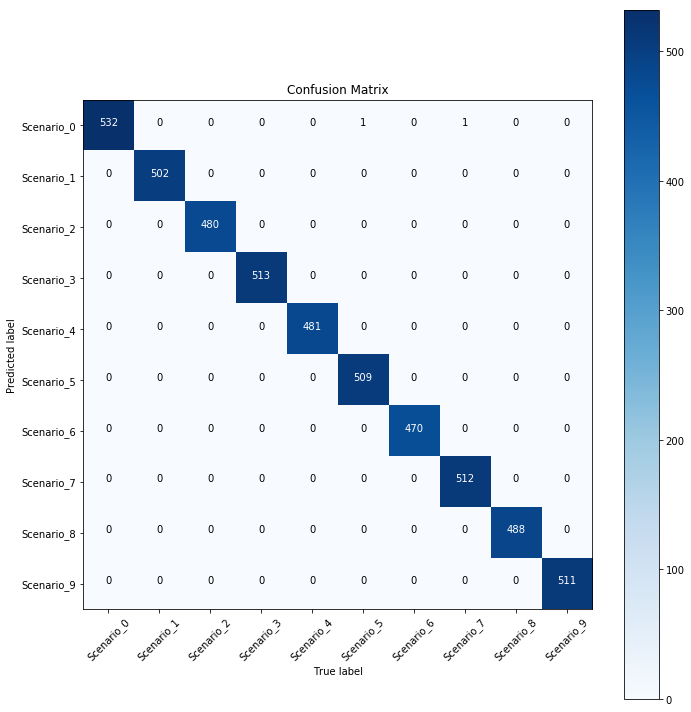

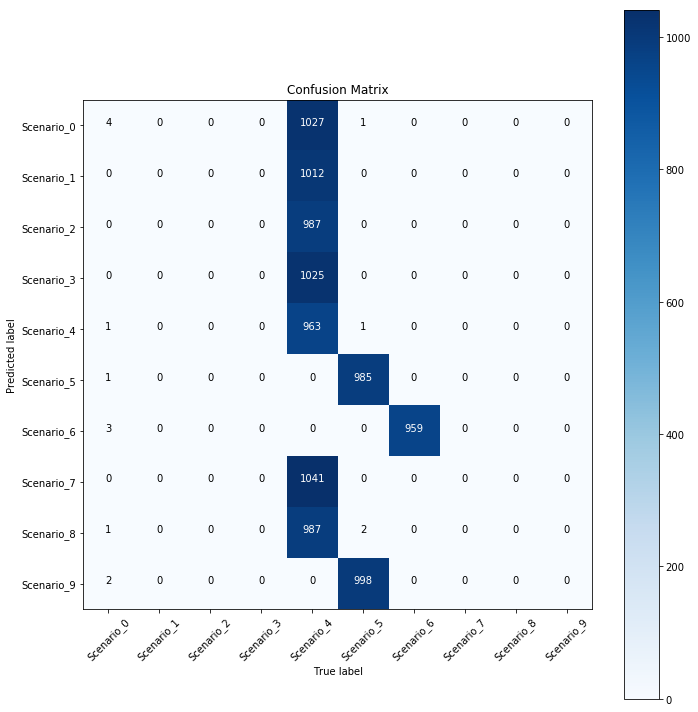

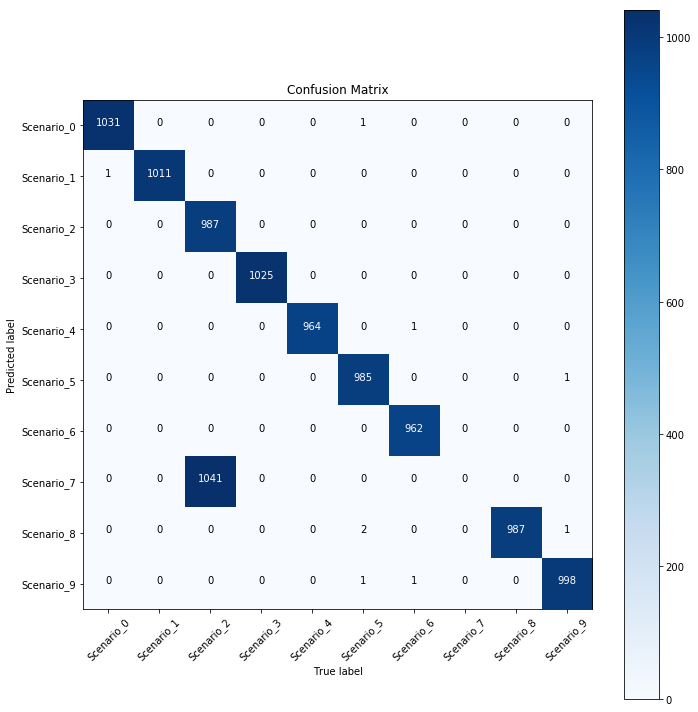

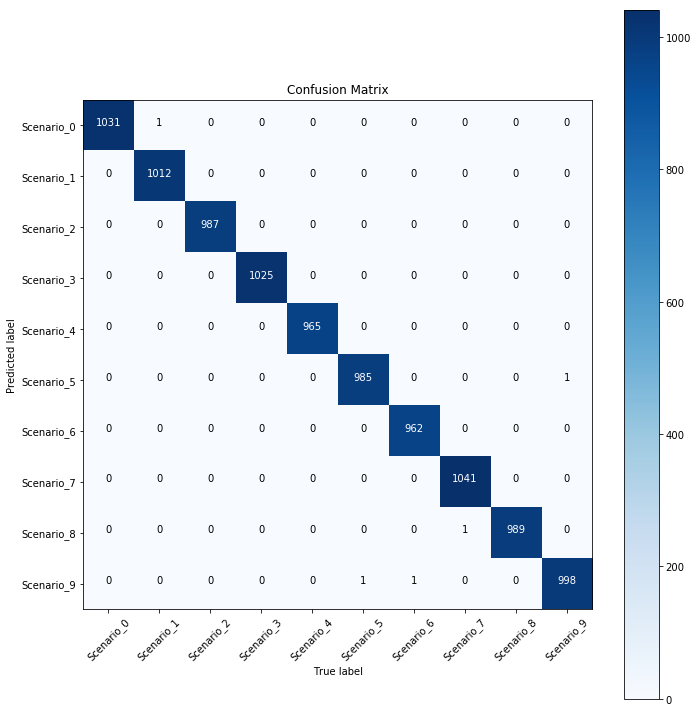

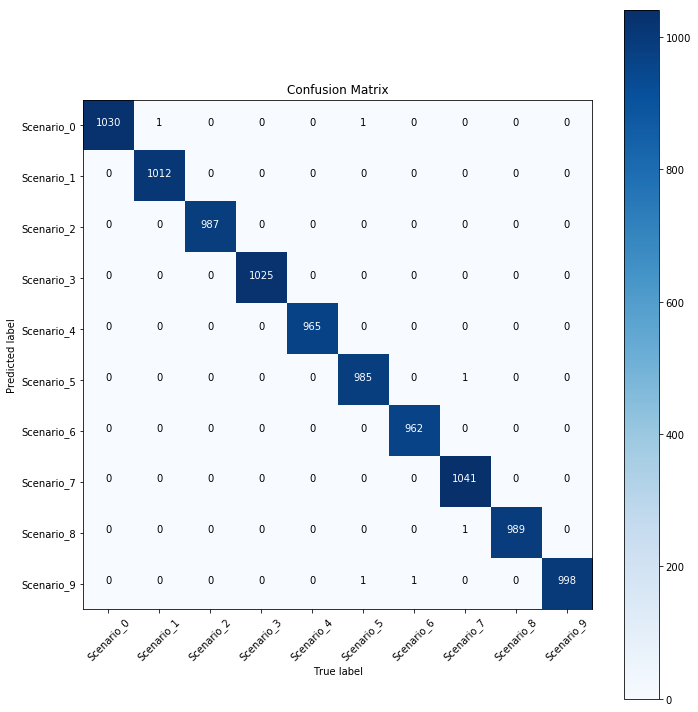

In [33]:
setup_dataset.compute_cm(y_test, dtc_pred_scaled, dtc_c)

In [34]:
svc_accs, svc_pred, svc_pred_times, svc_fit_times = \
setup_dataset.run_svc(X_train, X_test, y_train, y_test, svc_c)

In [35]:
svc_accs_scaled, svc_pred_scaled, svc_pred_times_scaled, svc_fit_times_scaled = \
setup_dataset.run_svc(X_train_scaled, X_test_scaled, y_train, y_test, svc_c)

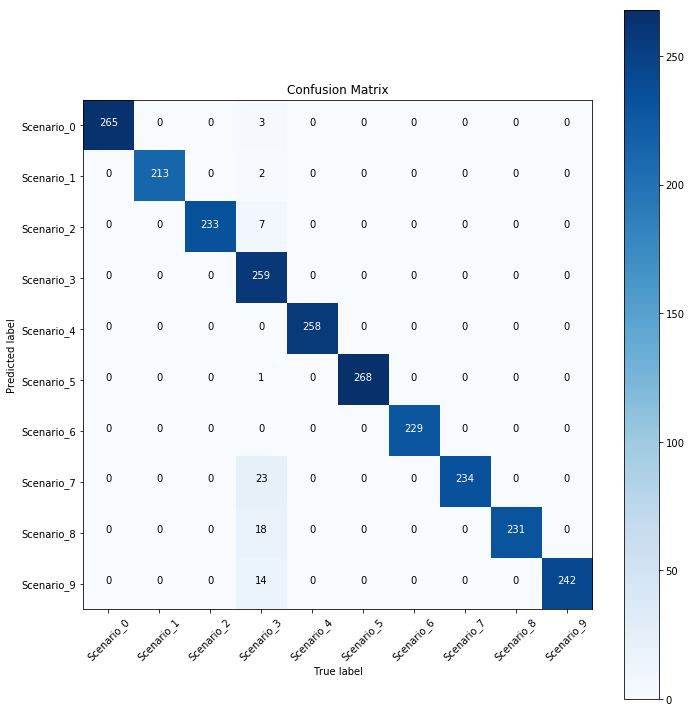

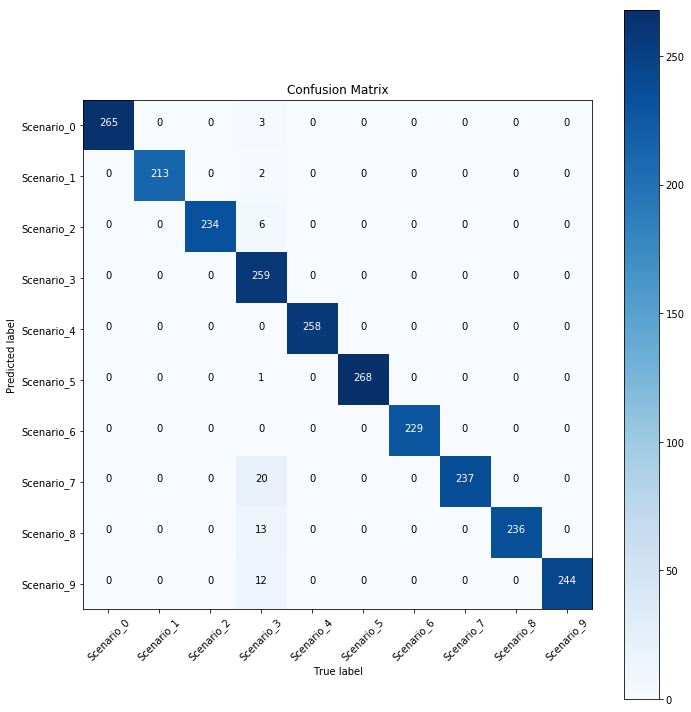

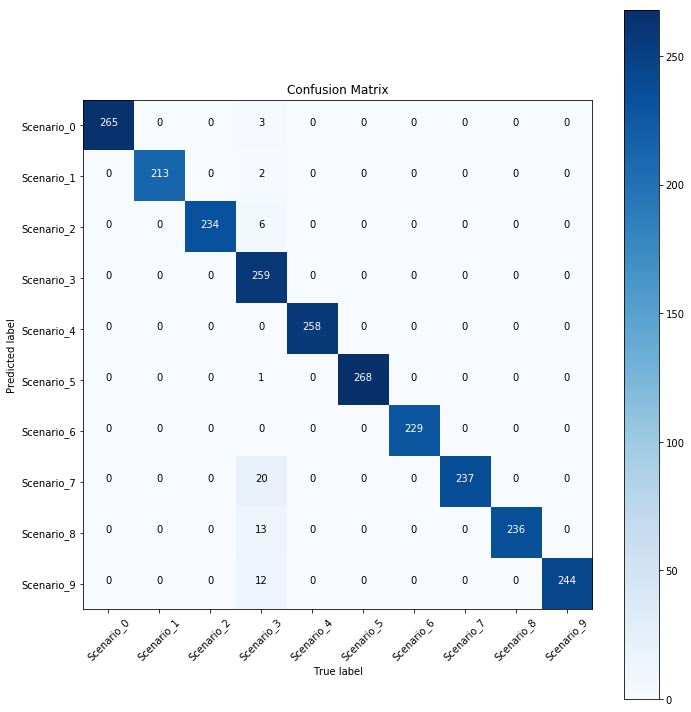

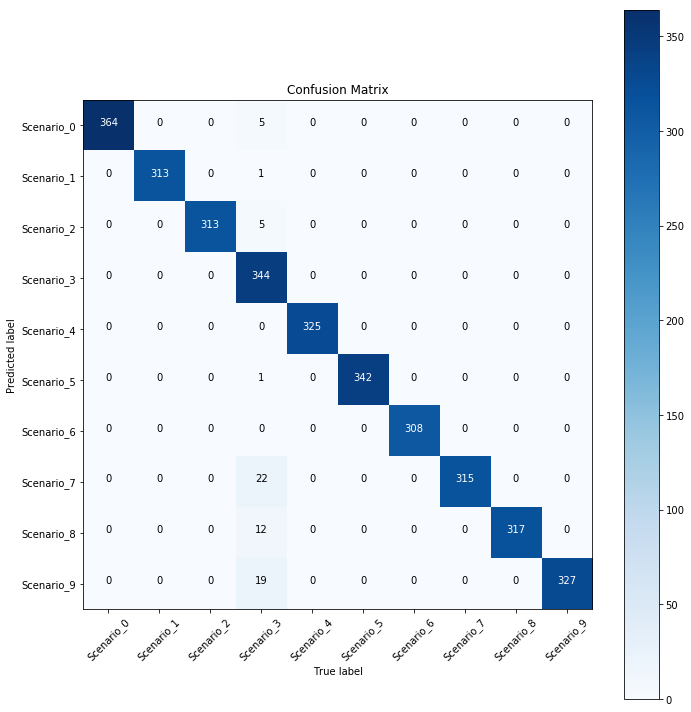

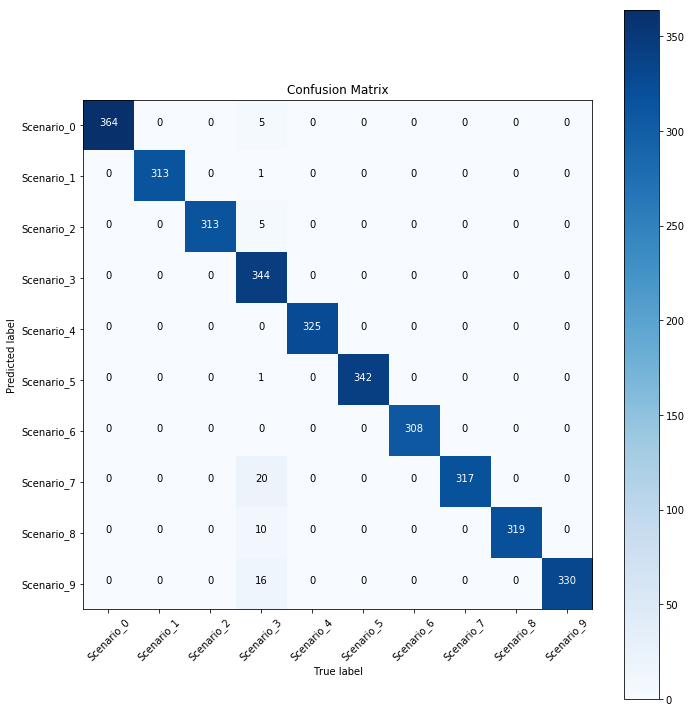

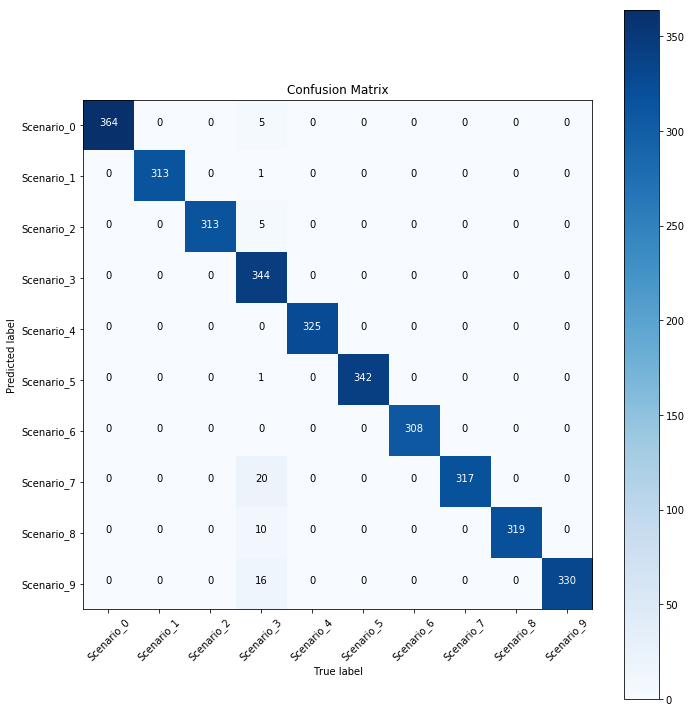

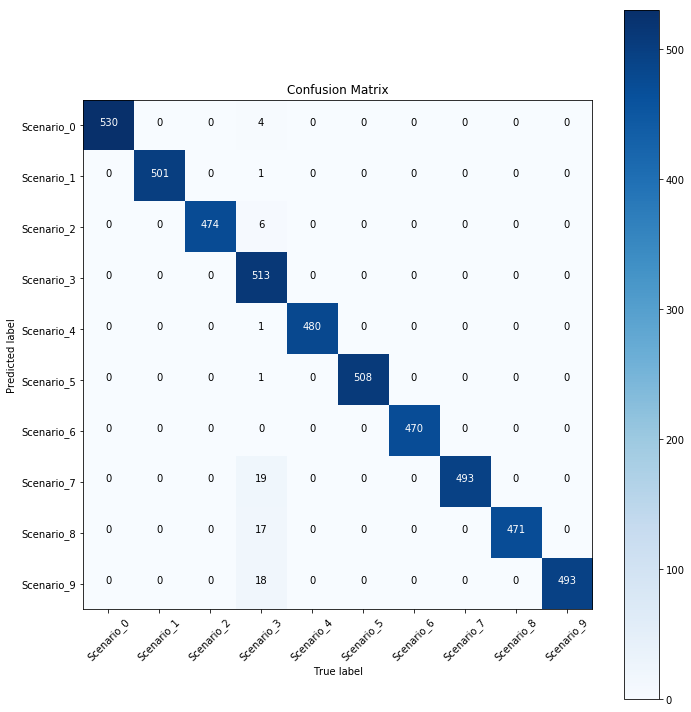

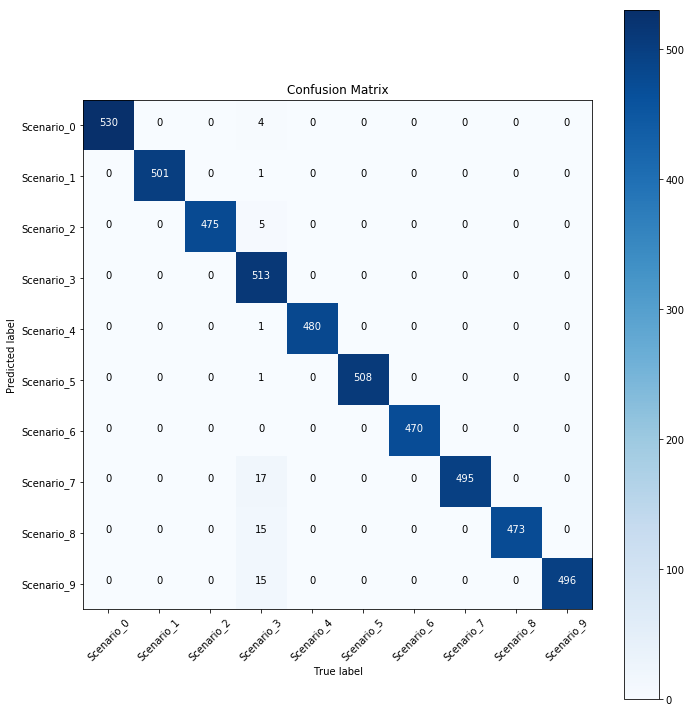

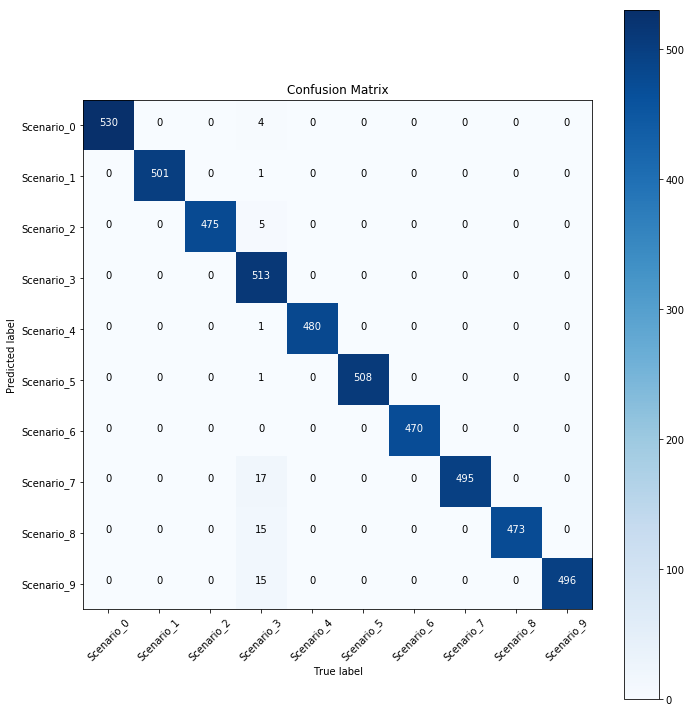

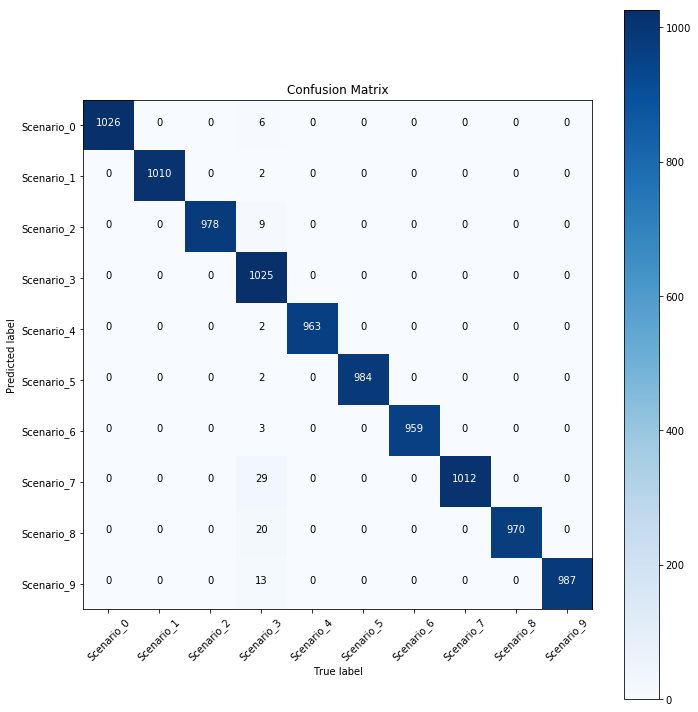

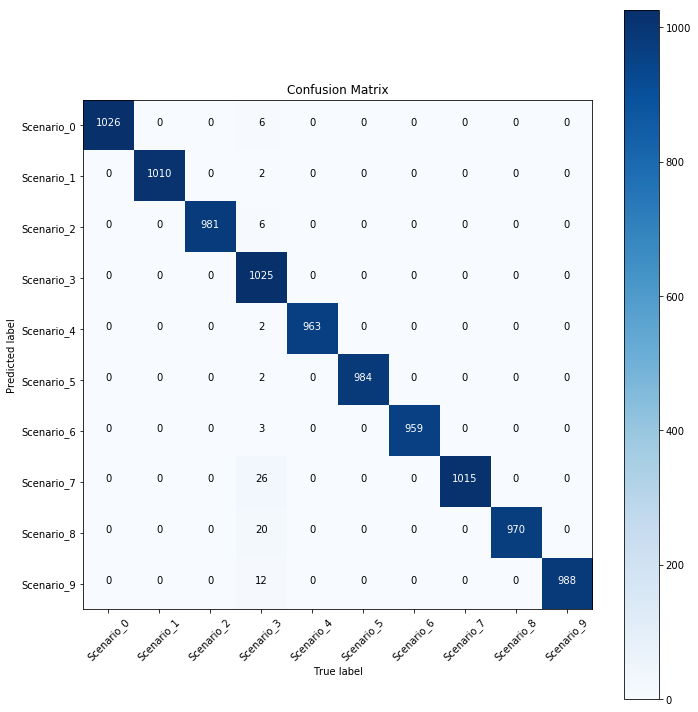

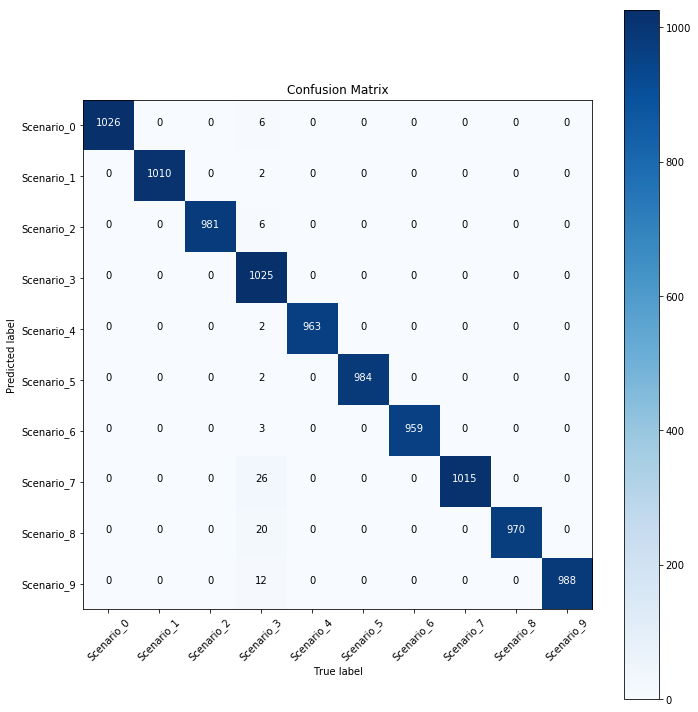

In [36]:
setup_dataset.compute_cm(y_test, svc_pred, svc_c)

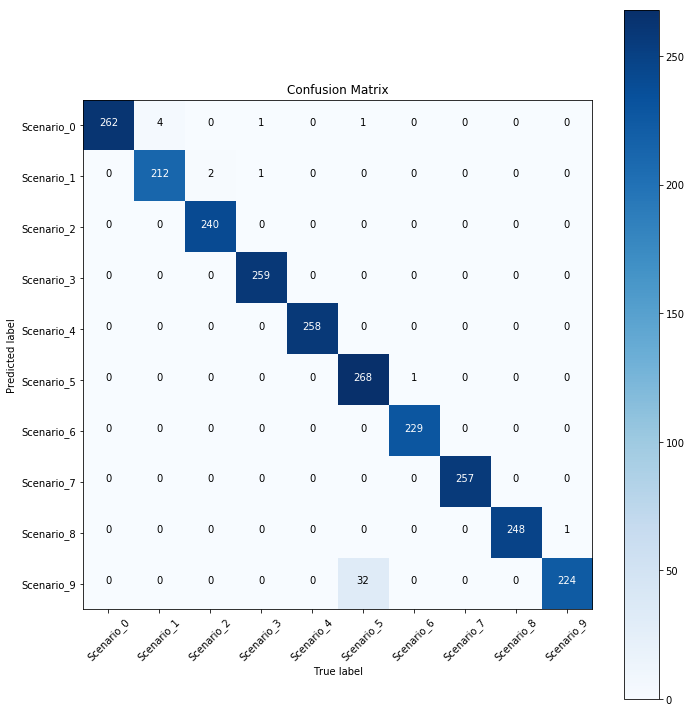

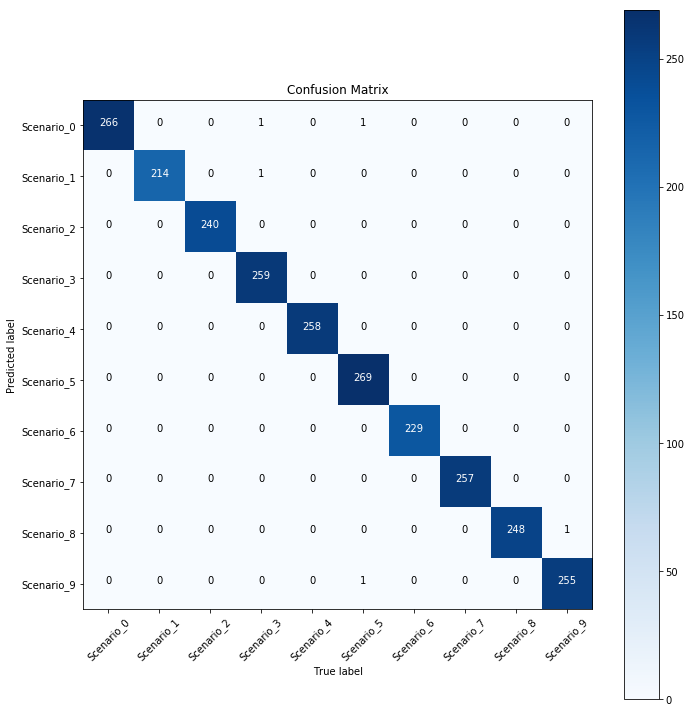

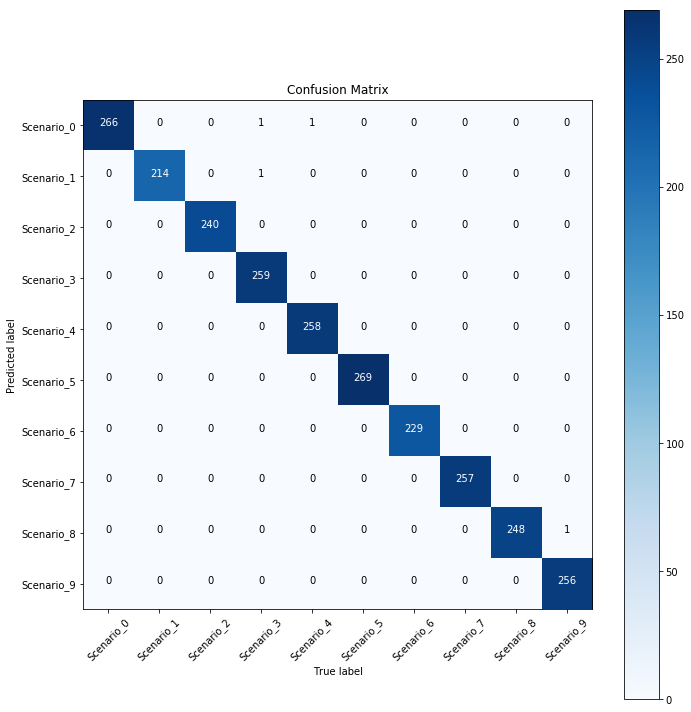

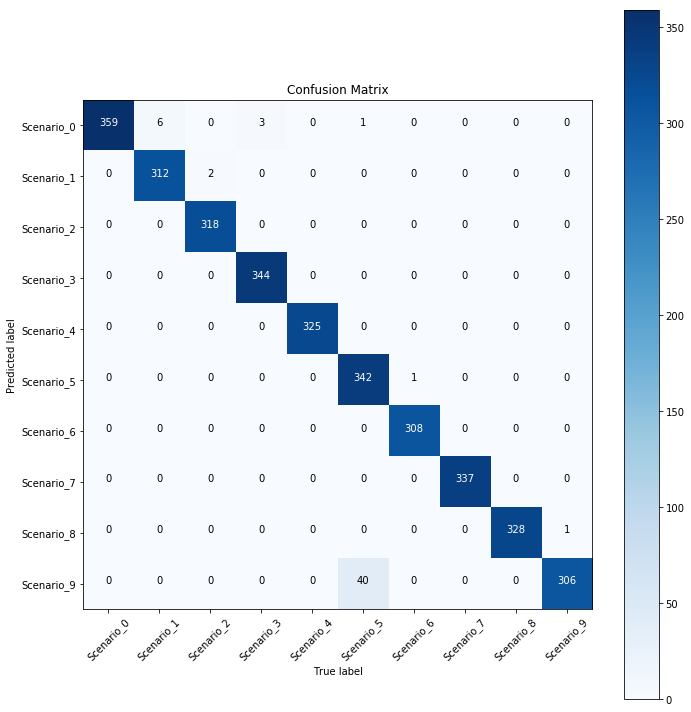

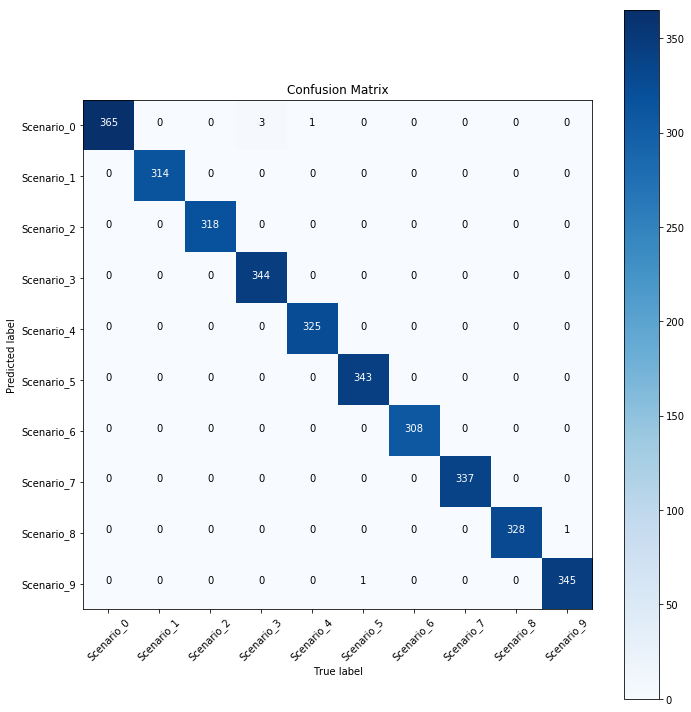

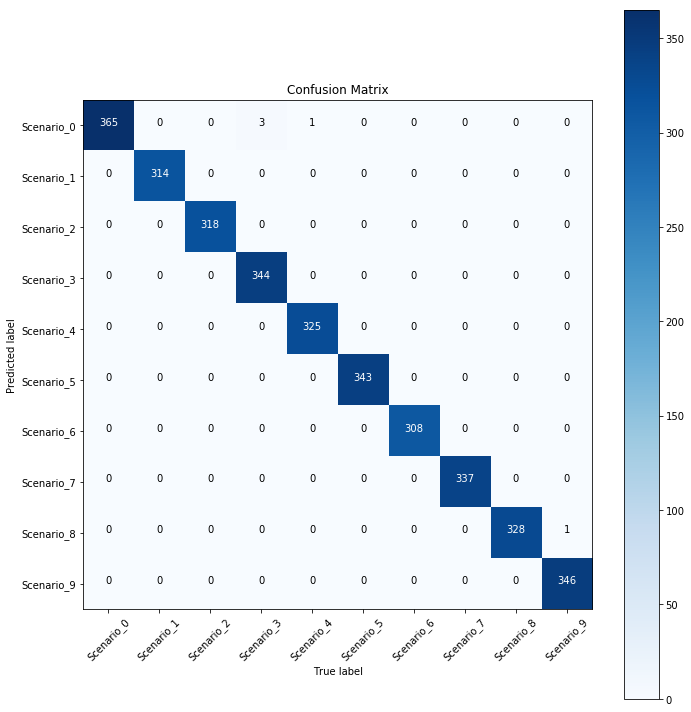

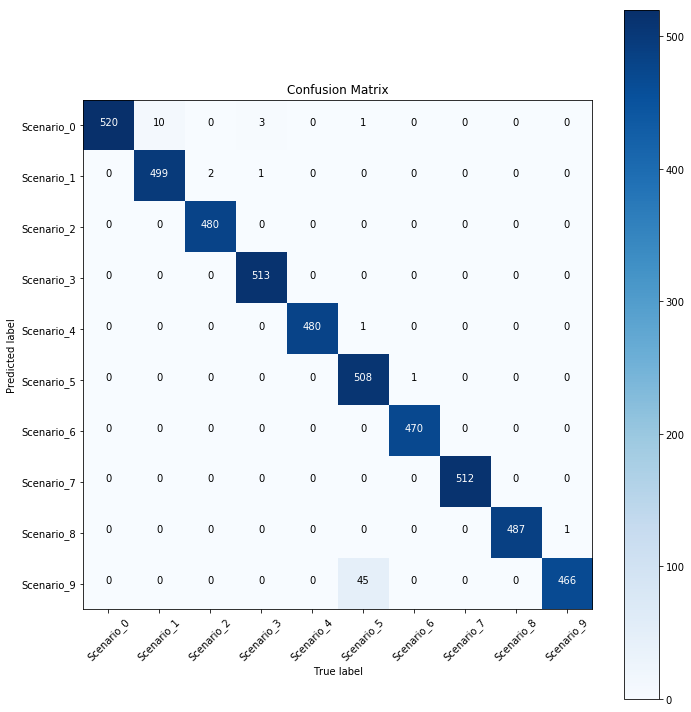

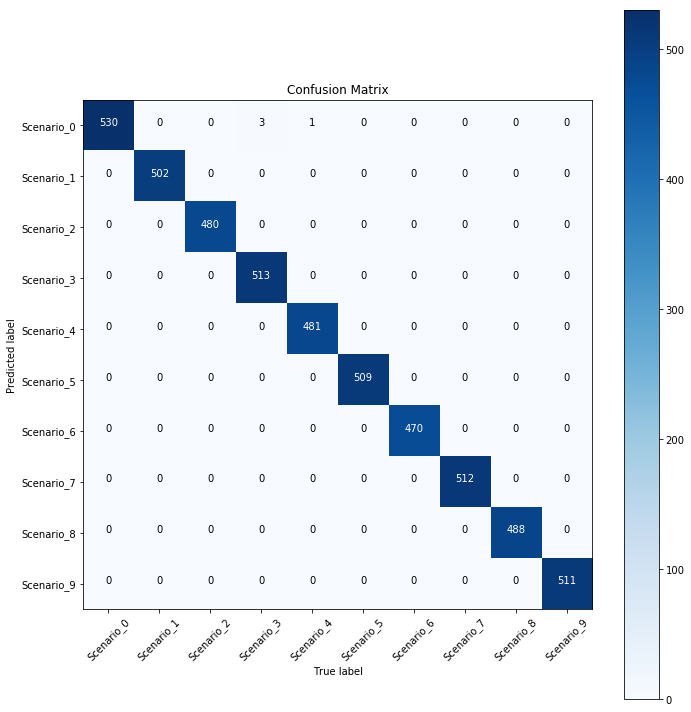

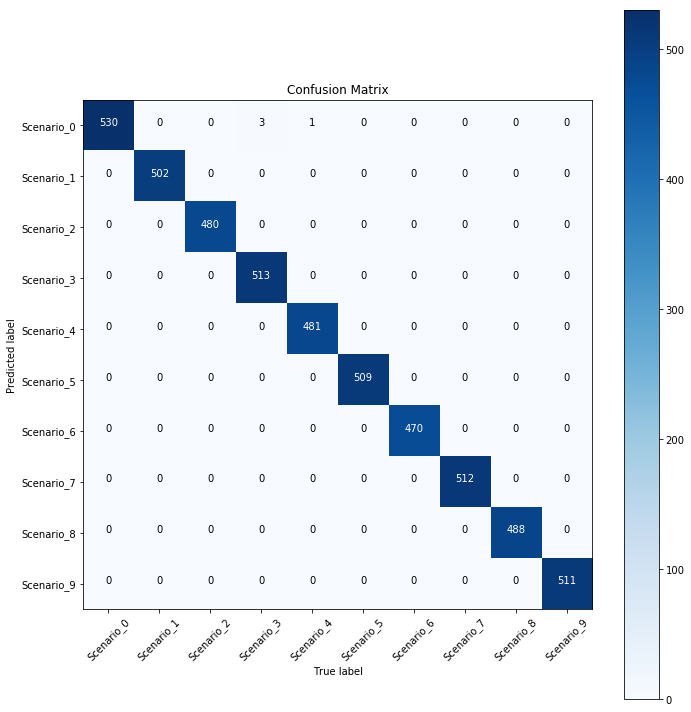

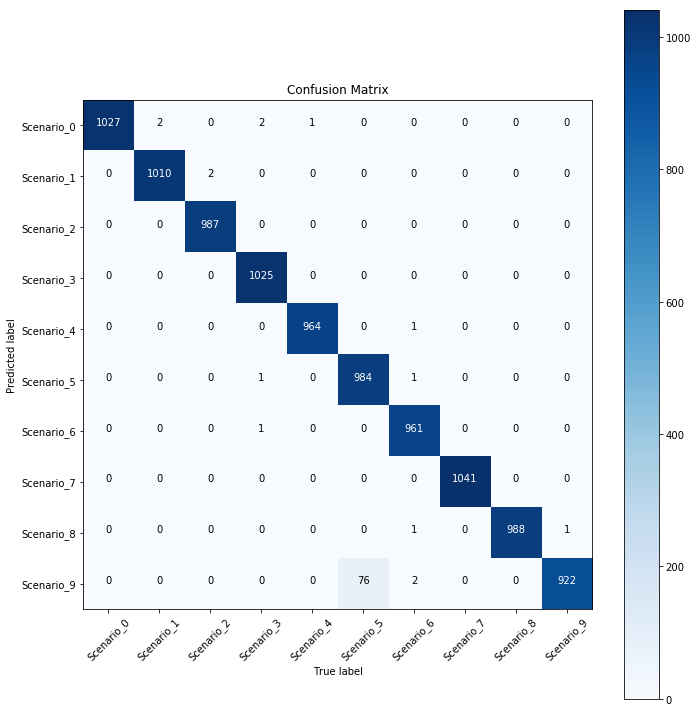

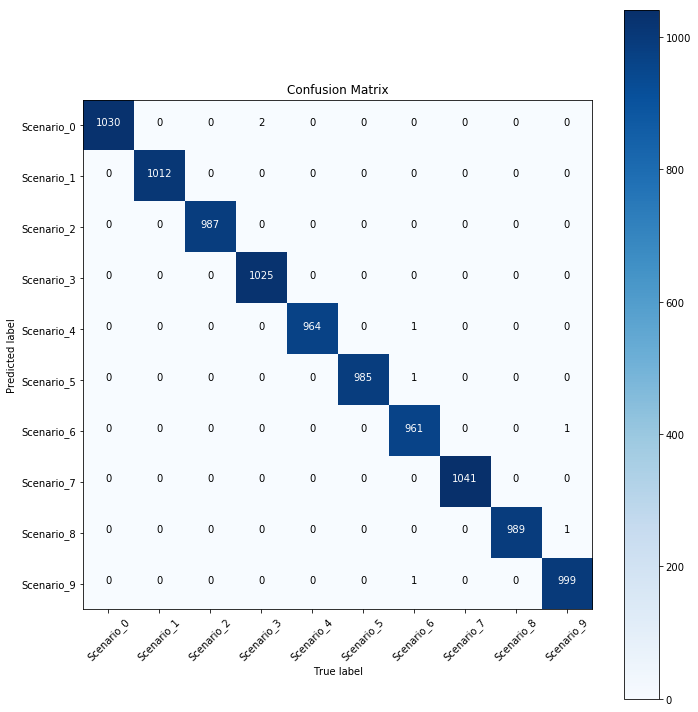

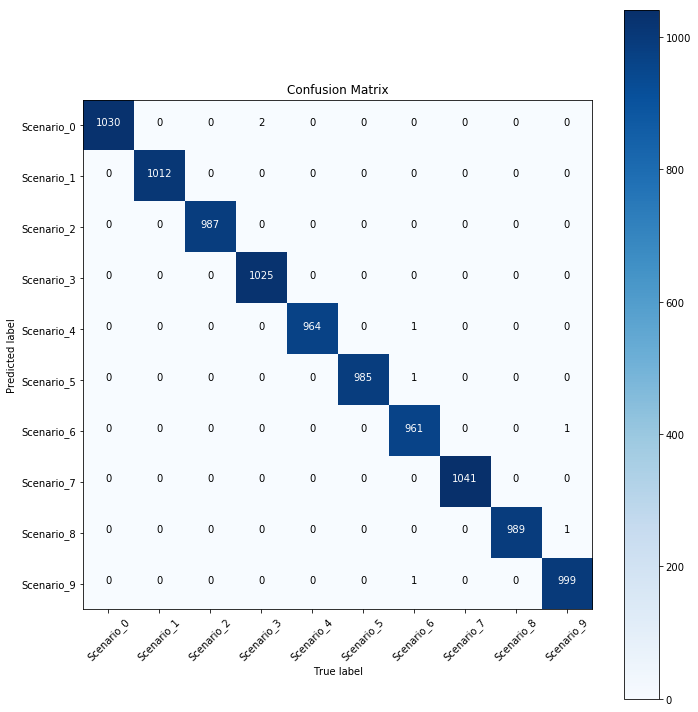

In [37]:
setup_dataset.compute_cm(y_test, svc_pred_scaled, svc_c)

In [38]:
for line in svc_accs :
    print(line)
print("====================") 
for line in svc_accs_scaled:
    print(line)

[0.9728, 0.97719999999999996, 0.97719999999999996]
[0.98049804980498045, 0.98259825982598259, 0.98259825982598259]
[0.98660000000000003, 0.98819999999999997, 0.98819999999999997]
[0.99139999999999995, 0.99209999999999998, 0.99209999999999998]
[0.98280000000000001, 0.998, 0.99839999999999995]
[0.98379837983798379, 0.99819981998199825, 0.99849984998499852]
[0.98699999999999999, 0.99919999999999998, 0.99919999999999998]
[0.9909, 0.99929999999999997, 0.99929999999999997]


In [ ]:
# THIS MAKES THE KERNEL CRASH!
rfc_accs, rfc_pred, rfc_pred_times, rfc_fit_times = \
setup_dataset.run_random_forest(X_train, X_test, y_train, y_test, rfc_c, rfc_jobs)

In [ ]:
rfc_accs_scaled, rfc_pred_scaled, rfc_pred_times_scaled, rfc_fit_times_scaled = \
setup_dataset.run_random_forest(X_train_scaled, X_test_scaled, y_train, y_test, rfc_c, rfc_jobs)

In [ ]:
setup_dataset.compute_cm(y_test, rfc_pred, rfc_c)

In [ ]:
setup_dataset.compute_cm(y_test, rfc_pred_scaled, rfc_c)

In [9]:
gpc_accs, gpc_pred, gpc_pred_times, gpc_fit_times = \
setup_dataset.run_gaussian(X_train, X_test, y_train, y_test, gpc_c, gpc_jobs)

KeyboardInterrupt: 

In [ ]:
gpc_accs_scaled, gpc_pred_scaled, gpc_pred_times_scaled, gpc_fit_times_scaled = \
setup_dataset.run_gaussian(X_train_scaled, X_test_scaled, y_train, y_test, gpc_c, rfc_jobs)

In [ ]:
setup_dataset.compute_cm(y_test, gpc_pred, gpc_c)

In [ ]:
setup_dataset.compute_cm(y_test, gpc_pred_scaled, gpc_c)